In [456]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [457]:
train_data = pd.read_csv('train.csv')
train_data

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,...,18.947452,61.376610,0,0,1,1,0,0,0,0
14834,14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,...,0.000000,10.000000,0,0,0,1,0,1,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,...,9.088795,45.583333,0,0,0,1,1,0,0,0


In [458]:
counts = train_data.melt(value_vars=train_data.columns[-6:])
counts

,variable,value
0,EC1,1
1,EC1,0
2,EC1,1
3,EC1,1
4,EC1,1
...,...,...
89023,EC6,0
89024,EC6,0
89025,EC6,0
89026,EC6,0


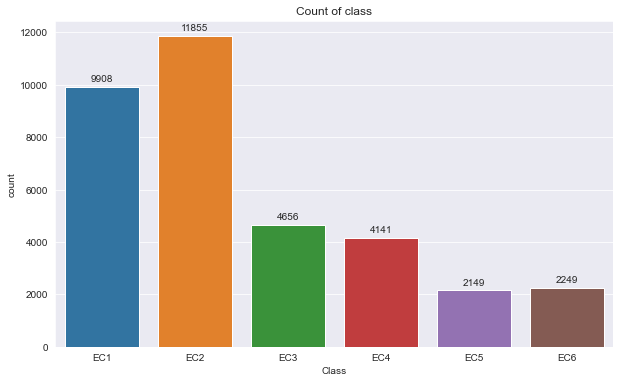

In [459]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(data=counts.loc[counts['value']!=0], x='variable')
ax.set(xlabel='Class', title='Count of class')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), 'd'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')

# Data Cleaning

In [460]:
train_data.isna().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

In [461]:
# check for duplicated values  without id
train_data.drop('id', axis=1).loc[train_data.drop('id', axis=1).duplicated()]

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6


In [462]:
train_data.dtypes

id                     int64
BertzCT              float64
Chi1                 float64
Chi1n                float64
Chi1v                float64
Chi2n                float64
Chi2v                float64
Chi3v                float64
Chi4n                float64
EState_VSA1          float64
EState_VSA2          float64
ExactMolWt           float64
FpDensityMorgan1     float64
FpDensityMorgan2     float64
FpDensityMorgan3     float64
HallKierAlpha        float64
HeavyAtomMolWt       float64
Kappa3               float64
MaxAbsEStateIndex    float64
MinEStateIndex       float64
NumHeteroatoms         int64
PEOE_VSA10           float64
PEOE_VSA14           float64
PEOE_VSA6            float64
PEOE_VSA7            float64
PEOE_VSA8            float64
SMR_VSA10            float64
SMR_VSA5             float64
SlogP_VSA3           float64
VSA_EState9          float64
fr_COO                 int64
fr_COO2                int64
EC1                    int64
EC2                    int64
EC3           

Looks like the features only consist of numerical features.

# Data Understanding

In [463]:
train_data.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
BertzCT,14838.0,515.153604,542.456370,0.000000,149.103601,290.987941,652.652585,4069.959780
Chi1,14838.0,9.135189,6.819989,0.000000,4.680739,6.485270,11.170477,69.551167
Chi1n,14838.0,5.854307,4.647064,0.000000,2.844556,4.052701,7.486791,50.174588
Chi1v,14838.0,6.738497,5.866444,0.000000,2.932842,4.392859,8.527859,53.431954
Chi2n,14838.0,4.432570,3.760516,0.000000,1.949719,2.970427,5.788793,32.195368
Chi2v,14838.0,5.253221,4.925065,0.000000,2.034468,3.242775,6.609350,34.579313
Chi3v,14838.0,3.418749,3.436208,0.000000,1.160763,1.948613,4.502070,22.880836
Chi4n,14838.0,1.773472,1.865898,0.000000,0.503897,1.073261,2.534281,16.072810
EState_VSA1,14838.0,29.202823,31.728679,0.000000,5.969305,17.353601,44.876559,363.705954
EState_VSA2,14838.0,10.435316,13.651843,0.000000,0.000000,6.420822,12.841643,99.936429


In [464]:
train_data.drop('id', axis=1).describe()[['EC1', 'EC2']].T['mean']

EC1    0.667745
EC2    0.798962
Name: mean, dtype: float64

67% of data is classified as EC1 while 80% of data is classified as EC2.

<AxesSubplot:>

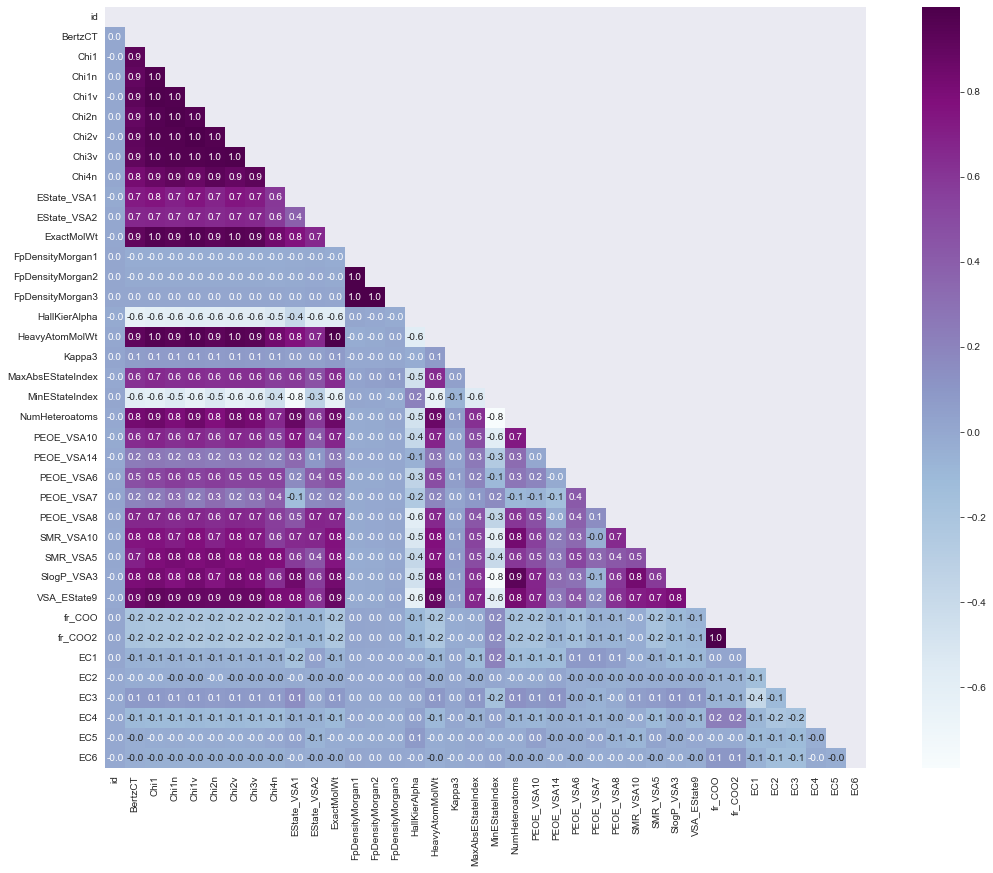

In [465]:
plt.figure(figsize=(20,14))
matrix = train_data.corr()
mask = np.triu(matrix)
sns.heatmap(matrix, cmap='BuPu', mask=mask, square=True, annot=True, fmt='.1f')

There are only one or two variables that correlate with EC1 1 and those are also weak correlations. Meanwhile with EC2, it does not have any correlation with any variables.

# Identifying and removing outliers

In [466]:
def identify_outliers_zscore(dataframe, threshold=3):
    # Compute the z-scores for each column
    z_scores = np.abs((dataframe - dataframe.mean()) / dataframe.std())
    
    # Identify outliers based on the threshold
    outliers = (z_scores > threshold).any(axis=1)
    
    return outliers

In [467]:
outliers = identify_outliers_zscore(train_data)

outliers.sum()

2331

In [468]:
train_data[outliers].describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,...,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,7574.867868,1145.146890,17.500511,11.845585,14.055023,9.316464,11.418295,7.779913,4.194270,52.109650,...,26.364508,80.631501,0.311454,0.312312,0.670957,0.780781,0.345774,0.211497,0.121836,0.118404
std,4328.493865,755.940792,9.456922,6.449813,8.206592,5.146011,6.808545,4.587534,2.616224,46.280385,...,22.031831,42.857247,0.787751,0.787956,0.469967,0.413806,0.475722,0.408458,0.327167,0.323155
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3842.500000,569.405621,10.701907,7.561328,8.166523,5.579871,6.179601,4.211207,2.466346,0.000000,...,4.794537,49.527251,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7712.000000,1038.977885,16.188780,11.812020,12.980835,9.391115,11.008637,8.159163,4.286873,54.993754,...,22.701338,79.916667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11388.000000,1827.878106,25.369507,16.051044,21.144665,12.543074,17.591681,11.414423,5.698768,86.771356,...,50.697492,112.878292,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,14834.000000,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,...,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [469]:
sliced_df = train_data[~outliers]
sliced_df

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14832,14832,83.690584,3.560660,1.689533,1.689533,0.924069,0.924069,0.408248,0.000000,0.000000,...,4.794537,16.833333,0,0,1,1,0,0,0,0
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,...,18.947452,61.376610,0,0,1,1,0,0,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,...,9.088795,45.583333,0,0,0,1,1,0,0,0


In [470]:
sliced_df.drop('id',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
BertzCT,12507.0,397.738208,393.541823,0.000000,144.973737,268.039723,527.123303,2105.774488
Chi1,12507.0,7.576097,4.800521,0.000000,4.464102,5.947265,9.593172,29.555098
Chi1n,12507.0,4.737679,3.151553,0.000000,2.786883,3.675670,5.953693,19.601189
Chi1v,12507.0,5.374875,4.055215,0.000000,2.841578,3.876105,6.706705,24.182670
Chi2n,12507.0,3.522331,2.563022,0.000000,1.875634,2.719449,4.572206,15.671142
Chi2v,12507.0,4.104202,3.425789,0.000000,1.949719,2.834676,5.330448,19.746226
Chi3v,12507.0,2.605935,2.425186,0.000000,1.073604,1.749075,3.319399,12.991234
Chi4n,12507.0,1.322295,1.248762,0.000000,0.438129,0.921246,1.923139,7.361430
EState_VSA1,12507.0,24.933549,26.062710,0.000000,5.969305,15.645394,37.250649,123.355843
EState_VSA2,12507.0,8.115131,9.989613,0.000000,0.000000,5.917906,12.238684,51.366573


In [471]:
high_value_cols = ['BertzCT', 'ExactMolWt', 'HeavyAtomMolWt']

In [472]:
plot_df = sliced_df.iloc[:, 1:-6]
cols = plot_df.columns.to_list()
plot_df

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14832,83.690584,3.560660,1.689533,1.689533,0.924069,0.924069,0.408248,0.000000,0.000000,18.628754,...,0.000000,0.000000,13.344559,5.535202,5.783245,19.951441,4.794537,16.833333,0,0
14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,6.606882,...,15.645394,0.000000,13.847474,6.923737,34.407699,32.607024,18.947452,61.376610,0,0
14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,0.000000,...,0.000000,0.000000,0.000000,23.762553,10.969244,0.000000,0.000000,66.666667,0,0
14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,0.000000,...,7.822697,19.420579,0.000000,0.000000,7.822697,108.961047,9.088795,45.583333,0,0


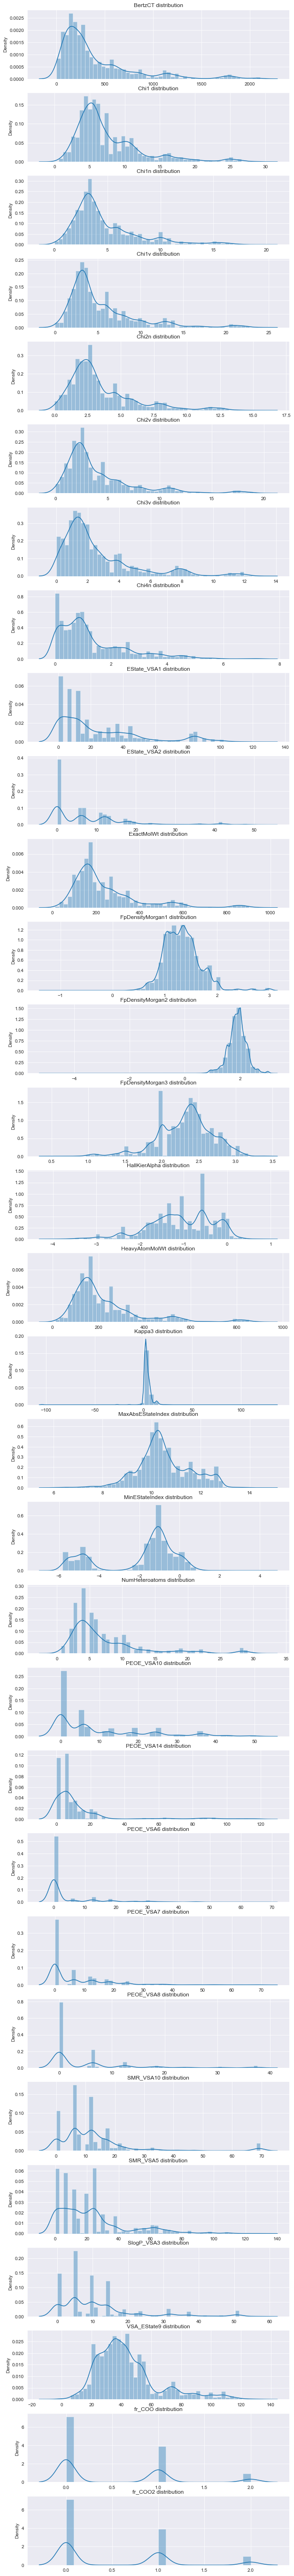

In [473]:
fig, ax = plt.subplots(31,1, figsize=(10,100))
for i, axes in enumerate(fig.axes):
    ax = sns.distplot(x=plot_df[cols[i]], ax=axes)
    ax.set(title=cols[i]+" distribution")

In [474]:
col_transform = cols[:-3]
col_transform.remove('FpDensityMorgan1')
col_transform.remove('FpDensityMorgan2')
col_transform.remove('HallKierAlpha')
col_transform.remove('Kappa3')
col_transform.remove('MinEStateIndex')
not_transform_cols = ['FpDensityMorgan1','FpDensityMorgan2','HallKierAlpha','Kappa3','MinEStateIndex']

log_df = np.log(plot_df[col_transform])
log_df = log_df.replace([np.inf, -np.inf], 0)
log_df

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,MaxAbsEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3
0,5.778861,2.290504,1.770804,1.770804,1.459721,1.459721,1.013241,0.559160,0.000000,2.479751,...,2.478428,1.386294,0.000000,4.516738,0.000000,0.000000,0.000000,2.876051,0.000000,1.567477
1,5.612120,1.982247,1.490985,1.763867,1.189381,1.500791,0.789082,0.254467,3.809668,0.000000,...,2.391725,2.302585,3.195233,2.057029,0.000000,0.000000,0.000000,2.057029,3.424455,2.626526
2,6.256985,2.389799,2.143338,2.402509,1.896914,2.253364,1.762128,0.571306,2.750177,1.888112,...,2.419305,2.197225,0.000000,2.750177,0.000000,3.977403,0.000000,2.750177,4.292425,2.888396
3,6.341119,2.521989,1.958561,2.552075,1.868415,2.395907,2.068702,1.120759,4.560586,0.000000,...,2.413336,2.944439,3.754849,3.060355,0.000000,0.000000,1.859546,2.750177,4.128864,3.464546
4,4.725357,1.484944,1.053000,1.053000,0.628947,0.628947,0.035801,-0.317915,2.889285,2.552693,...,2.288054,1.386294,1.798709,2.479778,1.934956,2.964572,0.000000,2.479778,2.938288,2.260624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14832,4.427126,1.269946,0.524452,0.524452,-0.078969,-0.078969,-0.895880,0.000000,0.000000,2.924706,...,2.259301,1.098612,0.000000,0.000000,0.000000,2.591109,1.711128,1.754965,2.993301,1.567477
14833,6.449217,2.389799,1.884025,2.217023,1.537637,1.796756,1.300335,0.571306,3.495644,1.888112,...,2.435929,2.772589,2.847727,2.750177,0.000000,2.628103,1.934956,3.538280,3.484528,2.941669
14835,6.888906,2.338250,1.815837,1.815837,1.547685,1.547685,1.119997,0.757950,2.847727,0.000000,...,2.494767,2.079442,3.540407,0.000000,0.000000,0.000000,3.168111,2.395095,0.000000,0.000000
14836,5.701016,2.297488,1.885517,2.060375,1.663276,1.700454,1.381024,0.832837,3.820429,0.000000,...,2.389615,1.945910,0.000000,2.057029,2.966333,0.000000,0.000000,2.057029,4.690990,2.207042


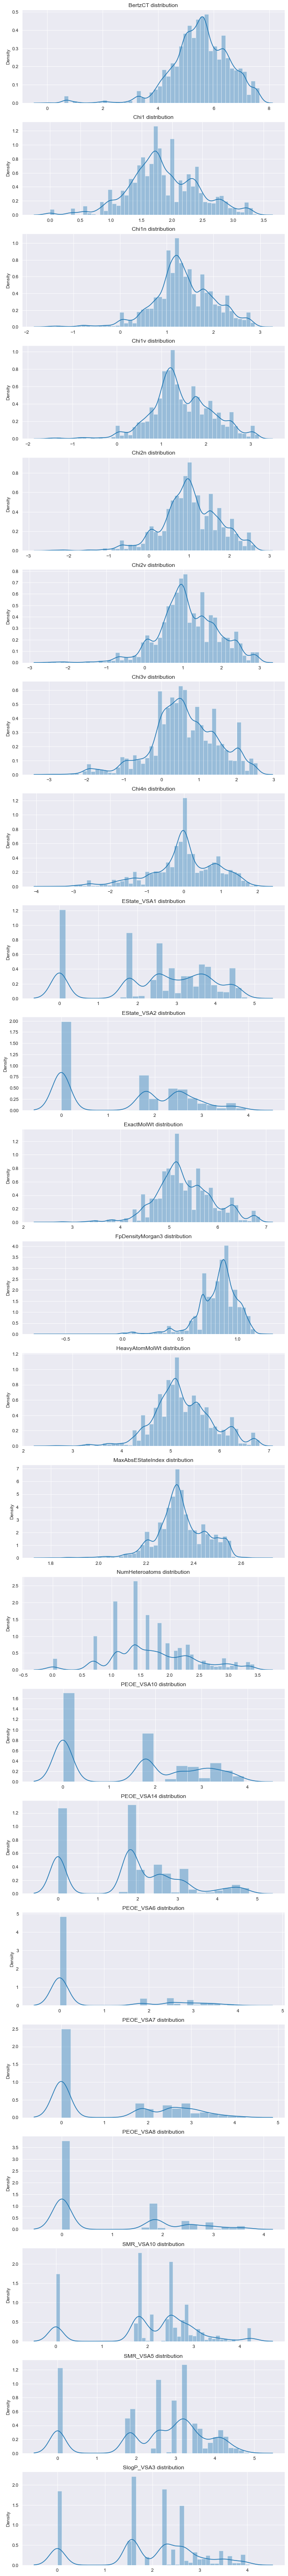

In [475]:
fig, ax = plt.subplots(23,1, figsize=(10,100))
for i, axes in enumerate(fig.axes):
    ax = sns.distplot(x=log_df[col_transform[i]], ax=axes)
    ax.set(title=col_transform[i]+" distribution")

In [476]:
# merging df again
cols_concat = sliced_df.columns[29:].to_list()+not_transform_cols
transformed_df = pd.concat([log_df, sliced_df[cols_concat]], axis=1)
transformed_df = pd.concat([sliced_df.iloc[:,:1], transformed_df], axis=1)
# reorder columns
transformed_df = transformed_df[sliced_df.columns]
transformed_df

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,5.778861,2.290504,1.770804,1.770804,1.459721,1.459721,1.013241,0.559160,0.000000,...,1.567477,35.527357,0,0,1,1,0,0,0,0
1,1,5.612120,1.982247,1.490985,1.763867,1.189381,1.500791,0.789082,0.254467,3.809668,...,2.626526,44.707310,0,0,0,1,1,0,0,0
2,2,6.256985,2.389799,2.143338,2.402509,1.896914,2.253364,1.762128,0.571306,2.750177,...,2.888396,45.660120,0,0,1,1,0,0,1,0
3,3,6.341119,2.521989,1.958561,2.552075,1.868415,2.395907,2.068702,1.120759,4.560586,...,3.464546,87.509997,0,0,1,1,0,0,0,0
4,4,4.725357,1.484944,1.053000,1.053000,0.628947,0.628947,0.035801,-0.317915,2.889285,...,2.260624,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14832,14832,4.427126,1.269946,0.524452,0.524452,-0.078969,-0.078969,-0.895880,0.000000,0.000000,...,1.567477,16.833333,0,0,1,1,0,0,0,0
14833,14833,6.449217,2.389799,1.884025,2.217023,1.537637,1.796756,1.300335,0.571306,3.495644,...,2.941669,61.376610,0,0,1,1,0,0,0,0
14835,14835,6.888906,2.338250,1.815837,1.815837,1.547685,1.547685,1.119997,0.757950,2.847727,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,5.701016,2.297488,1.885517,2.060375,1.663276,1.700454,1.381024,0.832837,3.820429,...,2.207042,45.583333,0,0,0,1,1,0,0,0


In [477]:
transformed_df.describe().T[1:32]

,count,mean,std,min,25%,50%,75%,max
BertzCT,12507.0,5.532926,1.049638,0.000000,4.976553,5.591135,6.267434,7.652439
Chi1,12507.0,1.856686,0.576585,0.000000,1.496068,1.782931,2.261052,3.386256
Chi1n,12507.0,1.357968,0.645744,-1.547685,1.024924,1.301736,1.784012,2.975590
Chi1v,12507.0,1.445606,0.694545,-1.547685,1.044360,1.354831,1.903107,3.185636
Chi2n,12507.0,1.019654,0.727225,-2.532697,0.628947,1.000429,1.519996,2.751821
Chi2v,12507.0,1.121853,0.783666,-2.532697,0.667685,1.041928,1.673435,2.982962
Chi3v,12507.0,0.599128,0.898624,-2.995732,0.071021,0.559087,1.199784,2.564275
Chi4n,12507.0,-0.001845,0.899744,-3.656608,-0.402790,0.000000,0.653959,1.996254
EState_VSA1,12507.0,2.492508,1.432139,0.000000,1.786631,2.750177,3.617669,4.815073
EState_VSA2,12507.0,1.433759,1.281449,0.000000,0.000000,1.777983,2.504602,3.938988


In [478]:
wo_class = train_data.iloc[:,:-6].drop('id',axis=1)
wo_class

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,6.606882,...,15.645394,0.000000,13.847474,6.923737,34.407699,32.607024,18.947452,61.376610,0,0
14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.066367,0.000000,6.420822,0.000000,10.000000,0,0
14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,0.000000,...,0.000000,0.000000,0.000000,23.762553,10.969244,0.000000,0.000000,66.666667,0,0
14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,0.000000,...,7.822697,19.420579,0.000000,0.000000,7.822697,108.961047,9.088795,45.583333,0,0


In [479]:
wo_class['num_zero'] = (wo_class == 0).astype(int).sum(axis=1)
wo_class['num_minus'] = (wo_class < 0).astype(int).sum(axis=1)
wo_class

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,num_zero,num_minus
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,8,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,6,2
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,5,2
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,5,2
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,6.606882,...,13.847474,6.923737,34.407699,32.607024,18.947452,61.376610,0,0,3,2
14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,0.000000,...,0.000000,6.066367,0.000000,6.420822,0.000000,10.000000,0,0,12,1
14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,0.000000,...,0.000000,23.762553,10.969244,0.000000,0.000000,66.666667,0,0,8,2
14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,0.000000,...,0.000000,0.000000,7.822697,108.961047,9.088795,45.583333,0,0,6,2


In [480]:
train_data['num_zero']=wo_class['num_zero']
# train_data['num_minus']=wo_class['num_minus']
train_data.drop('id',axis=1).corr()[['EC1','EC2']].sort_values(['EC2'], ascending=False)

,EC1,EC2
EC2,-0.146059,1.000000
num_zero,0.037425,0.092278
HallKierAlpha,-0.020765,0.039798
PEOE_VSA14,-0.123488,0.017258
Kappa3,0.002552,0.002803
MinEStateIndex,0.208827,0.000630
FpDensityMorgan1,0.000125,-0.003914
FpDensityMorgan2,-0.002198,-0.004619
FpDensityMorgan3,-0.005985,-0.004831
PEOE_VSA10,-0.115469,-0.010913


# Splitting features and target variable

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [481]:
X = train_data.drop(['id','EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data[['EC1', 'EC2']].values

# X = sliced_df.drop(['id','EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
# y = sliced_df[['EC1', 'EC2']].values

In [482]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, random_state=2)

## Scaling Data

In [407]:
scaler = StandardScaler()
# cols_not = [i for i in X_train.columns if i not in high_value_cols]

# train_sc=pd.DataFrame(scaler.fit_transform(X_train[high_value_cols]),index=X_train.index,columns=high_value_cols)
# val_sc=pd.DataFrame(scaler.fit_transform(X_val[high_value_cols]),index=X_val.index,columns=high_value_cols)

# scaler = MinMaxScaler()

# X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
# X_val=pd.DataFrame(scaler.fit_transform(X_val),index=X_val.index,columns=X_val.columns)

# X_train = pd.concat([train_sc, X_train[cols_not]], axis=1)
# X_val = pd.concat([val_sc, X_val[cols_not]], axis=1)

# X_train['VSA_EState9'] = scaler.fit_transform(X_train[['VSA_EState9']])
# X_val['VSA_EState9'] = scaler.fit_transform(X_val[['VSA_EState9']])

X_train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,254.583169,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,0.000000,5.749512,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,170.977545,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,18.359432,11.949021,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,236.164996,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,6.103966,12.356394,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,170.034424,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,24.401273,6.420822,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,83.108030,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,18.359432,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1


In [408]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix, auc, roc_curve

## Building Models with Optuna

In [409]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score

In [410]:
def plot_cm(y_hat):
    matrix = multilabel_confusion_matrix(y_val, y_hat)
    num_labels = matrix.shape[0]

    fig, axes = plt.subplots(num_labels, figsize=(8, 4 * num_labels))

    for i in range(num_labels):
        ax = axes[i] if num_labels > 1 else axes
        ax.imshow(matrix[i], cmap='BuPu')

        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])

        ax.set_xticklabels(['Predicted False', 'Predicted True'])
        ax.set_yticklabels(['Actual False', 'Actual True'])

        ax.set_xlabel('Predicted values')
        ax.set_ylabel('Actual values')

        for j in range(2):
            for k in range(2):
                ax.text(k, j, matrix[i][j, k],
                        ha='center', va='center', color='black')

        ax.set_title(f'EC{i + 1} Confusion Matrix')

    plt.tight_layout()
    plt.show()

In [411]:
def evaluate_model(clf):
    y_hat = clf.predict(X_val)
    train_hat = clf.predict(X_train)
    pos_probs = clf.predict_proba(X_val)
    fpr = dict()
    tpr = dict()
    roc_scores = []
    for i in range(y_val.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_val[:, i], pos_probs[i][:, 1])
        roc_scores = auc(fpr[i], tpr[i])
    avg_roc_auc = np.mean(roc_scores)
    avg_prec = []
    for i in range(y_val.shape[1]):
        avg_prec.append(average_precision_score(y_val[:, i], pos_probs[i][:, 1]))
    avg_precision = np.mean(avg_prec)
    train_acc = accuracy_score(y_train, train_hat)
    acc = accuracy_score(y_val, y_hat)
    print(f'Train Accuracy score is: {train_acc}')
    print(f'Test Accuracy score is: {acc}')
    print(f'Avg Precision score is: {avg_precision}')
    print(f'Avg ROC_AUC score is: {avg_roc_auc}')
    plot_cm(y_hat)

## Random Forest

In [412]:
def objective(trial):
    class_weight_1_0 = trial.suggest_float("class_weight_1_0", 1, 2)
    class_weight_2_0 = trial.suggest_float("class_weight_2_0", 1, 3)
    parameters = {
        'n_estimators':trial.suggest_int('n_estimators', 100, 800, step=100),
        'max_depth':trial.suggest_int('max_depth', 2, 10),
        'min_samples_split':trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features':trial.suggest_int('max_features', 1, 30, step=2),
        'bootstrap':trial.suggest_categorical('bootstrap', [True, False]),
    }
    class_weights = [{0: class_weight_1_0, 1:1}, {0:class_weight_2_0, 1:1}]

    model = RandomForestClassifier(**parameters, class_weight=class_weights, random_state=2)

    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
#     score = accuracy_score(y_val, y_hat)

    pos_probs = model.predict_proba(X_val)
    fpr = dict()
    tpr = dict()
    roc_scores = []
    for i in range(y_val.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_val[:, i], pos_probs[i][:, 1])
        roc_scores = auc(fpr[i], tpr[i])
    avg_roc_auc = np.mean(roc_scores)
#     avg_prec = []
#     for i in range(y_val.shape[1]):
#         avg_prec.append(average_precision_score(y_val[:, i], pos_probs[i][:, 1]))
#     avg_precision = np.mean(avg_prec)

    return avg_roc_auc

In [413]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=10)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-06 17:08:24,564] A new study created in memory with name: no-name-320e9f4e-f346-4f9d-bfda-470e7637f753
[I 2023-07-06 17:08:44,081] Trial 0 finished with value: 0.5647183835507081 and parameters: {'class_weight_1_0': 1.6541364932835383, 'class_weight_2_0': 1.4872716202746743, 'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 15, 'bootstrap': False}. Best is trial 0 with value: 0.5647183835507081.
[I 2023-07-06 17:09:27,567] Trial 1 finished with value: 0.5847758467551989 and parameters: {'class_weight_1_0': 1.5093466719869522, 'class_weight_2_0': 1.6792474087990013, 'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 25, 'bootstrap': True}. Best is trial 1 with value: 0.5847758467551989.
[I 2023-07-06 17:09:34,355] Trial 2 finished with value: 0.5811345926333467 and parameters: {'class_weight_1_0': 1.9954927064578287, 'class_weight_2_0': 1.1759323685632006, 'n_estimators': 100, 

In [414]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'class_weight_1_0': 1.1945668409562513, 'class_weight_2_0': 2.110801324236369, 'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 25, 'bootstrap': True}
The best score is:  0.5884440704661424


Past params:
- the best parameters are:  {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 2, 'bootstrap': True}|The best score is:  0.5690700808625337
- the best parameters are:  {'class_weight_1_0': 1.3309041289538777, 'class_weight_2_0': 1.7214434542142536, 'n_estimators': 400, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 5, 'bootstrap': True}|The best score is:  0.569743935309973

In [415]:
class_weights = [{0: best_params['class_weight_1_0'], 1:1},{0: best_params['class_weight_2_0'], 1:1}]
del best_params['class_weight_1_0']
del best_params['class_weight_2_0']

Train Accuracy score is: 0.6518955349620893
Test Accuracy score is: 0.5660377358490566
Avg Precision score is: 0.8312610242588293
Avg ROC_AUC score is: 0.5884440704661424


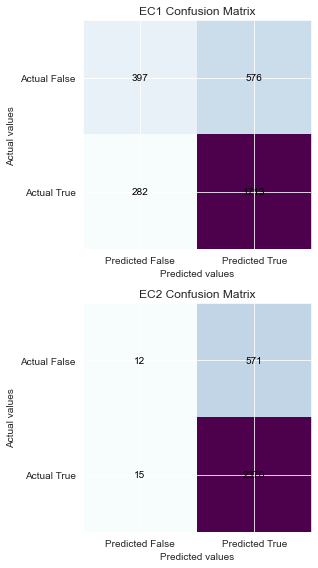

In [416]:
rfc = RandomForestClassifier(**best_params, class_weight=class_weights, random_state=2)
rfc.fit(X_train, y_train)

evaluate_model(rfc)

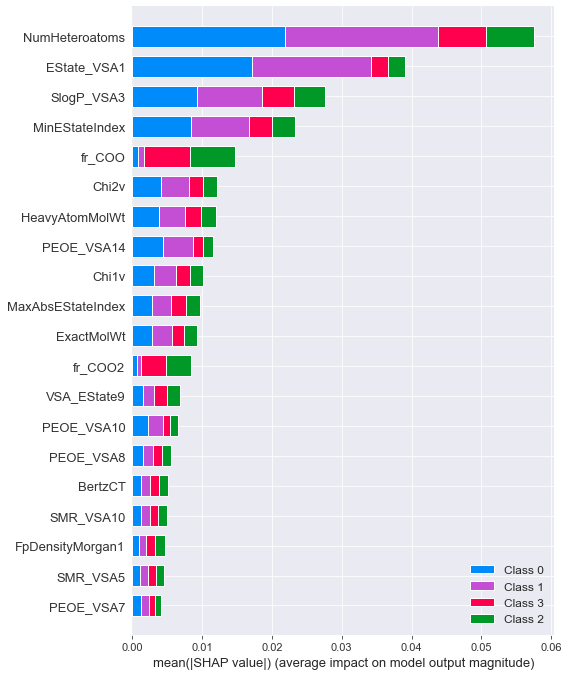

In [400]:
import shap
explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

# Experimenting

In [290]:
from sklearn.metrics import roc_auc_score, hamming_loss, f1_score

In [483]:
def plot_cm(y_hat):
    matrix = confusion_matrix(y_val, y_hat)
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='crest')
    ax.set(ylabel='Predicted values', xlabel='Actual values')
    plt.show()

In [484]:
def plot_roc_curve(positive_probs):
    fpr, tpr, _ = roc_curve(y_val.astype('float'), positive_probs)
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Algorithm')
    plt.plot(fpr, tpr, marker='.', label='With Algorithm')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [485]:
def evaluate_model(clf):
    y_hat = clf.predict(X_val)
    train_hat = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_hat)
    acc = accuracy_score(y_val, y_hat)
    pos_probs = clf.predict_proba(X_val)[:,1]
    roc = roc_auc_score(y_val, pos_probs)
    print(f'Train Accuracy score is: {train_acc}')
    print(f'Test Accuracy score is: {acc}')
    print(f'ROC_AUC score is: {roc}')
    print(classification_report(y_val, y_hat))
    plot_cm(y_hat)
    plot_roc_curve(pos_probs)

In [486]:
def split_data(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=2)
    scaler = StandardScaler()

    # scaler = MinMaxScaler()

#     train_scale=pd.DataFrame(scaler.fit_transform(X_train[X_train.columns[:-2]]),index=X_train.index,columns=X_train.columns[:-2])
#     val_scale=pd.DataFrame(scaler.fit_transform(X_val[X_val.columns[:-2]]),index=X_val.index,columns=X_val.columns[:-2])
    
#     X_train[['VSA_EState9', 'Kappa3']] = scaler.fit_transform(X_train[['VSA_EState9', 'Kappa3']])
#     X_val[['VSA_EState9', 'Kappa3']] = scaler.fit_transform(X_val[['VSA_EState9', 'Kappa3']])

#     X_train = pd.concat([train_scale, X_train[X_train.columns[-2:]]], axis=1)
#     X_val = pd.concat([val_scale, X_val[X_val.columns[-2:]]], axis=1)
    
    return X_train, X_val, y_train, y_val

## Trying to predict EC1 class and EC2 class separately as a binary problem

In [36]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

# EC1

In [487]:
X = train_data.drop(['id','EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data['EC1']

X_train, X_val, y_train, y_val = split_data(X,y)

X_train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,num_zero
6788,254.583169,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,0.000000,5.749512,...,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0,9
1962,170.977545,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,18.359432,11.949021,...,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1,3
3551,236.164996,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,6.103966,12.356394,...,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0,7
8301,170.034424,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,24.401273,6.420822,...,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1,3
281,83.108030,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,18.359432,0.000000,...,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1,5


## Random Forest

In [503]:
def objective(trial):
    class_weight_0 = trial.suggest_float("class_weight_0", 1, 1.1)
    parameters = {
        'n_estimators':trial.suggest_int('n_estimators', 100, 600, step=100),
        'max_depth':trial.suggest_int('max_depth', 3, 8),
        'min_samples_split':trial.suggest_int('min_samples_split', 2, 8),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features':trial.suggest_int('max_features', 2, 3, step=2),
        'bootstrap':trial.suggest_categorical('bootstrap', [True, False]),
#         'class_weight':trial.suggest_categorical('class_weight', [{0:1,1:1}, {0:2,1:1}]),
    }
    class_weights = {0:class_weight_0,1:1}
    
    model = RandomForestClassifier(**parameters, class_weight=class_weights, random_state=2)

    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    pos_probs = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, pos_probs)
#     score = accuracy_score(y_val, y_hat)
#     score = f1_score(y_val, y_hat, average='macro')
#     report_dict = classification_report(y_val, y_hat, output_dict=True)
#     score = hamming_loss(y_val, y_hat)
#     score = report_dict['0']['f1-score']

    return score

In [504]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=15)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-06 20:49:16,902] A new study created in memory with name: no-name-04f9e5c1-7d7f-465d-84b7-6f5f2e9dc622
[I 2023-07-06 20:49:19,576] Trial 0 finished with value: 0.7102566282097844 and parameters: {'class_weight_0': 1.0435137902400955, 'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 2, 'bootstrap': True}. Best is trial 0 with value: 0.7102566282097844.
[I 2023-07-06 20:49:23,146] Trial 1 finished with value: 0.7103421451882533 and parameters: {'class_weight_0': 1.0310500377732776, 'n_estimators': 400, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 2, 'bootstrap': True}. Best is trial 1 with value: 0.7103421451882533.
[I 2023-07-06 20:49:25,238] Trial 2 finished with value: 0.7128453198772883 and parameters: {'class_weight_0': 1.0943760897270889, 'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 2, 'bootstrap': True}. Best is trial 2 with value: 

In [500]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'class_weight_0': 1.0378866430228126, 'n_estimators': 600, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 2, 'bootstrap': False}
The best score is:  0.7169099521671598


Past params:
- the best parameters are:  {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 8, 'bootstrap': True, 'class_weight': {0: 2, 1: 1}}|The best score is:  0.709069436180379
- the best parameters are:  {'class_weight_1_0': 1.025982733308613, 'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 4, 'bootstrap': False}|The best score is:  0.7169096945858995
- the best parameters are:  {'class_weight_1_0': 1.0515463610496252, 'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 6, 'bootstrap': True}|The best score is:  0.2729816147082334

In [505]:
best_params['class_weight']={0:best_params['class_weight_0'], 1:1}
del best_params['class_weight_0']

Train Accuracy score is: 0.7511373209772536
Test Accuracy score is: 0.7139487870619946
ROC_AUC score is: 0.7163968502963473
              precision    recall  f1-score   support

           0       0.60      0.38      0.46       973
           1       0.74      0.88      0.80      1995

    accuracy                           0.71      2968
   macro avg       0.67      0.63      0.63      2968
weighted avg       0.70      0.71      0.69      2968



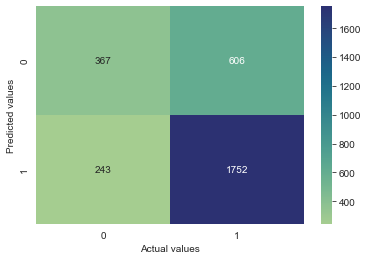

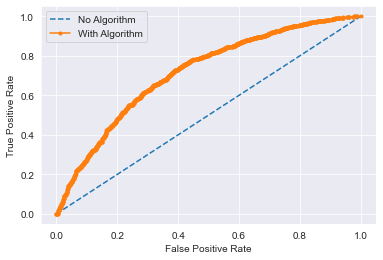

In [506]:
rfc_ec1 = RandomForestClassifier(**best_params, random_state=2)
rfc_ec1.fit(X_train, y_train)

evaluate_model(rfc_ec1)

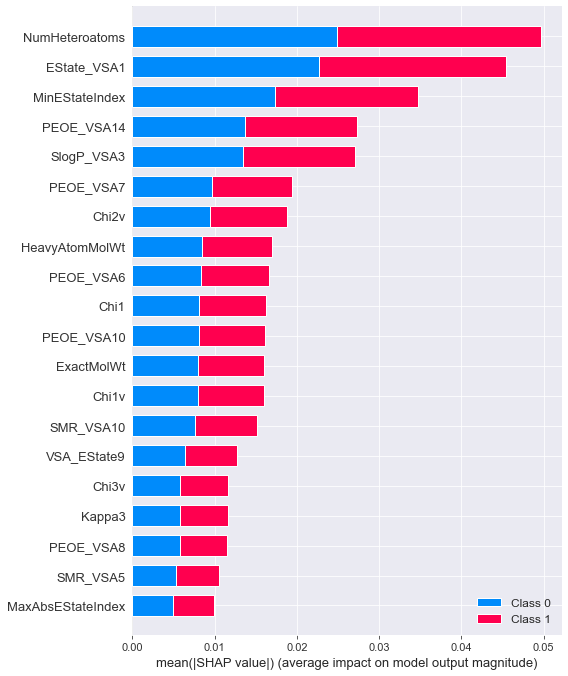

In [454]:
explainer = shap.Explainer(rfc_ec1)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [511]:
y_hat_rfc = rfc_ec1.predict_proba(X_test)[:,1]
pd.DataFrame(y_hat_rfc)

,0
0,0.463847
1,0.784642
2,0.793919
3,0.714356
4,0.796059
...,...
9888,0.646736
9889,0.751578
9890,0.422986
9891,0.462800


In [298]:
pd.read_csv('submissions/rfc_xgb.csv')[['EC1']]

,EC1
0,0.411260
1,0.742127
2,0.720807
3,0.646051
4,0.768030
...,...
9888,0.614055
9889,0.750975
9890,0.400226
9891,0.426133


## LightGBM

In [512]:
def evaluate_lgbm(clf):
    y_hat = clf.predict(X_val)
    y_hat_binary = (y_hat >= 0.5).astype(int)
    train_hat = clf.predict(X_train)
    train_hat_binary = (train_hat >= 0.5).astype(int)
    train_acc = accuracy_score(y_train, train_hat_binary)
    acc = accuracy_score(y_val, y_hat_binary)
    roc = roc_auc_score(y_val, y_hat)
    print(f'Train Accuracy score is: {train_acc}')
    print(f'Test Accuracy score is: {acc}')
    print(f'ROCAUC score is: {roc}')
    print(classification_report(y_val, y_hat_binary))
    plot_cm(y_hat_binary)
    plot_roc_curve(y_hat)

In [522]:
def objective(trial):
    parameters = {
        'num_leaves':trial.suggest_int('num_leaves', 10, 60),
        'learning_rate':trial.suggest_loguniform('learning_rate', 0.005, 0.1),
        'max_depth':trial.suggest_int('max_depth', 2, 8),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100, step=5),
        'subsample':trial.suggest_float('subsample', 0.5, 1),
        'feature_fraction':trial.suggest_uniform('feature_fraction', 0.5, 1),
        'lambda_l1 ':trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 8.0),
        'n_estimators ':trial.suggest_int('n_estimators ', 100, 1000, step=100),
        'bagging_fraction ':trial.suggest_uniform('bagging_fraction ', 0.5,1),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'class_weight': trial.suggest_uniform('class_weight', 1.0, 1.5),
    }
#     class_weights = trial.suggest_categorical('class_weights', [np.array([2,1.0]), np.array([1.5,1.0])])
#     train = lgb.Dataset(X_train, label=y_train, weight=class_weights[y_train])
    train = lgb.Dataset(X_train, label=y_train)
    val = lgb.Dataset(X_val, label=y_val)
    
#     model = LGBMClassifier(**parameters, random_state=2, objective='binary', metric='binary_logloss')
    model = lgb.train(parameters, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

#     model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    roc_score = roc_auc_score(y_val, y_hat)
#     pred_labels = (y_hat>=0.5)
#     score = hamming_loss(y_val, pred_labels)
#     acc_score = accuracy_score(y_val, pred_labels)

    return roc_score

In [523]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-06 20:58:44,161] A new study created in memory with name: no-name-40b688fc-de61-4bba-85c7-6ca5c13aa84f
[I 2023-07-06 20:58:44,296] Trial 0 finished with value: 0.7049849701334528 and parameters: {'num_leaves': 20, 'learning_rate': 0.0068913791832637, 'max_depth': 2, 'min_data_in_leaf': 41, 'subsample': 0.9856551795154589, 'feature_fraction': 0.5639935219743566, 'lambda_l1': 5.798357650969811e-05, 'lambda_l2': 0.015952594687234357, 'n_estimators ': 600, 'bagging_fraction ': 0.6960892715563078, 'bagging_freq': 6, 'class_weight': 1.4177730920111242}. Best is trial 0 with value: 0.7049849701334528.


[LightGBM] [Warning] Unknown parameter: 5.798357650969811e-05
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6960892715563078
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9856551795154589 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.798357650969811e-05
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6960892715563078
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9856551795154589 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:58:44,423] Trial 1 finished with value: 0.7123185661996718 and parameters: {'num_leaves': 36, 'learning_rate': 0.05040058945929727, 'max_depth': 2, 'min_data_in_leaf': 91, 'subsample': 0.9330952196544794, 'feature_fraction': 0.7316787142367516, 'lambda_l1': 0.0003492283189201964, 'lambda_l2': 5.436667541004465e-07, 'n_estimators ': 300, 'bagging_fraction ': 0.8834725517929515, 'bagging_freq': 3, 'class_weight': 1.4153120018900978}. Best is trial 1 with value: 0.7123185661996718.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.008814311574007508
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.9847881395527105
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7474043691910206 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimat

[I 2023-07-06 20:58:44,634] Trial 2 finished with value: 0.7093965643811482 and parameters: {'num_leaves': 29, 'learning_rate': 0.0057172876280775775, 'max_depth': 5, 'min_data_in_leaf': 51, 'subsample': 0.7474043691910206, 'feature_fraction': 0.8879785852566312, 'lambda_l1': 0.008814311574007508, 'lambda_l2': 0.011909532341159308, 'n_estimators ': 500, 'bagging_fraction ': 0.9847881395527105, 'bagging_freq': 2, 'class_weight': 1.2718377477357223}. Best is trial 1 with value: 0.7123185661996718.
[I 2023-07-06 20:58:44,733] Trial 3 finished with value: 0.6991051627012032 and parameters: {'num_leaves': 10, 'learning_rate': 0.005452753740311554, 'max_depth': 2, 'min_data_in_leaf': 11, 'subsample': 0.6745520214884275, 'feature_fraction': 0.9759157034363983, 'lambda_l1': 8.659671608996817e-05, 'lambda_l2': 1.1677423447479007, 'n_estimators ': 600, 'bagging_fraction ': 0.7214262916206989, 'bagging_freq': 6, 'class_weight': 1.1971753304019845}. Best is trial 1 with value: 0.7123185661996718.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:44,872] Trial 4 finished with value: 0.7067694931058376 and parameters: {'num_leaves': 16, 'learning_rate': 0.012869886629857098, 'max_depth': 3, 'min_data_in_leaf': 26, 'subsample': 0.5208812925317062, 'feature_fraction': 0.8817975354802028, 'lambda_l1': 1.1010623962784603e-05, 'lambda_l2': 1.6770567412526753e-08, 'n_estimators ': 400, 'bagging_fraction ': 0.7638321413773846, 'bagging_freq': 8, 'class_weight': 1.0529745358079428}. Best is trial 1 with value: 0.7123185661996718.


[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7638321413773846
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5208812925317062 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 1.1010623962784603e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7638321413773846
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5208812925317062 will be ignored. C

[I 2023-07-06 20:58:45,001] Trial 5 finished with value: 0.7117423569200494 and parameters: {'num_leaves': 26, 'learning_rate': 0.047830486899903636, 'max_depth': 3, 'min_data_in_leaf': 66, 'subsample': 0.9520675893711088, 'feature_fraction': 0.9710602688148815, 'lambda_l1': 0.0666201894061666, 'lambda_l2': 3.0789057657747764e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.5086963650546918, 'bagging_freq': 3, 'class_weight': 1.240502416497481}. Best is trial 1 with value: 0.7123185661996718.
[I 2023-07-06 20:58:45,102] Trial 6 finished with value: 0.6990644648620523 and parameters: {'num_leaves': 41, 'learning_rate': 0.005994322075209384, 'max_depth': 2, 'min_data_in_leaf': 76, 'subsample': 0.8952205718562705, 'feature_fraction': 0.9931200107080873, 'lambda_l1': 5.754249459740284e-08, 'lambda_l2': 0.005977748032915055, 'n_estimators ': 200, 'bagging_fraction ': 0.5051356113239697, 'bagging_freq': 4, 'class_weight': 1.1000943703928698}. Best is trial 1 with value: 0.7123185661996718.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:45,199] Trial 7 finished with value: 0.7145726598098535 and parameters: {'num_leaves': 12, 'learning_rate': 0.07964146105902815, 'max_depth': 2, 'min_data_in_leaf': 71, 'subsample': 0.8424028702949002, 'feature_fraction': 0.5060240582532087, 'lambda_l1': 0.03800513081490662, 'lambda_l2': 0.006698913540313448, 'n_estimators ': 500, 'bagging_fraction ': 0.627177657914754, 'bagging_freq': 2, 'class_weight': 1.2605987312396945}. Best is trial 7 with value: 0.7145726598098535.


[LightGBM] [Warning] Unknown parameter: 0.03800513081490662
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.627177657914754
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8424028702949002 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Start training from score 0.666639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2023-07-06 20:58:45,381] Trial 8 finished with value: 0.7141257563229759 and parameters: {'num_leaves': 21, 'learning_rate': 0.010389142664188063, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.7092541840177077, 'feature_fraction': 0.5632929235692741, 'lambda_l1': 1.020382442708125e-06, 'lambda_l2': 3.737289922040975e-07, 'n_estimators ': 700, 'bagging_fraction ': 0.8094638468731434, 'bagging_freq': 10, 'class_weight': 1.1286633946676776}. Best is trial 7 with value: 0.7145726598098535.
[I 2023-07-06 20:58:45,528] Trial 9 finished with value: 0.7119852560486519 and parameters: {'num_leaves': 46, 'learning_rate': 0.09530477807096996, 'max_depth': 4, 'min_data_in_leaf': 51, 'subsample': 0.7995558221523729, 'feature_fraction': 0.8855715643358217, 'lambda_l1': 0.00014482485243867975, 'lambda_l2': 0.0001837243810276305, 'n_estimators ': 900, 'bagging_fraction ': 0.6756316753619102, 'bagging_freq': 10, 'class_weight': 1.0306308360311238}. Best is trial 7 with value: 0.714572659809

[LightGBM] [Warning] Unknown parameter: 0.00014482485243867975
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6756316753619102
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7995558221523729 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00014482485243867975
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6756316753619102
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7995558221523729 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing

[LightGBM] [Warning] Unknown parameter: 0.26575575505621407
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.6378091503893957
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8542819057123128 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.26575575505621407
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.6378091503893957
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8542819057123128 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-06 20:58:45,857] Trial 10 finished with value: 0.7145203708139825 and parameters: {'num_leaves': 56, 'learning_rate': 0.02936497104820056, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.8542819057123128, 'feature_fraction': 0.5414896404364271, 'lambda_l1': 0.26575575505621407, 'lambda_l2': 3.54344923321137, 'n_estimators ': 1000, 'bagging_fraction ': 0.6378091503893957, 'bagging_freq': 1, 'class_weight': 1.3301001131898629}. Best is trial 7 with value: 0.7145726598098535.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:46,190] Trial 11 finished with value: 0.7158912182820876 and parameters: {'num_leaves': 60, 'learning_rate': 0.027258645865250685, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.8476073709258862, 'feature_fraction': 0.5114164739485868, 'lambda_l1': 0.7645403784916184, 'lambda_l2': 2.069108870298269, 'n_estimators ': 1000, 'bagging_fraction ': 0.6075569741228101, 'bagging_freq': 1, 'class_weight': 1.35128920674464}. Best is trial 11 with value: 0.7158912182820876.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.9486514550280609
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.5957443770776532
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8325054847149131 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9486514550280609
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.5957443770776532
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8325054847149131 will be ignored. Current valu

[I 2023-07-06 20:58:46,481] Trial 12 finished with value: 0.7157557305390918 and parameters: {'num_leaves': 59, 'learning_rate': 0.022544051057872196, 'max_depth': 6, 'min_data_in_leaf': 76, 'subsample': 0.8325054847149131, 'feature_fraction': 0.5081866281045863, 'lambda_l1': 0.9486514550280609, 'lambda_l2': 0.2668984137623427, 'n_estimators ': 800, 'bagging_fraction ': 0.5957443770776532, 'bagging_freq': 1, 'class_weight': 1.4853409076199768}. Best is trial 11 with value: 0.7158912182820876.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:46,860] Trial 13 finished with value: 0.715176430284344 and parameters: {'num_leaves': 60, 'learning_rate': 0.02125463863151626, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.787728244962585, 'feature_fraction': 0.62741616478235, 'lambda_l1': 0.9770675840524362, 'lambda_l2': 0.537095902345593, 'n_estimators ': 800, 'bagging_fraction ': 0.5875865373386331, 'bagging_freq': 1, 'class_weight': 1.4789503898663972}. Best is trial 11 with value: 0.7158912182820876.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 20:58:47,212] Trial 14 finished with value: 0.713539501374196 and parameters: {'num_leaves': 51, 'learning_rate': 0.02273528140811401, 'max_depth': 6, 'min_data_in_leaf': 76, 'subsample': 0.8898452323111825, 'feature_fraction': 0.6328490620972169, 'lambda_l1': 0.004493779342245108, 'lambda_l2': 5.333600332056018, 'n_estimators ': 1000, 'bagging_fraction ': 0.6098142795928562, 'bagging_freq': 4, 'class_weight': 1.4856130492066342}. Best is trial 11 with value: 0.7158912182820876.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:47,608] Trial 15 finished with value: 0.7165452171023654 and parameters: {'num_leaves': 52, 'learning_rate': 0.016539478639056072, 'max_depth': 6, 'min_data_in_leaf': 96, 'subsample': 0.8308807384611243, 'feature_fraction': 0.5045249686228435, 'lambda_l1': 0.9307855040292302, 'lambda_l2': 0.1575802618457058, 'n_estimators ': 800, 'bagging_fraction ': 0.5534338971769378, 'bagging_freq': 1, 'class_weight': 1.3729674166721497}. Best is trial 15 with value: 0.7165452171023654.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:48,055] Trial 16 finished with value: 0.715590878532405 and parameters: {'num_leaves': 51, 'learning_rate': 0.015726627929794016, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.9116771050317587, 'feature_fraction': 0.6253262246993536, 'lambda_l1': 0.0027684820949133333, 'lambda_l2': 0.14204840468774568, 'n_estimators ': 800, 'bagging_fraction ': 0.5517305481961376, 'bagging_freq': 5, 'class_weight': 1.341436782867789}. Best is trial 15 with value: 0.7165452171023654.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 20:58:48,556] Trial 17 finished with value: 0.715505876716457 and parameters: {'num_leaves': 52, 'learning_rate': 0.009545274888358346, 'max_depth': 7, 'min_data_in_leaf': 61, 'subsample': 0.9711539868201937, 'feature_fraction': 0.7060852471571448, 'lambda_l1': 0.1107849147961138, 'lambda_l2': 6.1265747029792506, 'n_estimators ': 900, 'bagging_fraction ': 0.5706151076781241, 'bagging_freq': 8, 'class_weight': 1.3439240321900388}. Best is trial 15 with value: 0.7165452171023654.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.015376300723285953
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.657235939769781
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_frac

[I 2023-07-06 20:58:48,897] Trial 18 finished with value: 0.7144183686348451 and parameters: {'num_leaves': 44, 'learning_rate': 0.0319641766732703, 'max_depth': 5, 'min_data_in_leaf': 1, 'subsample': 0.7705348150108495, 'feature_fraction': 0.5895924616761803, 'lambda_l1': 0.015376300723285953, 'lambda_l2': 0.08755330221988497, 'n_estimators ': 1000, 'bagging_fraction ': 0.657235939769781, 'bagging_freq': 2, 'class_weight': 1.3931021735028077}. Best is trial 15 with value: 0.7165452171023654.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:49,287] Trial 19 finished with value: 0.7138380380550554 and parameters: {'num_leaves': 37, 'learning_rate': 0.015353947002903521, 'max_depth': 6, 'min_data_in_leaf': 86, 'subsample': 0.9985003725070865, 'feature_fraction': 0.6849906417092575, 'lambda_l1': 0.20045128340388446, 'lambda_l2': 0.7432958544175133, 'n_estimators ': 700, 'bagging_fraction ': 0.546141872016656, 'bagging_freq': 3, 'class_weight': 1.375213635940816}. Best is trial 15 with value: 0.7165452171023654.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 20:58:49,731] Trial 20 finished with value: 0.7182702388035865 and parameters: {'num_leaves': 55, 'learning_rate': 0.008314283765293817, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.8715582626382801, 'feature_fraction': 0.5056001834664702, 'lambda_l1': 0.0019476236004818822, 'lambda_l2': 0.06534150133077823, 'n_estimators ': 900, 'bagging_fraction ': 0.6617867962578748, 'bagging_freq': 7, 'class_weight': 1.3074920792478144}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.001312119201394106
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6494932249351436
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8658120077275729 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.001312119201394106
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6494932249351436
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8658120077275729 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [W

[I 2023-07-06 20:58:50,134] Trial 21 finished with value: 0.7179410499527339 and parameters: {'num_leaves': 53, 'learning_rate': 0.008370180690360024, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.8658120077275729, 'feature_fraction': 0.5042310870752511, 'lambda_l1': 0.001312119201394106, 'lambda_l2': 0.059395462997918876, 'n_estimators ': 900, 'bagging_fraction ': 0.6494932249351436, 'bagging_freq': 8, 'class_weight': 1.2944706322012889}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] Unknown parameter: 0.0011723190249696641
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6670612433614584
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9010766239487452 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0011723190249696641
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6670612433614584
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9010766239487452 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:58:50,464] Trial 22 finished with value: 0.7179768537479362 and parameters: {'num_leaves': 48, 'learning_rate': 0.008203435508420608, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.9010766239487452, 'feature_fraction': 0.5376345736329973, 'lambda_l1': 0.0011723190249696641, 'lambda_l2': 0.030045707853091477, 'n_estimators ': 900, 'bagging_fraction ': 0.6670612433614584, 'bagging_freq': 8, 'class_weight': 1.298551907843473}. Best is trial 20 with value: 0.7182702388035865.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0009983656378328017
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6841713612574474
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9270259435088396 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0009983656378328017
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6841713612574474
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9270259435088396 will be ignored. Curren

[I 2023-07-06 20:58:50,797] Trial 23 finished with value: 0.7169601805129474 and parameters: {'num_leaves': 46, 'learning_rate': 0.008388402100677601, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.9270259435088396, 'feature_fraction': 0.5817268138661229, 'lambda_l1': 0.0009983656378328017, 'lambda_l2': 0.001991852783963783, 'n_estimators ': 900, 'bagging_fraction ': 0.6841713612574474, 'bagging_freq': 8, 'class_weight': 1.2992242167380756}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] Unknown parameter: 0.0016754336856690615
[LightGBM] [Warning] Unknown parameter: 0.6496994621415939
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9085684295615901 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0016754336856690615
[LightGBM] [Warning] Unknown parameter: 0.6496994621415939
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9085684295615901 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:58:51,138] Trial 24 finished with value: 0.7177009842179962 and parameters: {'num_leaves': 55, 'learning_rate': 0.007661292545663087, 'max_depth': 7, 'min_data_in_leaf': 61, 'subsample': 0.9085684295615901, 'feature_fraction': 0.5457188818762027, 'lambda_l1': 0.0016754336856690615, 'lambda_l2': 0.06330835372829272, 'n_estimators ': 700, 'bagging_fraction ': 0.6496994621415939, 'bagging_freq': 7, 'class_weight': 1.202257283774457}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.7272936431061545
[LightGBM] [Warning] Unknown parameter: 0.000684266903430845
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_frac

[I 2023-07-06 20:58:51,438] Trial 25 finished with value: 0.7163692891014792 and parameters: {'num_leaves': 41, 'learning_rate': 0.011111506640004425, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.8774710569220443, 'feature_fraction': 0.5945651985356057, 'lambda_l1': 0.000684266903430845, 'lambda_l2': 0.03584004321758724, 'n_estimators ': 900, 'bagging_fraction ': 0.7272936431061545, 'bagging_freq': 9, 'class_weight': 1.3020298078613601}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] Unknown parameter: 0.015328270145085964
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.6648843961068793
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9628320801025129 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.015328270145085964
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.6648843961068793
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9628320801025129 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was

[I 2023-07-06 20:58:51,807] Trial 26 finished with value: 0.7163358035376209 and parameters: {'num_leaves': 47, 'learning_rate': 0.007768754023136324, 'max_depth': 7, 'min_data_in_leaf': 66, 'subsample': 0.9628320801025129, 'feature_fraction': 0.5390067062655879, 'lambda_l1': 0.015328270145085964, 'lambda_l2': 0.0014586405129599447, 'n_estimators ': 100, 'bagging_fraction ': 0.6648843961068793, 'bagging_freq': 7, 'class_weight': 1.3043818996801766}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.002411356245385388
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.7606237824563715
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.878464254458382 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 0.002411356245385388
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.7606237824563715
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.878464254458382 will be ignored. Current value: bagging_fraction

[I 2023-07-06 20:58:52,330] Trial 27 finished with value: 0.7154381328449594 and parameters: {'num_leaves': 31, 'learning_rate': 0.008818409999813108, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.878464254458382, 'feature_fraction': 0.6589847442792014, 'lambda_l1': 0.002411356245385388, 'lambda_l2': 0.03120016542431749, 'n_estimators ': 900, 'bagging_fraction ': 0.7606237824563715, 'bagging_freq': 9, 'class_weight': 1.2323680698439925}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] Unknown parameter: 0.0002797952893876097
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6358992231568334
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9358111454916427 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0002797952893876097
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6358992231568334
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9358111454916427 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:58:52,739] Trial 28 finished with value: 0.7157871554528665 and parameters: {'num_leaves': 56, 'learning_rate': 0.005216139422617809, 'max_depth': 7, 'min_data_in_leaf': 41, 'subsample': 0.9358111454916427, 'feature_fraction': 0.5993624502960435, 'lambda_l1': 0.0002797952893876097, 'lambda_l2': 0.4164461175260792, 'n_estimators ': 700, 'bagging_fraction ': 0.6358992231568334, 'bagging_freq': 7, 'class_weight': 1.2826865905735865}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 3.617333770087721e-05
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.7063294988143322
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9865830812721801 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.617333770087721e-05
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.7063294988143322
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9865830812721801 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n

[I 2023-07-06 20:58:53,119] Trial 29 finished with value: 0.7139343734464629 and parameters: {'num_leaves': 49, 'learning_rate': 0.006561382177581099, 'max_depth': 5, 'min_data_in_leaf': 56, 'subsample': 0.9865830812721801, 'feature_fraction': 0.5574169067765382, 'lambda_l1': 3.617333770087721e-05, 'lambda_l2': 0.045758362461225215, 'n_estimators ': 600, 'bagging_fraction ': 0.7063294988143322, 'bagging_freq': 9, 'class_weight': 1.3242511036800844}. Best is trial 20 with value: 0.7182702388035865.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 20:58:53,596] Trial 30 finished with value: 0.7168756938595203 and parameters: {'num_leaves': 42, 'learning_rate': 0.006771142220062367, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9558707263044848, 'feature_fraction': 0.542170713939676, 'lambda_l1': 0.0009026709384609642, 'lambda_l2': 0.014778827481147503, 'n_estimators ': 800, 'bagging_fraction ': 0.70554418748991, 'bagging_freq': 6, 'class_weight': 1.219577246480689}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] Unknown parameter: 0.0018618028056815823
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6585760877188552
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9051321900038298 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0018618028056815823
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6585760877188552
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9051321900038298 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:58:53,959] Trial 31 finished with value: 0.7172489291059096 and parameters: {'num_leaves': 55, 'learning_rate': 0.007217764597647329, 'max_depth': 7, 'min_data_in_leaf': 71, 'subsample': 0.9051321900038298, 'feature_fraction': 0.5429562181661424, 'lambda_l1': 0.0018618028056815823, 'lambda_l2': 0.07509677727478128, 'n_estimators ': 700, 'bagging_fraction ': 0.6585760877188552, 'bagging_freq': 7, 'class_weight': 1.1899130699444207}. Best is trial 20 with value: 0.7182702388035865.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:54,495] Trial 32 finished with value: 0.7192341078801835 and parameters: {'num_leaves': 54, 'learning_rate': 0.008323719684851641, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.9268847979002569, 'feature_fraction': 0.5008585061831267, 'lambda_l1': 0.00046664488564186193, 'lambda_l2': 0.2353609844806092, 'n_estimators ': 900, 'bagging_fraction ': 0.6339047447501956, 'bagging_freq': 7, 'class_weight': 1.263768436660163}. Best is trial 32 with value: 0.7192341078801835.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.00040686779832102137
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6873802294387938
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9274361632206591 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00040686779832102137
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6873802294387938
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9274361632206591 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100

[I 2023-07-06 20:58:54,867] Trial 33 finished with value: 0.7174673580147697 and parameters: {'num_leaves': 49, 'learning_rate': 0.011315945414025167, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.9274361632206591, 'feature_fraction': 0.5030716452027036, 'lambda_l1': 0.00040686779832102137, 'lambda_l2': 0.35955608422787083, 'n_estimators ': 900, 'bagging_fraction ': 0.6873802294387938, 'bagging_freq': 8, 'class_weight': 1.2611020397992583}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 0.00020643021909339242
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.6254405741753957
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.879666956320393 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00020643021909339242
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.6254405741753957
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.879666956320393 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing

[I 2023-07-06 20:58:55,204] Trial 34 finished with value: 0.7161647695806834 and parameters: {'num_leaves': 57, 'learning_rate': 0.00898991870185272, 'max_depth': 6, 'min_data_in_leaf': 91, 'subsample': 0.879666956320393, 'feature_fraction': 0.5748045313206891, 'lambda_l1': 0.00020643021909339242, 'lambda_l2': 1.5016146259969898, 'n_estimators ': 1000, 'bagging_fraction ': 0.6254405741753957, 'bagging_freq': 5, 'class_weight': 1.27394077171973}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:58:55,532] Trial 35 finished with value: 0.7177166966748834 and parameters: {'num_leaves': 53, 'learning_rate': 0.005858419167740792, 'max_depth': 7, 'min_data_in_leaf': 81, 'subsample': 0.8110735463622422, 'feature_fraction': 0.5279938974013642, 'lambda_l1': 0.007249272199194629, 'lambda_l2': 0.021090919236531593, 'n_estimators ': 800, 'bagging_fraction ': 0.7453438832888831, 'bagging_freq': 6, 'class_weight': 1.3153878509409427}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8110735463622422 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Start training from score 0.666639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-07-06 20:58:55,819] Trial 36 finished with value: 0.71604782768844 and parameters: {'num_leaves': 37, 'learning_rate': 0.005127905275701994, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.9469140012420189, 'feature_fraction': 0.5679970071323059, 'lambda_l1': 4.9520096634212886e-05, 'lambda_l2': 1.2261933263303364, 'n_estimators ': 400, 'bagging_fraction ': 0.6858282305380642, 'bagging_freq': 7, 'class_weight': 1.2457964388362923}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 4.9520096634212886e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6858282305380642
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9469140012420189 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.9520096634212886e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6858282305380642
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9469140012420189 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing

[I 2023-07-06 20:58:56,254] Trial 37 finished with value: 0.7158657177373031 and parameters: {'num_leaves': 49, 'learning_rate': 0.013295570732922268, 'max_depth': 7, 'min_data_in_leaf': 71, 'subsample': 0.8597738020991738, 'feature_fraction': 0.5272183938815822, 'lambda_l1': 0.0005501831667623739, 'lambda_l2': 0.2261081107655073, 'n_estimators ': 600, 'bagging_fraction ': 0.7299727964682488, 'bagging_freq': 8, 'class_weight': 1.285611803897847}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.006420729487663541
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.6246264344318276
[LightGBM] 

[I 2023-07-06 20:58:56,567] Trial 38 finished with value: 0.709407382794087 and parameters: {'num_leaves': 32, 'learning_rate': 0.006589725976459199, 'max_depth': 4, 'min_data_in_leaf': 81, 'subsample': 0.976936998161416, 'feature_fraction': 0.7791845263126785, 'lambda_l1': 0.006420729487663541, 'lambda_l2': 0.004613227482776204, 'n_estimators ': 900, 'bagging_fraction ': 0.6246264344318276, 'bagging_freq': 9, 'class_weight': 1.418083100593322}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.021076813881583993
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.7860560873626617
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8239040704461195 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.021076813881583993
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.7860560873626617
[Li

[I 2023-07-06 20:58:56,972] Trial 39 finished with value: 0.716693841489644 and parameters: {'num_leaves': 54, 'learning_rate': 0.00942860292446515, 'max_depth': 6, 'min_data_in_leaf': 91, 'subsample': 0.8239040704461195, 'feature_fraction': 0.5207693067866979, 'lambda_l1': 0.021076813881583993, 'lambda_l2': 0.013592829229355485, 'n_estimators ': 1000, 'bagging_fraction ': 0.7860560873626617, 'bagging_freq': 6, 'class_weight': 1.2619872948770807}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.7037576371451388
[LightGBM] [Warning] Unknown parameter: 0.00011128569725953475
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8694010992943719 will be ignored. Current value

[I 2023-07-06 20:58:57,266] Trial 40 finished with value: 0.7153982077495897 and parameters: {'num_leaves': 25, 'learning_rate': 0.007910231702992989, 'max_depth': 8, 'min_data_in_leaf': 66, 'subsample': 0.8694010992943719, 'feature_fraction': 0.5664465413434453, 'lambda_l1': 0.00011128569725953475, 'lambda_l2': 0.0006535792827196638, 'n_estimators ': 400, 'bagging_fraction ': 0.7037576371451388, 'bagging_freq': 8, 'class_weight': 1.171349915441842}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 0.7037576371451388
[LightGBM] [Warning] Unknown parameter: 0.00011128569725953475
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8694010992943719 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Start training from score 0.666639
[LightGBM] [Warning] Unknown parameter: 0.004179572555671446
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.7331037128242535
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8078614927230658 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown para

[I 2023-07-06 20:58:57,679] Trial 41 finished with value: 0.718949223006128 and parameters: {'num_leaves': 53, 'learning_rate': 0.005903715513911081, 'max_depth': 7, 'min_data_in_leaf': 81, 'subsample': 0.8078614927230658, 'feature_fraction': 0.5007444891389293, 'lambda_l1': 0.004179572555671446, 'lambda_l2': 0.013234202081740056, 'n_estimators ': 800, 'bagging_fraction ': 0.7331037128242535, 'bagging_freq': 5, 'class_weight': 1.3203475760731234}. Best is trial 32 with value: 0.7192341078801835.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 20:58:58,081] Trial 42 finished with value: 0.7177094843995909 and parameters: {'num_leaves': 44, 'learning_rate': 0.006005925400516676, 'max_depth': 7, 'min_data_in_leaf': 76, 'subsample': 0.8135418737522093, 'feature_fraction': 0.5023070548958208, 'lambda_l1': 0.0062192859508177056, 'lambda_l2': 0.005461291062628039, 'n_estimators ': 900, 'bagging_fraction ': 0.6694243655295978, 'bagging_freq': 4, 'class_weight': 1.2799490146114316}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 0.000955196713136644
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.6441525546326865
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8558117476784958 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.000955196713136644
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.6441525546326865
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8558117476784958 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was

[I 2023-07-06 20:58:58,453] Trial 43 finished with value: 0.7183410736502098 and parameters: {'num_leaves': 57, 'learning_rate': 0.007184463014955422, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.8558117476784958, 'feature_fraction': 0.5293886546239002, 'lambda_l1': 0.000955196713136644, 'lambda_l2': 0.10872863822799578, 'n_estimators ': 800, 'bagging_fraction ': 0.6441525546326865, 'bagging_freq': 5, 'class_weight': 1.3207335766591415}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.00032448054790338893
[LightGBM] [Warning] Unknown parameter: 0.7211019332098287
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8468795490655323 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.00032448054790338893
[LightGBM] [Warning] Unknown parameter: 0.7211019332098287
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8468795490655323 will be ignored. Curre

[I 2023-07-06 20:58:58,945] Trial 44 finished with value: 0.718759128035917 and parameters: {'num_leaves': 59, 'learning_rate': 0.005118187815267315, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8468795490655323, 'feature_fraction': 0.5316374046406719, 'lambda_l1': 0.00032448054790338893, 'lambda_l2': 0.012333748548927688, 'n_estimators ': 800, 'bagging_fraction ': 0.7211019332098287, 'bagging_freq': 5, 'class_weight': 1.2440338136407123}. Best is trial 32 with value: 0.7192341078801835.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 20:58:59,327] Trial 45 finished with value: 0.7174070839998248 and parameters: {'num_leaves': 58, 'learning_rate': 0.005093662702662542, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.7640060164377277, 'feature_fraction': 0.5590288229163461, 'lambda_l1': 0.00034865282651274276, 'lambda_l2': 0.15781493814206024, 'n_estimators ': 800, 'bagging_fraction ': 0.8278459527017807, 'bagging_freq': 5, 'class_weight': 1.2532947064747584}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.7415161771751967
[LightGBM] [Warning] Unknown parameter: 9.922266327916378e-05
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.849153340445324 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.7415161771751967


[I 2023-07-06 20:58:59,650] Trial 46 finished with value: 0.7170750617551072 and parameters: {'num_leaves': 58, 'learning_rate': 0.006118417654511487, 'max_depth': 6, 'min_data_in_leaf': 91, 'subsample': 0.849153340445324, 'feature_fraction': 0.5263349300321727, 'lambda_l1': 9.922266327916378e-05, 'lambda_l2': 0.00897249331973275, 'n_estimators ': 700, 'bagging_fraction ': 0.7415161771751967, 'bagging_freq': 4, 'class_weight': 1.3209609426252666}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 9.922266327916378e-05
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.849153340445324 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 0.7415161771751967
[LightGBM] [Warning] Unknown parameter: 9.922266327916378e-05
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.849153340445324 will be ignored. C

[I 2023-07-06 20:58:59,887] Trial 47 finished with value: 0.7106450607505402 and parameters: {'num_leaves': 60, 'learning_rate': 0.007184808598443997, 'max_depth': 4, 'min_data_in_leaf': 76, 'subsample': 0.8364193014633479, 'feature_fraction': 0.6032613596224893, 'lambda_l1': 0.003549692656225995, 'lambda_l2': 0.6481869794259776, 'n_estimators ': 800, 'bagging_fraction ': 0.7203797001600543, 'bagging_freq': 5, 'class_weight': 1.2320275981587205}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.003549692656225995
[LightGBM] [Warning] Unknown parameter: 0.7203797001600543
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8364193014633479 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.003549692656225995
[LightGBM] [Warning] Unknown parameter: 0.7203797001600543
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8364193014633479 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-06 20:59:00,361] Trial 48 finished with value: 0.7180510371509452 and parameters: {'num_leaves': 57, 'learning_rate': 0.0059364220661264995, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.7910951182544482, 'feature_fraction': 0.5211888964208575, 'lambda_l1': 2.5023186792871455e-05, 'lambda_l2': 2.0582121535736984, 'n_estimators ': 600, 'bagging_fraction ': 0.7602835741473001, 'bagging_freq': 5, 'class_weight': 1.3531753454944384}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.00028272808634282405
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6963867532539637
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8061490709998658 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00028272808634282405
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6963867532539637
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8061490709998658 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM

[I 2023-07-06 20:59:00,560] Trial 49 finished with value: 0.7088767653975637 and parameters: {'num_leaves': 51, 'learning_rate': 0.005595158469887903, 'max_depth': 3, 'min_data_in_leaf': 26, 'subsample': 0.8061490709998658, 'feature_fraction': 0.557534175295805, 'lambda_l1': 0.00028272808634282405, 'lambda_l2': 0.15162641195010393, 'n_estimators ': 500, 'bagging_fraction ': 0.6963867532539637, 'bagging_freq': 3, 'class_weight': 1.270055018301263}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.0001378761747640968
[LightGBM] [Warning] Unknown parameter: 0.6111600445407609
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8399391314112977 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.0001378761747640968
[LightGBM] [Warning] Unknown parameter: 0.6111600445407609
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8399391314112977 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:59:00,903] Trial 50 finished with value: 0.7150391394725251 and parameters: {'num_leaves': 60, 'learning_rate': 0.005019532219245818, 'max_depth': 7, 'min_data_in_leaf': 16, 'subsample': 0.8399391314112977, 'feature_fraction': 0.5000623846063549, 'lambda_l1': 0.0001378761747640968, 'lambda_l2': 0.00010993788171855735, 'n_estimators ': 800, 'bagging_fraction ': 0.6111600445407609, 'bagging_freq': 6, 'class_weight': 1.2451830998263878}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 2.40042598595042e-05
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.7686789495368714
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7982069027858751 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.40042598595042e-05
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.7686789495368714
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7982069027858751 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was

[I 2023-07-06 20:59:01,302] Trial 51 finished with value: 0.7180958562902632 and parameters: {'num_leaves': 56, 'learning_rate': 0.006383085022908661, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.7982069027858751, 'feature_fraction': 0.5236725991828931, 'lambda_l1': 2.40042598595042e-05, 'lambda_l2': 2.319772084397459, 'n_estimators ': 600, 'bagging_fraction ': 0.7686789495368714, 'bagging_freq': 5, 'class_weight': 1.3547164347296756}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 1.0728070032251582e-05
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.7832550588683584
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7365646529182 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0728070032251582e-05
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.7832550588683584
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7365646529182 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0

[I 2023-07-06 20:59:01,673] Trial 52 finished with value: 0.7174137811125965 and parameters: {'num_leaves': 55, 'learning_rate': 0.006992767445526803, 'max_depth': 8, 'min_data_in_leaf': 71, 'subsample': 0.7365646529182, 'feature_fraction': 0.5249587118072566, 'lambda_l1': 1.0728070032251582e-05, 'lambda_l2': 3.525277641583938, 'n_estimators ': 700, 'bagging_fraction ': 0.7832550588683584, 'bagging_freq': 4, 'class_weight': 1.3233338767105611}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 0.0006379636780460193
[LightGBM] [Warning] Unknown parameter: 0.7167060328801922
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8499055816269894 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0006379636780460193
[LightGBM] [Warning] Unknown parameter: 0.7167060328801922
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8499055816269894 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:59:02,042] Trial 53 finished with value: 0.7173511888663076 and parameters: {'num_leaves': 58, 'learning_rate': 0.00656223016701057, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.8499055816269894, 'feature_fraction': 0.5802418828507235, 'lambda_l1': 0.0006379636780460193, 'lambda_l2': 0.7578340164742032, 'n_estimators ': 300, 'bagging_fraction ': 0.7167060328801922, 'bagging_freq': 5, 'class_weight': 1.3409317642739846}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.002225277937709014
[LightGBM] [Warning] Unknown parameter: 0.7361158196014356
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7903810336650883 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.002225277937709014


[I 2023-07-06 20:59:02,306] Trial 54 finished with value: 0.7134367264512772 and parameters: {'num_leaves': 16, 'learning_rate': 0.005751552740882812, 'max_depth': 7, 'min_data_in_leaf': 76, 'subsample': 0.7903810336650883, 'feature_fraction': 0.5518637980952775, 'lambda_l1': 0.002225277937709014, 'lambda_l2': 0.34032901685356626, 'n_estimators ': 1000, 'bagging_fraction ': 0.7361158196014356, 'bagging_freq': 6, 'class_weight': 1.3596423036979655}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 0.7361158196014356
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7903810336650883 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.002225277937709014
[LightGBM] [Warning] Unknown parameter: 0.7361158196014356
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7903810336650883 will be ignored. Current value: bagging_fraction=
[LightGBM] [W

[I 2023-07-06 20:59:02,654] Trial 55 finished with value: 0.717585330232055 and parameters: {'num_leaves': 53, 'learning_rate': 0.010020250166670158, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.8242058545058015, 'feature_fraction': 0.5202264855274848, 'lambda_l1': 0.004058090579132785, 'lambda_l2': 0.10068725510774505, 'n_estimators ': 800, 'bagging_fraction ': 0.680867329333893, 'bagging_freq': 5, 'class_weight': 1.3337599464131735}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.03663905464256568
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6458313021410161
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8957232877345348 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.03663905464256568
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6458313021410161
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8957232877345348 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [War

[I 2023-07-06 20:59:03,028] Trial 56 finished with value: 0.717230125673897 and parameters: {'num_leaves': 57, 'learning_rate': 0.007485239071978837, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8957232877345348, 'feature_fraction': 0.5474268497196673, 'lambda_l1': 0.03663905464256568, 'lambda_l2': 7.393538465027307, 'n_estimators ': 700, 'bagging_fraction ': 0.6458313021410161, 'bagging_freq': 4, 'class_weight': 1.3116802305373527}. Best is trial 32 with value: 0.7192341078801835.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 6.842039533145821e-05
[LightGBM] [Warning] Unknown parameter: 0.5949861921853428
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.858992179286986 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 6.842039533145821e-05
[LightGBM] [Warning] Unknown parameter: 0.5949861921853428
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagg

[I 2023-07-06 20:59:03,313] Trial 57 finished with value: 0.714229819152197 and parameters: {'num_leaves': 50, 'learning_rate': 0.006361538448349302, 'max_depth': 5, 'min_data_in_leaf': 81, 'subsample': 0.858992179286986, 'feature_fraction': 0.6085989292616989, 'lambda_l1': 6.842039533145821e-05, 'lambda_l2': 0.02014111042928344, 'n_estimators ': 500, 'bagging_fraction ': 0.5949861921853428, 'bagging_freq': 6, 'class_weight': 1.2865501136758692}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:03,623] Trial 58 finished with value: 0.7166600983445253 and parameters: {'num_leaves': 54, 'learning_rate': 0.008677308271730036, 'max_depth': 6, 'min_data_in_leaf': 86, 'subsample': 0.8868546701602104, 'feature_fraction': 0.5734551565643553, 'lambda_l1': 0.00018466844013899134, 'lambda_l2': 0.20945602928804988, 'n_estimators ': 800, 'bagging_fraction ': 0.7130267004637547, 'bagging_freq': 5, 'class_weight': 1.37402360571584}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0011671703174566154
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.6756851643829345
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7704790648623153 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0011671703174566154
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.6756851643829345
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7704790648623153 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM

[I 2023-07-06 20:59:03,981] Trial 59 finished with value: 0.71698465073269 and parameters: {'num_leaves': 52, 'learning_rate': 0.005580967672285432, 'max_depth': 8, 'min_data_in_leaf': 61, 'subsample': 0.7704790648623153, 'feature_fraction': 0.5160412954752379, 'lambda_l1': 0.0011671703174566154, 'lambda_l2': 2.9328865935841906, 'n_estimators ': 1000, 'bagging_fraction ': 0.6756851643829345, 'bagging_freq': 4, 'class_weight': 1.4021654885854715}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 0.6972289591818465
[LightGBM] [Warning] Unknown parameter: 0.009609080926110253
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8236402476615072 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.6972289591818465
[LightGBM] [Warning] Unknown parameter: 0.009609080926110253
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8236402476615072 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was

[I 2023-07-06 20:59:04,366] Trial 60 finished with value: 0.7174385089135995 and parameters: {'num_leaves': 59, 'learning_rate': 0.010597389971738615, 'max_depth': 7, 'min_data_in_leaf': 76, 'subsample': 0.8236402476615072, 'feature_fraction': 0.5376066865820108, 'lambda_l1': 0.009609080926110253, 'lambda_l2': 1.0624207968109953, 'n_estimators ': 900, 'bagging_fraction ': 0.6972289591818465, 'bagging_freq': 6, 'class_weight': 1.3042133502726159}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:04,711] Trial 61 finished with value: 0.7180731891393437 and parameters: {'num_leaves': 57, 'learning_rate': 0.006076595277297578, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.7882206580013807, 'feature_fraction': 0.5183244992340137, 'lambda_l1': 1.9256124070187592e-05, 'lambda_l2': 1.920198644357315, 'n_estimators ': 600, 'bagging_fraction ': 0.7503767622029672, 'bagging_freq': 5, 'class_weight': 1.361740386775}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 8.545950504016968e-06
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.7471949568479126
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7991997154278245 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.545950504016968e-06
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.7471949568479126
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7991997154278245 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:59:05,049] Trial 62 finished with value: 0.7181885855440244 and parameters: {'num_leaves': 55, 'learning_rate': 0.007249263301139184, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.7991997154278245, 'feature_fraction': 0.5028967776691676, 'lambda_l1': 8.545950504016968e-06, 'lambda_l2': 0.4561496398799583, 'n_estimators ': 600, 'bagging_fraction ': 0.7471949568479126, 'bagging_freq': 5, 'class_weight': 1.337651769112124}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 1.3781050774402182e-05
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.772570576442658
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8009908544333199 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.3781050774402182e-05
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.772570576442658
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8009908544333199 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:59:05,390] Trial 63 finished with value: 0.7186421861436736 and parameters: {'num_leaves': 55, 'learning_rate': 0.007771250687885948, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.8009908544333199, 'feature_fraction': 0.5085666481981787, 'lambda_l1': 1.3781050774402182e-05, 'lambda_l2': 0.0680104773952308, 'n_estimators ': 500, 'bagging_fraction ': 0.772570576442658, 'bagging_freq': 7, 'class_weight': 1.3439437985049072}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 6.299259506818944e-06
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.7280476016654279
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8424221568025982 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.299259506818944e-06
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.7280476016654279
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8424221568025982 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] 

[I 2023-07-06 20:59:05,718] Trial 64 finished with value: 0.7186514590690498 and parameters: {'num_leaves': 55, 'learning_rate': 0.007891675283257406, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.8424221568025982, 'feature_fraction': 0.5031393749689239, 'lambda_l1': 6.299259506818944e-06, 'lambda_l2': 0.06515979817863447, 'n_estimators ': 500, 'bagging_fraction ': 0.7280476016654279, 'bagging_freq': 7, 'class_weight': 1.331884714246686}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 2.731207562853501e-06
[LightGBM] [Warning] Unknown parameter: 0.6398311130655925
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8650535274310108 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 2.731207562853501e-06
[LightGBM] [Warning] Unknown parameter: 0.6398311130655925
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8650535274310108 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] 

[I 2023-07-06 20:59:06,056] Trial 65 finished with value: 0.7186666563634162 and parameters: {'num_leaves': 52, 'learning_rate': 0.00834134664578141, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8650535274310108, 'feature_fraction': 0.5429916782045179, 'lambda_l1': 2.731207562853501e-06, 'lambda_l2': 0.05309304714652001, 'n_estimators ': 500, 'bagging_fraction ': 0.6398311130655925, 'bagging_freq': 7, 'class_weight': 1.2894922750206619}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:06,432] Trial 66 finished with value: 0.7178444569800657 and parameters: {'num_leaves': 46, 'learning_rate': 0.008968342056977064, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8471024412017699, 'feature_fraction': 0.5398501811473678, 'lambda_l1': 3.175257613723396e-06, 'lambda_l2': 0.040935794923415064, 'n_estimators ': 500, 'bagging_fraction ': 0.7259690786821545, 'bagging_freq': 7, 'class_weight': 1.27057139329208}. Best is trial 32 with value: 0.7192341078801835.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.6500286053334134
[LightGBM] [Warning] Unknown parameter: 8.725987165722863e-07
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.917485729316563 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.6500286053334134
[LightGBM] [Warning] Unknown parameter: 8.725987165722863e-07
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.917485729316563 will be ignored. Current 

[I 2023-07-06 20:59:06,789] Trial 67 finished with value: 0.7169073763545555 and parameters: {'num_leaves': 52, 'learning_rate': 0.007955918377787445, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.917485729316563, 'feature_fraction': 0.5837402571860739, 'lambda_l1': 8.725987165722863e-07, 'lambda_l2': 0.10340416543248106, 'n_estimators ': 400, 'bagging_fraction ': 0.6500286053334134, 'bagging_freq': 7, 'class_weight': 1.3191567682121186}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.5813592141903444
[LightGBM] [Warning] Unknown parameter: 8.712219248109055e-05
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fra

[I 2023-07-06 20:59:07,138] Trial 68 finished with value: 0.7153505552164068 and parameters: {'num_leaves': 51, 'learning_rate': 0.011732390688867455, 'max_depth': 6, 'min_data_in_leaf': 96, 'subsample': 0.8963410847339539, 'feature_fraction': 0.5565892895998517, 'lambda_l1': 8.712219248109055e-05, 'lambda_l2': 0.02396322079323461, 'n_estimators ': 500, 'bagging_fraction ': 0.5813592141903444, 'bagging_freq': 7, 'class_weight': 1.3005914776585334}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 5.06982425885541e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6323330930541295
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_frac

[I 2023-07-06 20:59:07,499] Trial 69 finished with value: 0.717265156725318 and parameters: {'num_leaves': 44, 'learning_rate': 0.010238863896319932, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.8624349922319199, 'feature_fraction': 0.5366536394500221, 'lambda_l1': 5.06982425885541e-05, 'lambda_l2': 0.06096061244368386, 'n_estimators ': 400, 'bagging_fraction ': 0.6323330930541295, 'bagging_freq': 6, 'class_weight': 1.2554050802327088}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0006249199153197099
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6168044866532512
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.832946360321459 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0006249199153197099
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6168044866532512
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.832946360321459 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_e

[I 2023-07-06 20:59:07,825] Trial 70 finished with value: 0.7160339183003758 and parameters: {'num_leaves': 47, 'learning_rate': 0.007065079258284126, 'max_depth': 7, 'min_data_in_leaf': 46, 'subsample': 0.832946360321459, 'feature_fraction': 0.5004897782190475, 'lambda_l1': 0.0006249199153197099, 'lambda_l2': 0.007175140216540315, 'n_estimators ': 500, 'bagging_fraction ': 0.6168044866532512, 'bagging_freq': 7, 'class_weight': 1.2842689086495227}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 0.0016125578490726517
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6613158478875871
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8803200332399755 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0016125578490726517
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6613158478875871
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8803200332399755 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing w

[I 2023-07-06 20:59:08,205] Trial 71 finished with value: 0.7181442815672274 and parameters: {'num_leaves': 54, 'learning_rate': 0.008152017014547557, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.8803200332399755, 'feature_fraction': 0.516923026202977, 'lambda_l1': 0.0016125578490726517, 'lambda_l2': 0.05046251633605765, 'n_estimators ': 500, 'bagging_fraction ': 0.6613158478875871, 'bagging_freq': 7, 'class_weight': 1.3314138308313637}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0004064359787485831
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6360906037865468
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8621879361545484 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0004064359787485831
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6360906037865468
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8621879361545484 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n

[I 2023-07-06 20:59:08,660] Trial 72 finished with value: 0.718700399508535 and parameters: {'num_leaves': 56, 'learning_rate': 0.009567129644375706, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.8621879361545484, 'feature_fraction': 0.531260527682063, 'lambda_l1': 0.0004064359787485831, 'lambda_l2': 0.09779002315528068, 'n_estimators ': 500, 'bagging_fraction ': 0.6360906037865468, 'bagging_freq': 7, 'class_weight': 1.3181896413409695}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.00041995107529860525
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6408976618600736
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8205628136602343 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00041995107529860525
[LightGBM] [Warning] Unknown 

[I 2023-07-06 20:59:09,080] Trial 73 finished with value: 0.7172960664765717 and parameters: {'num_leaves': 59, 'learning_rate': 0.00944248008070866, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.8205628136602343, 'feature_fraction': 0.5500394302481225, 'lambda_l1': 0.00041995107529860525, 'lambda_l2': 0.013968803161784123, 'n_estimators ': 300, 'bagging_fraction ': 0.6408976618600736, 'bagging_freq': 8, 'class_weight': 1.29245523733826}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unkn

[I 2023-07-06 20:59:09,418] Trial 74 finished with value: 0.7183905292522159 and parameters: {'num_leaves': 53, 'learning_rate': 0.00765337309323926, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8659786278065941, 'feature_fraction': 0.5673049953293904, 'lambda_l1': 0.0002453672212645005, 'lambda_l2': 0.2374079549122724, 'n_estimators ': 400, 'bagging_fraction ': 0.6009140641762288, 'bagging_freq': 6, 'class_weight': 1.3144948957487634}. Best is trial 32 with value: 0.7192341078801835.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unk

[I 2023-07-06 20:59:09,750] Trial 75 finished with value: 0.7176523013597714 and parameters: {'num_leaves': 53, 'learning_rate': 0.0055403960372783535, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8700091995167227, 'feature_fraction': 0.5715853295693712, 'lambda_l1': 0.00023115796795435147, 'lambda_l2': 0.2267158969956935, 'n_estimators ': 400, 'bagging_fraction ': 0.6038011628576724, 'bagging_freq': 6, 'class_weight': 1.272193253422233}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:10,079] Trial 76 finished with value: 0.7173823561988217 and parameters: {'num_leaves': 50, 'learning_rate': 0.009523530958704698, 'max_depth': 6, 'min_data_in_leaf': 96, 'subsample': 0.890234619545222, 'feature_fraction': 0.5117413203263241, 'lambda_l1': 0.00014403588113697568, 'lambda_l2': 0.030395400602022664, 'n_estimators ': 400, 'bagging_fraction ': 0.5602558647332972, 'bagging_freq': 7, 'class_weight': 1.3466437899804682}. Best is trial 32 with value: 0.7192341078801835.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.00039631444865660583
[LightGBM] [Warning] Unknown paramet

[I 2023-07-06 20:59:10,456] Trial 77 finished with value: 0.7188224930259874 and parameters: {'num_leaves': 56, 'learning_rate': 0.007727637229752991, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.839660303580253, 'feature_fraction': 0.5350795415685523, 'lambda_l1': 0.00039631444865660583, 'lambda_l2': 0.0034672749020726876, 'n_estimators ': 500, 'bagging_fraction ': 0.6215366945194205, 'bagging_freq': 6, 'class_weight': 1.3050397223661825}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 6.827194095972845e-05
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6843391347120902
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8118915335007286 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warnin

[I 2023-07-06 20:59:10,789] Trial 78 finished with value: 0.7191614699647371 and parameters: {'num_leaves': 56, 'learning_rate': 0.008466804839165572, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8118915335007286, 'feature_fraction': 0.5353190592959707, 'lambda_l1': 6.827194095972845e-05, 'lambda_l2': 0.0034115225464300463, 'n_estimators ': 500, 'bagging_fraction ': 0.6843391347120902, 'bagging_freq': 7, 'class_weight': 1.2990710095093287}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:11,139] Trial 79 finished with value: 0.7171773215155051 and parameters: {'num_leaves': 56, 'learning_rate': 0.008578804798247236, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8398517049532574, 'feature_fraction': 0.59167219561733, 'lambda_l1': 0.0004188593568058636, 'lambda_l2': 0.0035490166911942007, 'n_estimators ': 500, 'bagging_fraction ': 0.6740065516573728, 'bagging_freq': 8, 'class_weight': 1.2924517236600408}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:11,443] Trial 80 finished with value: 0.7171520785519812 and parameters: {'num_leaves': 60, 'learning_rate': 0.0067817041233342945, 'max_depth': 6, 'min_data_in_leaf': 91, 'subsample': 0.913509451927994, 'feature_fraction': 0.5367977039852727, 'lambda_l1': 0.0008565529241007199, 'lambda_l2': 0.002806818925274045, 'n_estimators ': 500, 'bagging_fraction ': 0.6945368344635962, 'bagging_freq': 7, 'class_weight': 1.2388203885287492}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 0.0008565529241007199
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.6945368344635962
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.913509451927994 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Start training from score 0.666639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] Unknown parameter: 8.591591723629589e-05
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.627512746409996
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8182616807165107 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.591591723629589e-05
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.627512746409996
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8182616807165107 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-06 20:59:11,855] Trial 81 finished with value: 0.718866539421524 and parameters: {'num_leaves': 55, 'learning_rate': 0.007823183917911819, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.8182616807165107, 'feature_fraction': 0.5324392003261137, 'lambda_l1': 8.591591723629589e-05, 'lambda_l2': 0.009827098745480186, 'n_estimators ': 500, 'bagging_fraction ': 0.627512746409996, 'bagging_freq': 7, 'class_weight': 1.3078377571750897}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:12,241] Trial 82 finished with value: 0.7183686348450777 and parameters: {'num_leaves': 58, 'learning_rate': 0.009103339810057676, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8125542187137615, 'feature_fraction': 0.5509181630584211, 'lambda_l1': 6.61640056237309e-05, 'lambda_l2': 0.0082583754475139, 'n_estimators ': 600, 'bagging_fraction ': 0.6211853094279267, 'bagging_freq': 8, 'class_weight': 1.3086607956539236}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:12,583] Trial 83 finished with value: 0.7184253027223764 and parameters: {'num_leaves': 54, 'learning_rate': 0.008387634474204514, 'max_depth': 7, 'min_data_in_leaf': 81, 'subsample': 0.8286356415237855, 'feature_fraction': 0.5334611306996973, 'lambda_l1': 0.00015695720622540147, 'lambda_l2': 0.011832331013899156, 'n_estimators ': 500, 'bagging_fraction ': 0.6373602937323886, 'bagging_freq': 7, 'class_weight': 1.266682089855843}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.00010096547649249241
[LightGBM] [Warning] Unknown paramete

[I 2023-07-06 20:59:12,942] Trial 84 finished with value: 0.7171729426340774 and parameters: {'num_leaves': 59, 'learning_rate': 0.005409103526963437, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.7788111762347937, 'feature_fraction': 0.5609074645958568, 'lambda_l1': 0.00010096547649249241, 'lambda_l2': 0.0016765644792179047, 'n_estimators ': 500, 'bagging_fraction ': 0.6580367452158117, 'bagging_freq': 6, 'class_weight': 1.2781583637959515}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unkn

[I 2023-07-06 20:59:13,248] Trial 85 finished with value: 0.7170969561622453 and parameters: {'num_leaves': 56, 'learning_rate': 0.009845820135843827, 'max_depth': 6, 'min_data_in_leaf': 86, 'subsample': 0.8407989265071889, 'feature_fraction': 0.5325019523093956, 'lambda_l1': 3.370897958182501e-05, 'lambda_l2': 0.004497722237949087, 'n_estimators ': 300, 'bagging_fraction ': 0.6237193442467333, 'bagging_freq': 7, 'class_weight': 1.296078470992134}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:13,583] Trial 86 finished with value: 0.7189888905202368 and parameters: {'num_leaves': 50, 'learning_rate': 0.00635399943330892, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8167080051240401, 'feature_fraction': 0.5129032033741805, 'lambda_l1': 0.00046277891832795275, 'lambda_l2': 0.021451381320501308, 'n_estimators ': 400, 'bagging_fraction ': 0.679831967965829, 'bagging_freq': 6, 'class_weight': 1.329135093615348}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.6868609014460502
[LightGBM] [Warning] Unknown parameter: 0.0005142183239710935
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8136450420868709 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warnin

[I 2023-07-06 20:59:13,942] Trial 87 finished with value: 0.7175964062262541 and parameters: {'num_leaves': 49, 'learning_rate': 0.006276590072863846, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8136450420868709, 'feature_fraction': 0.5480110205693445, 'lambda_l1': 0.0005142183239710935, 'lambda_l2': 0.009569847041742727, 'n_estimators ': 400, 'bagging_fraction ': 0.6868609014460502, 'bagging_freq': 6, 'class_weight': 1.2626647845300332}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0003816587120507391
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6712025234931672
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8529607532845558 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0003816587120507391
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6712025234931672
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8529607532845558 will be ignored. Current

[I 2023-07-06 20:59:14,248] Trial 88 finished with value: 0.7174936313033354 and parameters: {'num_leaves': 52, 'learning_rate': 0.006805928503106236, 'max_depth': 6, 'min_data_in_leaf': 96, 'subsample': 0.8529607532845558, 'feature_fraction': 0.5131010796977611, 'lambda_l1': 0.0003816587120507391, 'lambda_l2': 0.01837891241286402, 'n_estimators ': 200, 'bagging_fraction ': 0.6712025234931672, 'bagging_freq': 6, 'class_weight': 1.3085644298503818}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:14,611] Trial 89 finished with value: 0.7165900362416833 and parameters: {'num_leaves': 51, 'learning_rate': 0.0053592903885565325, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8166393637081392, 'feature_fraction': 0.581086334030614, 'lambda_l1': 0.00028866611128846513, 'lambda_l2': 0.0008457913883890383, 'n_estimators ': 400, 'bagging_fraction ': 0.6349643037761596, 'bagging_freq': 6, 'class_weight': 1.2876293875075282}. Best is trial 32 with value: 0.7192341078801835.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unk

[I 2023-07-06 20:59:14,913] Trial 90 finished with value: 0.7164589273801152 and parameters: {'num_leaves': 34, 'learning_rate': 0.005922824434926646, 'max_depth': 7, 'min_data_in_leaf': 81, 'subsample': 0.8061225916664695, 'feature_fraction': 0.528749463394222, 'lambda_l1': 0.0032683792139951997, 'lambda_l2': 0.005893587695432171, 'n_estimators ': 600, 'bagging_fraction ': 0.6125107614530363, 'bagging_freq': 8, 'class_weight': 1.249588488690932}. Best is trial 32 with value: 0.7192341078801835.


[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6125107614530363
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8061225916664695 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 0.0032683792139951997
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6125107614530363
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8061225916664695 will be ignored. Cu

[I 2023-07-06 20:59:15,336] Trial 91 finished with value: 0.719286139294794 and parameters: {'num_leaves': 56, 'learning_rate': 0.007974771482056314, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8371538341798914, 'feature_fraction': 0.5091603528043332, 'lambda_l1': 0.0013340906935100979, 'lambda_l2': 0.034073861539435264, 'n_estimators ': 500, 'bagging_fraction ': 0.7074510114136607, 'bagging_freq': 7, 'class_weight': 1.3299940546921347}. Best is trial 91 with value: 0.719286139294794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:15,683] Trial 92 finished with value: 0.7183737864702868 and parameters: {'num_leaves': 56, 'learning_rate': 0.007403166353379649, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8306718541263317, 'feature_fraction': 0.5187439443797053, 'lambda_l1': 0.0008844491153652711, 'lambda_l2': 0.028670404138142123, 'n_estimators ': 600, 'bagging_fraction ': 0.6538801894705674, 'bagging_freq': 7, 'class_weight': 1.3211680263091237}. Best is trial 91 with value: 0.719286139294794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 20:59:16,050] Trial 93 finished with value: 0.718103841309337 and parameters: {'num_leaves': 58, 'learning_rate': 0.00841743979691751, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8762646243653514, 'feature_fraction': 0.5660353772127553, 'lambda_l1': 0.001283445442333648, 'lambda_l2': 0.0027543966126950255, 'n_estimators ': 500, 'bagging_fraction ': 0.6662122066199084, 'bagging_freq': 6, 'class_weight': 1.3287242008557856}. Best is trial 91 with value: 0.719286139294794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0006314679638794875
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7091300484872799
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8605718802273566 will be ignored. Current value:

[I 2023-07-06 20:59:16,353] Trial 94 finished with value: 0.716517398326237 and parameters: {'num_leaves': 39, 'learning_rate': 0.0067633657103173235, 'max_depth': 7, 'min_data_in_leaf': 31, 'subsample': 0.8605718802273566, 'feature_fraction': 0.5465240068469112, 'lambda_l1': 0.0006314679638794875, 'lambda_l2': 0.01391363976573461, 'n_estimators ': 400, 'bagging_fraction ': 0.7091300484872799, 'bagging_freq': 7, 'class_weight': 1.295307971035551}. Best is trial 91 with value: 0.719286139294794.


[LightGBM] [Warning] Unknown parameter: 0.002316837818222773
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6864011029967337
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8852148033979406 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.002316837818222773
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6864011029967337
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8852148033979406 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-06 20:59:16,671] Trial 95 finished with value: 0.7191199993818049 and parameters: {'num_leaves': 50, 'learning_rate': 0.006304519245437743, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8852148033979406, 'feature_fraction': 0.511993962258566, 'lambda_l1': 0.002316837818222773, 'lambda_l2': 0.041166945138002974, 'n_estimators ': 600, 'bagging_fraction ': 0.6864011029967337, 'bagging_freq': 8, 'class_weight': 1.2780055199831841}. Best is trial 91 with value: 0.719286139294794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0026517588974121543
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6883724501076997
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8860034559298099 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0026517588974121543
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6883724501076997
[Li

[I 2023-07-06 20:59:16,985] Trial 96 finished with value: 0.7167031144150201 and parameters: {'num_leaves': 48, 'learning_rate': 0.006302880488357402, 'max_depth': 6, 'min_data_in_leaf': 96, 'subsample': 0.8860034559298099, 'feature_fraction': 0.5278945412145554, 'lambda_l1': 0.0026517588974121543, 'lambda_l2': 0.024367920833794805, 'n_estimators ': 600, 'bagging_fraction ': 0.6883724501076997, 'bagging_freq': 9, 'class_weight': 1.2770893582250746}. Best is trial 91 with value: 0.719286139294794.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 20:59:17,411] Trial 97 finished with value: 0.7189391773369703 and parameters: {'num_leaves': 50, 'learning_rate': 0.005056469479057909, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8274287207909992, 'feature_fraction': 0.5121265288862407, 'lambda_l1': 0.001573460760390011, 'lambda_l2': 0.009330286643233033, 'n_estimators ': 700, 'bagging_fraction ': 0.7030280675115501, 'bagging_freq': 8, 'class_weight': 1.30983762074078}. Best is trial 91 with value: 0.719286139294794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0016794503024754567
[LightGBM] [Warning] Unknown parameter: 0.7049564268505706
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fra

[I 2023-07-06 20:59:17,795] Trial 98 finished with value: 0.7179410499527339 and parameters: {'num_leaves': 47, 'learning_rate': 0.005044814909718861, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.7828282861503434, 'feature_fraction': 0.5172145970006604, 'lambda_l1': 0.0016794503024754567, 'lambda_l2': 0.006152506350969978, 'n_estimators ': 700, 'bagging_fraction ': 0.7049564268505706, 'bagging_freq': 9, 'class_weight': 1.2590825250518234}. Best is trial 91 with value: 0.719286139294794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.004373915279476429
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.7216820572843837
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8225770144432678 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.004373915279476429
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.7216820572843837
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8225770144432678 will be ignored. Current v

[I 2023-07-06 20:59:18,149] Trial 99 finished with value: 0.7189221769737809 and parameters: {'num_leaves': 50, 'learning_rate': 0.005705237109034649, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.8225770144432678, 'feature_fraction': 0.5073454015955147, 'lambda_l1': 0.004373915279476429, 'lambda_l2': 0.003781005234541856, 'n_estimators ': 800, 'bagging_fraction ': 0.7216820572843837, 'bagging_freq': 8, 'class_weight': 1.307980533884107}. Best is trial 91 with value: 0.719286139294794.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [524]:
print('the best parameters are: ', best_params)
print(f'The best roc score is: {best_score}')

the best parameters are:  {'num_leaves': 56, 'learning_rate': 0.007974771482056314, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.8371538341798914, 'feature_fraction': 0.5091603528043332, 'lambda_l1': 0.0013340906935100979, 'lambda_l2': 0.034073861539435264, 'n_estimators ': 500, 'bagging_fraction ': 0.7074510114136607, 'bagging_freq': 7, 'class_weight': 1.3299940546921347}
The best roc score is: 0.719286139294794


Past params:  
- the best parameters are:  {'num_leaves': 45, 'learning_rate': 0.03300619602041917, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.6621885034162259, 'feature_fraction': 0.5141782866984629, 'lambda_l1': 4.598980413991733e-06, 'lambda_l2': 1.5185449619617765e-07, 'n_estimators ': 1000, 'bagging_fraction ': 0.948850128847817, 'bagging_freq': 1, 'class_weight': 1.9943692388353824}|The best score is:  0.717371022623362
- the best parameters are:  {'num_leaves': 70, 'learning_rate': 0.0088025731000058, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.7484172920857854, 'feature_fraction': 0.530817739386896, 'lambda_l1': 0.0012938573832304925, 'lambda_l2': 9.702987789291358, 'n_estimators ': 100, 'bagging_fraction ': 0.5082024011599016, 'bagging_freq': 5, 'class_weight': 1.0067124590078884}|The best score is:  0.7186378072622461
- the best parameters are:  {'num_leaves': 70, 'learning_rate': 0.007528613471927202, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.6916727245164885, 'feature_fraction': 0.5281628963705194, 'lambda_l1': 5.814283918602701e-08, 'lambda_l2': 5.769500821831958e-07, 'n_estimators ': 500, 'bagging_fraction ': 0.8140950125515011, 'bagging_freq': 2, 'class_weight': 1.2745612127151476}|The best score is:  0.7187851437432223

[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.7074510114136607
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8371538341798914 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.7074510114136607
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8371538341798914 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] 

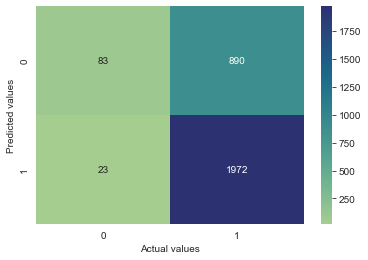

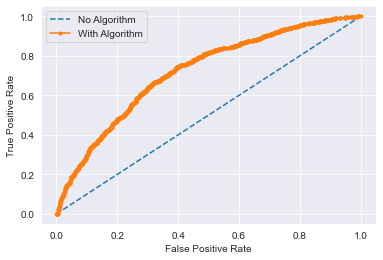

In [525]:
train = lgb.Dataset(X_train, label=y_train)
val = lgb.Dataset(X_val, label=y_val)
lgbm_ec1 = lgb.train(best_params, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)
# lgbm = LGBMClassifier(**best_params, random_state=2, objective='binary')
# lgbm.fit(X_train, y_train)

evaluate_lgbm(lgbm_ec1)

## XGBoost

In [54]:
import xgboost as xgb

In [531]:
def objective(trial):
    # Define the search space for XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 8.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 8.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 1.5),  
    }

    # Train and evaluate the XGBoost model
    model = xgb.XGBClassifier(**params, random_state=5)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    pos_probs = model.predict_proba(X_val)[:, 1]
    roc_score = roc_auc_score(y_val, pos_probs)
#     acc_score = accuracy_score(y_val, y_hat)
#     score = hamming_loss(y_val, y_hat)
#     report_dict = classification_report(y_val, y_hat, output_dict=True)
#     f1_score = report_dict['0']['f1-score']

    return roc_score

In [532]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-06 21:01:03,168] A new study created in memory with name: no-name-129b2f28-3b3e-4191-b225-e2a78f02c729
[I 2023-07-06 21:01:04,166] Trial 0 finished with value: 0.7111586777838739 and parameters: {'max_depth': 7, 'learning_rate': 0.025141211576642786, 'subsample': 0.6639211004162353, 'colsample_bytree': 0.5410468825278043, 'lambda': 1.1050594071924099e-08, 'alpha': 0.00035925696121470767, 'scale_pos_weight': 1.179745051395766}. Best is trial 0 with value: 0.7111586777838739.
[I 2023-07-06 21:01:04,899] Trial 1 finished with value: 0.7140204055874527 and parameters: {'max_depth': 5, 'learning_rate': 0.010823888217797688, 'subsample': 0.7037235310753499, 'colsample_bytree': 0.6631831051656114, 'lambda': 0.0013827351965873924, 'alpha': 0.00022596573427098593, 'scale_pos_weight': 1.0832057250218108}. Best is trial 1 with value: 0.7140204055874527.
[I 2023-07-06 21:01:05,297] Trial 2 finished with value: 0.7128195617512434 and parameters: {'max_depth': 3, 'learning_rate': 0.034105

[I 2023-07-06 21:01:20,078] Trial 22 finished with value: 0.7142764413603381 and parameters: {'max_depth': 5, 'learning_rate': 0.010201876249538071, 'subsample': 0.837349276094868, 'colsample_bytree': 0.5700498484726002, 'lambda': 2.960351257938472e-07, 'alpha': 3.3036368663865042e-06, 'scale_pos_weight': 1.0081170980246021}. Best is trial 21 with value: 0.7149173035363331.
[I 2023-07-06 21:01:20,927] Trial 23 finished with value: 0.7133558459354965 and parameters: {'max_depth': 6, 'learning_rate': 0.012887738974553743, 'subsample': 0.8583302798047272, 'colsample_bytree': 0.5649611033808553, 'lambda': 2.0169443267241378e-07, 'alpha': 4.121853140229324e-06, 'scale_pos_weight': 1.0031695809253356}. Best is trial 21 with value: 0.7149173035363331.
[I 2023-07-06 21:01:21,621] Trial 24 finished with value: 0.7139248429398264 and parameters: {'max_depth': 5, 'learning_rate': 0.012954389911429623, 'subsample': 0.798356918343499, 'colsample_bytree': 0.5504312415922711, 'lambda': 5.788674431259

[I 2023-07-06 21:01:40,717] Trial 44 finished with value: 0.7129321247620592 and parameters: {'max_depth': 4, 'learning_rate': 0.011054886944792819, 'subsample': 0.7249727661225049, 'colsample_bytree': 0.5733619325464905, 'lambda': 5.237680571563571e-08, 'alpha': 1.0608357955149e-08, 'scale_pos_weight': 1.0586062944386048}. Best is trial 43 with value: 0.7164076687092861.
[I 2023-07-06 21:01:41,378] Trial 45 finished with value: 0.714449278386099 and parameters: {'max_depth': 5, 'learning_rate': 0.012694481302738104, 'subsample': 0.7743457635434644, 'colsample_bytree': 0.5028298178115234, 'lambda': 3.378614170390384e-08, 'alpha': 6.208262766119402e-08, 'scale_pos_weight': 1.0212118373268817}. Best is trial 43 with value: 0.7164076687092861.
[I 2023-07-06 21:01:41,966] Trial 46 finished with value: 0.7124100075471309 and parameters: {'max_depth': 4, 'learning_rate': 0.010007285199092561, 'subsample': 0.7519988347222227, 'colsample_bytree': 0.596002990991938, 'lambda': 9.023206390638572e

[I 2023-07-06 21:01:56,502] Trial 66 finished with value: 0.7146094939300977 and parameters: {'max_depth': 6, 'learning_rate': 0.013929742350080924, 'subsample': 0.7520781435037419, 'colsample_bytree': 0.5324697424616684, 'lambda': 1.5995544482907434e-07, 'alpha': 3.824968604540635e-08, 'scale_pos_weight': 1.0822553716161978}. Best is trial 43 with value: 0.7164076687092861.
[I 2023-07-06 21:01:57,205] Trial 67 finished with value: 0.7120803035337573 and parameters: {'max_depth': 5, 'learning_rate': 0.010709875469253453, 'subsample': 0.679646202670215, 'colsample_bytree': 0.5526747416867738, 'lambda': 2.0873421204037518e-08, 'alpha': 5.6004476063857194e-08, 'scale_pos_weight': 1.1089043336533904}. Best is trial 43 with value: 0.7164076687092861.
[I 2023-07-06 21:01:57,933] Trial 68 finished with value: 0.7156866987612918 and parameters: {'max_depth': 5, 'learning_rate': 0.01302772143754384, 'subsample': 0.7234755104980342, 'colsample_bytree': 0.6091557117484131, 'lambda': 1.01893236202

[I 2023-07-06 21:02:16,538] Trial 88 finished with value: 0.7155249377297304 and parameters: {'max_depth': 7, 'learning_rate': 0.011287018495629348, 'subsample': 0.7764643561920616, 'colsample_bytree': 0.5469396324208569, 'lambda': 2.908701072901238e-07, 'alpha': 1.962853853537166e-08, 'scale_pos_weight': 1.0591718965207548}. Best is trial 43 with value: 0.7164076687092861.
[I 2023-07-06 21:02:17,584] Trial 89 finished with value: 0.7155903633698841 and parameters: {'max_depth': 7, 'learning_rate': 0.011653224451361412, 'subsample': 0.8219948490524351, 'colsample_bytree': 0.5006182274053456, 'lambda': 4.68115720784745e-08, 'alpha': 1.0090219106481152e-08, 'scale_pos_weight': 1.0591729090789064}. Best is trial 43 with value: 0.7164076687092861.
[I 2023-07-06 21:02:18,562] Trial 90 finished with value: 0.7140940738279409 and parameters: {'max_depth': 7, 'learning_rate': 0.011642689320495532, 'subsample': 0.8228155702518537, 'colsample_bytree': 0.5017634834507997, 'lambda': 1.893046867944

In [533]:
print('the best parameters are: ', best_params)
print(f'The best roc score is: {best_score}')

the best parameters are:  {'max_depth': 5, 'learning_rate': 0.011122370516974192, 'subsample': 0.6991569238679693, 'colsample_bytree': 0.5504269919594043, 'lambda': 4.449433462141528e-08, 'alpha': 1.9575912538644208e-07, 'scale_pos_weight': 1.0251754283561652}
The best roc score is: 0.7164076687092861


Train Accuracy score is: 0.7247683235046335
Test Accuracy score is: 0.7055256064690026
ROC_AUC score is: 0.7164076687092861
              precision    recall  f1-score   support

           0       0.58      0.36      0.45       973
           1       0.74      0.87      0.80      1995

    accuracy                           0.71      2968
   macro avg       0.66      0.62      0.62      2968
weighted avg       0.69      0.71      0.68      2968



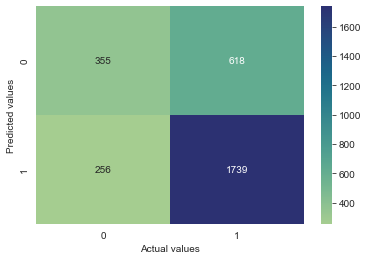

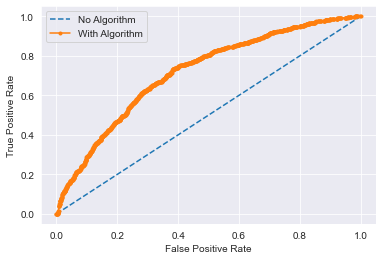

In [534]:
xgb_ec1 = xgb.XGBClassifier(**best_params, random_state=5)
xgb_ec1.fit(X_train, y_train)

evaluate_model(xgb_ec1)

#### Predicting EC1 best model: RFC

In [535]:
y_hat_rfc = rfc_ec1.predict_proba(X_test)[:,1]
y_hat_lgbm = lgbm_ec1.predict(X_test)
y_hat_xgb = xgb_ec1.predict_proba(X_test)[:,1]

In [536]:
pd.DataFrame(zip(y_hat_rfc, y_hat_lgbm, y_hat_xgb))

,0,1,2
0,0.463847,0.560312,0.462172
1,0.784642,0.751989,0.697966
2,0.793919,0.732547,0.702061
3,0.714356,0.693781,0.650629
4,0.796059,0.722278,0.711209
...,...,...,...
9888,0.646736,0.638821,0.628857
9889,0.751578,0.706576,0.694205
9890,0.422986,0.501573,0.450466
9891,0.462800,0.539547,0.466263


In [74]:
pd.read_csv('submissions/rfc_xgb.csv')

,id,EC1,EC2
0,14838,0.411260,0.779646
1,14839,0.742127,0.798292
2,14840,0.720807,0.724718
3,14841,0.646051,0.804617
4,14842,0.768030,0.784914
...,...,...,...
9888,24726,0.614055,0.738371
9889,24727,0.750975,0.811444
9890,24728,0.400226,0.822606
9891,24729,0.426133,0.827851


In [264]:
pd.read_csv('submissions/use_ec1(2).csv')

,id,EC1,EC2
0,14838,0.436758,0.835999
1,14839,0.811926,0.780156
2,14840,0.781455,0.710728
3,14841,0.712642,0.780374
4,14842,0.771032,0.772533
...,...,...,...
9888,24726,0.623808,0.732661
9889,24727,0.747591,0.819741
9890,24728,0.368690,0.864607
9891,24729,0.430987,0.879144


# EC2

In [537]:
X = train_data.drop(['id', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data['EC2']

X_train, X_val, y_train, y_val = split_data(X,y)

X_train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,num_zero
6788,254.583169,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,0.000000,5.749512,...,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0,9
1962,170.977545,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,18.359432,11.949021,...,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1,3
3551,236.164996,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,6.103966,12.356394,...,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0,7
8301,170.034424,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,24.401273,6.420822,...,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1,3
281,83.108030,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,18.359432,0.000000,...,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1,5


## Random Forest

In [538]:
def objective(trial):
    class_weight_0 = trial.suggest_uniform("class_weight_0", 1, 2)
    parameters = {
        'n_estimators':trial.suggest_int('n_estimators', 100, 600, step=100),
        'max_depth':trial.suggest_int('max_depth', 3, 10),
        'min_samples_split':trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features':trial.suggest_int('max_features', 2, 32, step=2),
        'bootstrap':trial.suggest_categorical('bootstrap', [True, False]),
    }
    class_weights = {0:class_weight_0,1:1}
    
    model = RandomForestClassifier(**parameters, class_weight=class_weights, random_state=2)

    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    pos_probs = model.predict_proba(X_val)[:,1]
    roc_score = roc_auc_score(y_val, pos_probs)
#     acc_score = accuracy_score(y_val, y_hat)
#     score = hamming_loss(y_val, y_hat)

    return roc_score

In [540]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=15)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-06 21:06:05,167] A new study created in memory with name: no-name-b2570861-ec2f-45fa-8b31-db82a4b46bc5
[I 2023-07-06 21:06:26,647] Trial 0 finished with value: 0.579481177024787 and parameters: {'class_weight_0': 1.5893967787396792, 'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 28, 'bootstrap': True}. Best is trial 0 with value: 0.579481177024787.
[I 2023-07-06 21:06:29,054] Trial 1 finished with value: 0.57396068193505 and parameters: {'class_weight_0': 1.6922469553519455, 'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 6, 'bootstrap': True}. Best is trial 0 with value: 0.579481177024787.
[I 2023-07-06 21:06:57,679] Trial 2 finished with value: 0.5712234484395395 and parameters: {'class_weight_0': 1.3594434709222531, 'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 24, 'bootstrap': False}. Best is trial 0 with value: 0.

In [541]:
print('the best parameters are: ', best_params)
print(f'The best roc score is: {best_score}')

the best parameters are:  {'class_weight_0': 1.957615685200766, 'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 2, 'bootstrap': False}
The best roc score is: 0.5873875817628043


In [542]:
best_params['class_weight']={0:best_params['class_weight_0'], 1:1}
del best_params['class_weight_0']

Train Accuracy score is: 0.8090985678180287
Test Accuracy score is: 0.8039083557951483
ROC_AUC score is: 0.5836956248134604
              precision    recall  f1-score   support

           0       0.53      0.01      0.03       583
           1       0.81      1.00      0.89      2385

    accuracy                           0.80      2968
   macro avg       0.67      0.51      0.46      2968
weighted avg       0.75      0.80      0.72      2968



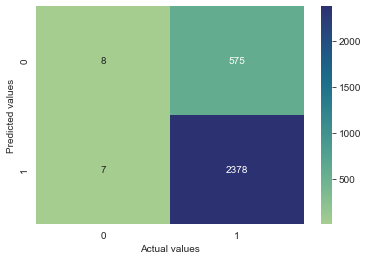

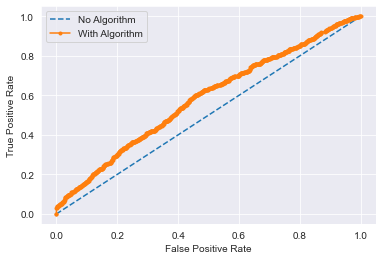

In [543]:
rfc_ec2 = RandomForestClassifier(**best_params, random_state=5)
rfc_ec2.fit(X_train, y_train)

evaluate_model(rfc_ec2)

## LightGBM

In [568]:
def objective(trial):
    parameters = {
        'objective':'binary',
        'num_leaves':trial.suggest_int('num_leaves', 10, 75),
        'learning_rate':trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth':trial.suggest_int('max_depth', 2, 10),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100, step=5),
        'subsample':trial.suggest_float('subsample', 0.5, 1),
        'feature_fraction':trial.suggest_uniform('feature_fraction', 0.5, 1),
        'lambda_l1 ':trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'n_estimators ':trial.suggest_int('n_estimators ', 100, 500, step=100),
        'bagging_fraction ':trial.suggest_uniform('bagging_fraction ', 0.5,1),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'class_weight': trial.suggest_uniform('class_weight', 1.5, 2.5),
    }
    train = lgb.Dataset(X_train, label=y_train)
    val = lgb.Dataset(X_val, label=y_val)
    
    model = lgb.train(parameters, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

    y_hat = model.predict(X_val)
    pred_labels = (y_hat>=0.5).astype(int)
    roc_score = roc_auc_score(y_val, y_hat)
#     report_dict = classification_report(y_val, pred_labels, output_dict=True)
#     f1score = f1_score(y_val, pred_labels, average='macro')
#     acc_score = accuracy_score(y_val, pred_labels)
#     score = hamming_loss(y_val, pred_labels)

    return roc_score

In [569]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-06 21:19:57,119] A new study created in memory with name: no-name-231dd8a6-02bf-4292-b822-d6991138bbde


[LightGBM] [Warning] Unknown parameter: 0.00043572944525895215
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7101770371800527
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5773575405451193 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00043572944525895215
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7101770371800527
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5773575405451193 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:19:57,358] Trial 0 finished with value: 0.5807811112189895 and parameters: {'num_leaves': 36, 'learning_rate': 0.0015940735972827377, 'max_depth': 5, 'min_data_in_leaf': 91, 'subsample': 0.5773575405451193, 'feature_fraction': 0.6482759282854391, 'lambda_l1': 0.00043572944525895215, 'lambda_l2': 0.0025925985835038162, 'n_estimators ': 100, 'bagging_fraction ': 0.7101770371800527, 'bagging_freq': 4, 'class_weight': 1.80394596669953}. Best is trial 0 with value: 0.5807811112189895.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 4.201078442430572e-05
[LightGBM] [Warning] Unknown parameter

[I 2023-07-06 21:19:57,663] Trial 1 finished with value: 0.5793326644875239 and parameters: {'num_leaves': 48, 'learning_rate': 0.005942760133402737, 'max_depth': 10, 'min_data_in_leaf': 41, 'subsample': 0.72989951553733, 'feature_fraction': 0.8930038749338287, 'lambda_l1': 4.201078442430572e-05, 'lambda_l2': 2.2915046116352572e-06, 'n_estimators ': 400, 'bagging_fraction ': 0.6823826846779459, 'bagging_freq': 4, 'class_weight': 2.22962861621927}. Best is trial 0 with value: 0.5807811112189895.
[I 2023-07-06 21:19:57,812] Trial 2 finished with value: 0.5804506438539903 and parameters: {'num_leaves': 23, 'learning_rate': 0.03370940724263021, 'max_depth': 4, 'min_data_in_leaf': 56, 'subsample': 0.9281833187814695, 'feature_fraction': 0.6315718151042051, 'lambda_l1': 0.493147750164987, 'lambda_l2': 2.7666121115928933e-06, 'n_estimators ': 500, 'bagging_fraction ': 0.516066604843791, 'bagging_freq': 4, 'class_weight': 2.4419380241349202}. Best is trial 0 with value: 0.5807811112189895.


[LightGBM] [Warning] Unknown parameter: 0.493147750164987
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.516066604843791
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9281833187814695 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.493147750164987
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.516066604843791
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9281833187814695 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-c

[I 2023-07-06 21:19:58,100] Trial 3 finished with value: 0.5820292638021367 and parameters: {'num_leaves': 59, 'learning_rate': 0.032798543954924285, 'max_depth': 10, 'min_data_in_leaf': 41, 'subsample': 0.7123960296979888, 'feature_fraction': 0.8601041686566193, 'lambda_l1': 0.001980597863980906, 'lambda_l2': 5.372565621816831e-07, 'n_estimators ': 400, 'bagging_fraction ': 0.6348163526911215, 'bagging_freq': 6, 'class_weight': 2.2596854411506238}. Best is trial 3 with value: 0.5820292638021367.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 21:19:58,253] Trial 4 finished with value: 0.5801496632397309 and parameters: {'num_leaves': 25, 'learning_rate': 0.0011125877059248725, 'max_depth': 3, 'min_data_in_leaf': 46, 'subsample': 0.7776797720370887, 'feature_fraction': 0.5314957207923877, 'lambda_l1': 1.3971869870470288e-08, 'lambda_l2': 0.000854889131551173, 'n_estimators ': 300, 'bagging_fraction ': 0.8514687783644113, 'bagging_freq': 8, 'class_weight': 1.9037405545488966}. Best is trial 3 with value: 0.5820292638021367.


[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.8514687783644113
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7776797720370887 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 1.3971869870470288e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.8514687783644113
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagg

[I 2023-07-06 21:19:58,418] Trial 5 finished with value: 0.5792463618024316 and parameters: {'num_leaves': 54, 'learning_rate': 0.004722805482559339, 'max_depth': 3, 'min_data_in_leaf': 21, 'subsample': 0.8305061748805791, 'feature_fraction': 0.6862948843701424, 'lambda_l1': 0.003149029722831345, 'lambda_l2': 4.2612425206603254e-07, 'n_estimators ': 400, 'bagging_fraction ': 0.5127594839809038, 'bagging_freq': 4, 'class_weight': 1.6604307124929576}. Best is trial 3 with value: 0.5820292638021367.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.6072918172140397
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7301548749373987
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7414552923671829 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimato

[I 2023-07-06 21:19:58,809] Trial 6 finished with value: 0.5712957269383044 and parameters: {'num_leaves': 58, 'learning_rate': 0.0010896324650756305, 'max_depth': 7, 'min_data_in_leaf': 46, 'subsample': 0.7414552923671829, 'feature_fraction': 0.8930018155355115, 'lambda_l1': 0.6072918172140397, 'lambda_l2': 1.3809631973239243, 'n_estimators ': 100, 'bagging_fraction ': 0.7301548749373987, 'bagging_freq': 5, 'class_weight': 2.015014229528682}. Best is trial 3 with value: 0.5820292638021367.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 21:19:59,104] Trial 7 finished with value: 0.5813194242172527 and parameters: {'num_leaves': 49, 'learning_rate': 0.013419007026109748, 'max_depth': 7, 'min_data_in_leaf': 11, 'subsample': 0.6514696297326138, 'feature_fraction': 0.6827327599962942, 'lambda_l1': 0.0013630521318704905, 'lambda_l2': 3.806796060545866, 'n_estimators ': 500, 'bagging_fraction ': 0.5795923510282079, 'bagging_freq': 8, 'class_weight': 2.4964616697733053}. Best is trial 3 with value: 0.5820292638021367.


[LightGBM] [Warning] Unknown parameter: 4.528485571483264
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7411197229845596
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6089924444581618 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.528485571483264
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7411197229845596
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6089924444581618 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto

[I 2023-07-06 21:19:59,334] Trial 8 finished with value: 0.5826189988169341 and parameters: {'num_leaves': 30, 'learning_rate': 0.029819949489279227, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.6089924444581618, 'feature_fraction': 0.969792756851597, 'lambda_l1': 4.528485571483264, 'lambda_l2': 1.9884616335038746e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7411197229845596, 'bagging_freq': 5, 'class_weight': 1.6371795168096985}. Best is trial 8 with value: 0.5826189988169341.


[LightGBM] [Warning] Unknown parameter: 3.813693460365999e-06
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.7753735971394103
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5647529033962715 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.813693460365999e-06
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.7753735971394103
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5647529033962715 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:19:59,557] Trial 9 finished with value: 0.5854421754030156 and parameters: {'num_leaves': 42, 'learning_rate': 0.08278639564141337, 'max_depth': 8, 'min_data_in_leaf': 71, 'subsample': 0.5647529033962715, 'feature_fraction': 0.872236968060951, 'lambda_l1': 3.813693460365999e-06, 'lambda_l2': 2.1860590109021745, 'n_estimators ': 500, 'bagging_fraction ': 0.7753735971394103, 'bagging_freq': 8, 'class_weight': 1.6160673503330845}. Best is trial 9 with value: 0.5854421754030156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 6.238878948080768e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9479222232629724
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5029889417507897 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 6.238878948080768e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM

[I 2023-07-06 21:19:59,765] Trial 10 finished with value: 0.5947254675627762 and parameters: {'num_leaves': 10, 'learning_rate': 0.09946658023591227, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.5029889417507897, 'feature_fraction': 0.773140401447919, 'lambda_l1': 6.238878948080768e-07, 'lambda_l2': 0.06533433095816141, 'n_estimators ': 300, 'bagging_fraction ': 0.9479222232629724, 'bagging_freq': 1, 'class_weight': 1.5256699894915262}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 8.126083741272074e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9889097941893626
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5185181489112616 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.126083741272074e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9889097941893626
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5185181489112616 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:00,135] Trial 11 finished with value: 0.5886015728664358 and parameters: {'num_leaves': 10, 'learning_rate': 0.09332366674253786, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.5185181489112616, 'feature_fraction': 0.8115858849488101, 'lambda_l1': 8.126083741272074e-07, 'lambda_l2': 0.09120304385007957, 'n_estimators ': 300, 'bagging_fraction ': 0.9889097941893626, 'bagging_freq': 1, 'class_weight': 1.5028165973980767}. Best is trial 10 with value: 0.5947254675627762.
[I 2023-07-06 21:20:00,354] Trial 12 finished with value: 0.5870118054881316 and parameters: {'num_leaves': 13, 'learning_rate': 0.07614270836544833, 'max_depth': 6, 'min_data_in_leaf': 96, 'subsample': 0.503209246911276, 'feature_fraction': 0.7800373713860302, 'lambda_l1': 2.4406647736390157e-07, 'lambda_l2': 0.05780880393570288, 'n_estimators ': 300, 'bagging_fraction ': 0.9574119677177322, 'bagging_freq': 1, 'class_weight': 1.5414897029817611}. Best is trial 10 with value: 0.5947254675627762

[LightGBM] [Warning] Unknown parameter: 0.9574119677177322
[LightGBM] [Warning] Unknown parameter: 2.4406647736390157e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.503209246911276 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9574119677177322
[LightGBM] [Warning] Unknown parameter: 2.4406647736390157e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.503209246911276 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:00,572] Trial 13 finished with value: 0.5915139288937794 and parameters: {'num_leaves': 10, 'learning_rate': 0.09882631731887774, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.5072286652050221, 'feature_fraction': 0.7786104306547238, 'lambda_l1': 1.0070694132615472e-06, 'lambda_l2': 0.03189570747631298, 'n_estimators ': 200, 'bagging_fraction ': 0.9930583507170285, 'bagging_freq': 1, 'class_weight': 1.5062178673759634}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 1.0070694132615472e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9930583507170285
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5072286652050221 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0070694132615472e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9930583507170285
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5072286652050221 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:00,860] Trial 14 finished with value: 0.5921446576839955 and parameters: {'num_leaves': 19, 'learning_rate': 0.09878979372373585, 'max_depth': 8, 'min_data_in_leaf': 71, 'subsample': 0.6466203882222135, 'feature_fraction': 0.742940991427617, 'lambda_l1': 1.5801279224614155e-08, 'lambda_l2': 0.009105405239384922, 'n_estimators ': 200, 'bagging_fraction ': 0.8907099708407289, 'bagging_freq': 2, 'class_weight': 1.7439418464120666}. Best is trial 10 with value: 0.5947254675627762.



[LightGBM] [Warning] Unknown parameter: 1.0097575259027189e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8952925959397505
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.651098205623531 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0097575259027189e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8952925959397505
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.651098205623531 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warn

[I 2023-07-06 21:20:01,151] Trial 15 finished with value: 0.5817272044043137 and parameters: {'num_leaves': 72, 'learning_rate': 0.04966761322791601, 'max_depth': 7, 'min_data_in_leaf': 66, 'subsample': 0.651098205623531, 'feature_fraction': 0.7304775341105276, 'lambda_l1': 1.0097575259027189e-08, 'lambda_l2': 0.00018627067445572325, 'n_estimators ': 200, 'bagging_fraction ': 0.8952925959397505, 'bagging_freq': 2, 'class_weight': 1.7568266412014593}. Best is trial 10 with value: 0.5947254675627762.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 21:20:01,399] Trial 16 finished with value: 0.5847697336483382 and parameters: {'num_leaves': 24, 'learning_rate': 0.050761950464357976, 'max_depth': 9, 'min_data_in_leaf': 76, 'subsample': 0.635849625570919, 'feature_fraction': 0.7449381826117358, 'lambda_l1': 9.129650020080112e-08, 'lambda_l2': 4.90943106334721e-08, 'n_estimators ': 200, 'bagging_fraction ': 0.893349280031103, 'bagging_freq': 10, 'class_weight': 1.7420103718953248}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 0.893349280031103
[LightGBM] [Warning] Unknown parameter: 9.129650020080112e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.635849625570919 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.893349280031103
[LightGBM] [Warning] Unknown parameter: 9.129650020080112e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.635849625570919 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-06 21:20:01,639] Trial 17 finished with value: 0.5797512325102214 and parameters: {'num_leaves': 19, 'learning_rate': 0.017060974709977823, 'max_depth': 6, 'min_data_in_leaf': 61, 'subsample': 0.5716286317025168, 'feature_fraction': 0.8148598847063063, 'lambda_l1': 6.796908335670945e-08, 'lambda_l2': 0.0036746989082242607, 'n_estimators ': 200, 'bagging_fraction ': 0.8255884410319254, 'bagging_freq': 2, 'class_weight': 1.8714046994801177}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 6.796908335670945e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8255884410319254
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5716286317025168 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.796908335670945e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8255884410319254
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5716286317025168 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:01,905] Trial 18 finished with value: 0.5911841807178226 and parameters: {'num_leaves': 17, 'learning_rate': 0.05731230123323952, 'max_depth': 9, 'min_data_in_leaf': 81, 'subsample': 0.6660091881282941, 'feature_fraction': 0.5865841237719416, 'lambda_l1': 8.687913234501038e-06, 'lambda_l2': 0.0001051047275310357, 'n_estimators ': 200, 'bagging_fraction ': 0.9264883843676743, 'bagging_freq': 2, 'class_weight': 1.6849452742045608}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 8.687913234501038e-06
[LightGBM] [Warning] Unknown parameter: 0.9264883843676743
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6660091881282941 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.687913234501038e-06
[LightGBM] [Warning] Unknown parameter: 0.9264883843676743
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6660091881282941 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:02,155] Trial 19 finished with value: 0.57920752559414 and parameters: {'num_leaves': 32, 'learning_rate': 0.019398750058243947, 'max_depth': 5, 'min_data_in_leaf': 31, 'subsample': 0.5500729805467306, 'feature_fraction': 0.7166777606662993, 'lambda_l1': 7.707148143815923e-08, 'lambda_l2': 0.009884013521200708, 'n_estimators ': 300, 'bagging_fraction ': 0.8235744711061422, 'bagging_freq': 3, 'class_weight': 1.5745063906412102}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 0.8235744711061422
[LightGBM] [Warning] Unknown parameter: 7.707148143815923e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5500729805467306 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.8235744711061422
[LightGBM] [Warning] Unknown parameter: 7.707148143815923e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5500729805467306 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:02,370] Trial 20 finished with value: 0.5856205342855396 and parameters: {'num_leaves': 17, 'learning_rate': 0.05566470601498343, 'max_depth': 2, 'min_data_in_leaf': 56, 'subsample': 0.6015984400100889, 'feature_fraction': 0.7636176313373787, 'lambda_l1': 2.3395750241475673e-05, 'lambda_l2': 0.27096901534662954, 'n_estimators ': 300, 'bagging_fraction ': 0.9408888895452383, 'bagging_freq': 3, 'class_weight': 1.7244416417739308}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 2.3395750241475673e-05
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9408888895452383
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6015984400100889 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.3395750241475673e-05
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9408888895452383
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6015984400100889 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:02,589] Trial 21 finished with value: 0.5878201739718294 and parameters: {'num_leaves': 11, 'learning_rate': 0.09660645629943156, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.5198492024856053, 'feature_fraction': 0.7971063553991686, 'lambda_l1': 1.1720866723284462e-06, 'lambda_l2': 0.047733879852299384, 'n_estimators ': 200, 'bagging_fraction ': 0.9966831510036049, 'bagging_freq': 1, 'class_weight': 1.505493136247955}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 0.9966831510036049
[LightGBM] [Warning] Unknown parameter: 1.1720866723284462e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5198492024856053 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9966831510036049
[LightGBM] [Warning] Unknown parameter: 1.1720866723284462e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5198492024856053 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:02,863] Trial 22 finished with value: 0.587654400897548 and parameters: {'num_leaves': 16, 'learning_rate': 0.09301712690405159, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.5416908722169077, 'feature_fraction': 0.7267459472739755, 'lambda_l1': 5.423759369494527e-07, 'lambda_l2': 0.012849063963009999, 'n_estimators ': 200, 'bagging_fraction ': 0.9975733445445136, 'bagging_freq': 1, 'class_weight': 1.5800398216458496}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 5.423759369494527e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9975733445445136
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5416908722169077 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.423759369494527e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9975733445445136
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5416908722169077 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:03,171] Trial 23 finished with value: 0.5857636529049843 and parameters: {'num_leaves': 20, 'learning_rate': 0.0640221515192694, 'max_depth': 7, 'min_data_in_leaf': 71, 'subsample': 0.5097965754416475, 'feature_fraction': 0.7633492293564813, 'lambda_l1': 2.1652360731480033e-06, 'lambda_l2': 0.6036893230946148, 'n_estimators ': 100, 'bagging_fraction ': 0.9084387649382084, 'bagging_freq': 2, 'class_weight': 1.6122667117229166}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 2.1652360731480033e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9084387649382084
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5097965754416475 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.1652360731480033e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9084387649382084
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5097965754416475 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:03,434] Trial 24 finished with value: 0.5936682596703957 and parameters: {'num_leaves': 10, 'learning_rate': 0.09921302787837664, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.5016383124413819, 'feature_fraction': 0.8281240268081762, 'lambda_l1': 2.0133018655059037e-07, 'lambda_l2': 0.16381932033029806, 'n_estimators ': 200, 'bagging_fraction ': 0.9548074105165851, 'bagging_freq': 3, 'class_weight': 1.5160203502759526}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 2.0133018655059037e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9548074105165851
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5016383124413819 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.0133018655059037e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9548074105165851
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5016383124413819 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:03,722] Trial 25 finished with value: 0.5889604481986113 and parameters: {'num_leaves': 28, 'learning_rate': 0.04170590800121705, 'max_depth': 10, 'min_data_in_leaf': 86, 'subsample': 0.6049159765876801, 'feature_fraction': 0.8486476443231008, 'lambda_l1': 3.542945476189878e-08, 'lambda_l2': 8.421876211706197, 'n_estimators ': 400, 'bagging_fraction ': 0.8801570070196013, 'bagging_freq': 3, 'class_weight': 1.6661292266711165}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 0.8801570070196013
[LightGBM] [Warning] Unknown parameter: 3.542945476189878e-08
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6049159765876801 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.8801570070196013
[LightGBM] [Warning] Unknown parameter: 3.542945476189878e-08
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6049159765876801 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:04,018] Trial 26 finished with value: 0.5860556436562133 and parameters: {'num_leaves': 34, 'learning_rate': 0.07141439079700265, 'max_depth': 9, 'min_data_in_leaf': 71, 'subsample': 0.5523781048411324, 'feature_fraction': 0.828387542044693, 'lambda_l1': 2.0424862402088678e-07, 'lambda_l2': 0.21356277311915195, 'n_estimators ': 300, 'bagging_fraction ': 0.9554331149621278, 'bagging_freq': 3, 'class_weight': 1.6003271607906764}. Best is trial 10 with value: 0.5947254675627762.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.9362576697878914
[LightGBM] [Warning] Unknown parameter: 1.1197966954708232e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6019655112721705 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9362576697878914
[LightGBM] [Warning] Unknown parameter: 1.1197966954708232e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6019655112721705 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGB

[I 2023-07-06 21:20:04,328] Trial 27 finished with value: 0.5846622148864941 and parameters: {'num_leaves': 39, 'learning_rate': 0.04181002241121573, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.6019655112721705, 'feature_fraction': 0.9346819413222274, 'lambda_l1': 1.1197966954708232e-08, 'lambda_l2': 0.4884145933829047, 'n_estimators ': 200, 'bagging_fraction ': 0.9362576697878914, 'bagging_freq': 6, 'class_weight': 1.6983930783944337}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 21:20:04,554] Trial 28 finished with value: 0.5845061508642855 and parameters: {'num_leaves': 14, 'learning_rate': 0.06574658605641123, 'max_depth': 10, 'min_data_in_leaf': 61, 'subsample': 0.6760379129473177, 'feature_fraction': 0.8292433158904624, 'lambda_l1': 2.1702435752996342e-07, 'lambda_l2': 0.0012144361598038485, 'n_estimators ': 100, 'bagging_fraction ': 0.8681225500422196, 'bagging_freq': 2, 'class_weight': 1.5530726350459796}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8681225500422196
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6760379129473177 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.1702435752996342e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8681225500422196
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6760379129473177 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of t

[I 2023-07-06 21:20:04,946] Trial 29 finished with value: 0.5842461640254449 and parameters: {'num_leaves': 21, 'learning_rate': 0.025590476144208098, 'max_depth': 6, 'min_data_in_leaf': 91, 'subsample': 0.5713000822284544, 'feature_fraction': 0.793941546286632, 'lambda_l1': 4.2132307295187215e-08, 'lambda_l2': 0.006173802264679655, 'n_estimators ': 100, 'bagging_fraction ': 0.9156890701233263, 'bagging_freq': 3, 'class_weight': 1.830989389340307}. Best is trial 10 with value: 0.5947254675627762.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-06 21:20:05,184] Trial 30 finished with value: 0.5787112851548594 and parameters: {'num_leaves': 26, 'learning_rate': 0.042892858727712806, 'max_depth': 5, 'min_data_in_leaf': 76, 'subsample': 0.539248880548456, 'feature_fraction': 0.7019004483228598, 'lambda_l1': 3.7120310640748037e-07, 'lambda_l2': 0.001277738573257623, 'n_estimators ': 200, 'bagging_fraction ': 0.9620247657728456, 'bagging_freq': 2, 'class_weight': 1.8033416847511652}. Best is trial 10 with value: 0.5947254675627762.


[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9620247657728456
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.539248880548456 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.7120310640748037e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9620247657728456
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.539248880548456 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of tes

[I 2023-07-06 21:20:05,405] Trial 31 finished with value: 0.5971005893754202 and parameters: {'num_leaves': 11, 'learning_rate': 0.07254589233113024, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.5080183944384076, 'feature_fraction': 0.7610016820016687, 'lambda_l1': 1.8384879329103837e-06, 'lambda_l2': 0.022525683661923517, 'n_estimators ': 200, 'bagging_fraction ': 0.9727731915928619, 'bagging_freq': 1, 'class_weight': 1.5203702804032209}. Best is trial 31 with value: 0.5971005893754202.


[LightGBM] [Warning] Unknown parameter: 1.8384879329103837e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9727731915928619
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5080183944384076 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.8384879329103837e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9727731915928619
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5080183944384076 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:05,623] Trial 32 finished with value: 0.5993430208097349 and parameters: {'num_leaves': 14, 'learning_rate': 0.06968043038103305, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.5043679574119728, 'feature_fraction': 0.7531793948988189, 'lambda_l1': 5.2446490036237395e-06, 'lambda_l2': 0.026064273064169773, 'n_estimators ': 200, 'bagging_fraction ': 0.9207081209662086, 'bagging_freq': 1, 'class_weight': 1.568032951837444}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 5.2446490036237395e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9207081209662086
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5043679574119728 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.2446490036237395e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9207081209662086
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5043679574119728 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:05,842] Trial 33 finished with value: 0.5936664616977896 and parameters: {'num_leaves': 14, 'learning_rate': 0.06781608643402977, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.5034863040990694, 'feature_fraction': 0.7638225183828723, 'lambda_l1': 8.592054398694284e-06, 'lambda_l2': 0.12945679845247235, 'n_estimators ': 300, 'bagging_fraction ': 0.961464346849698, 'bagging_freq': 1, 'class_weight': 1.576336728988604}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 8.592054398694284e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.961464346849698
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5034863040990694 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.592054398694284e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.961464346849698
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5034863040990694 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-06 21:20:06,127] Trial 34 finished with value: 0.5935251410509509 and parameters: {'num_leaves': 14, 'learning_rate': 0.06944297850567277, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.5424456592045832, 'feature_fraction': 0.8474182070544735, 'lambda_l1': 8.054902242231579e-05, 'lambda_l2': 0.017862136242089956, 'n_estimators ': 400, 'bagging_fraction ': 0.9248053336695896, 'bagging_freq': 4, 'class_weight': 1.5025010646857455}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 8.054902242231579e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.9248053336695896
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5424456592045832 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.054902242231579e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.9248053336695896
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5424456592045832 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:06,370] Trial 35 finished with value: 0.5905919285413768 and parameters: {'num_leaves': 22, 'learning_rate': 0.03667819376798614, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.5891045865217722, 'feature_fraction': 0.6592622314855916, 'lambda_l1': 3.074300544240013e-06, 'lambda_l2': 0.03525861089262918, 'n_estimators ': 100, 'bagging_fraction ': 0.8568094077817461, 'bagging_freq': 1, 'class_weight': 1.6344310441778078}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 3.074300544240013e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8568094077817461
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5891045865217722 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.074300544240013e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8568094077817461
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5891045865217722 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:06,871] Trial 36 finished with value: 0.5744389426482698 and parameters: {'num_leaves': 72, 'learning_rate': 0.05003736829559594, 'max_depth': 8, 'min_data_in_leaf': 1, 'subsample': 0.5336889290697625, 'feature_fraction': 0.7967366074447583, 'lambda_l1': 0.00019085142306942402, 'lambda_l2': 0.7907991027680654, 'n_estimators ': 300, 'bagging_fraction ': 0.9699307188181491, 'bagging_freq': 4, 'class_weight': 1.5559972038267598}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 21:20:07,097] Trial 37 finished with value: 0.5859362582751689 and parameters: {'num_leaves': 10, 'learning_rate': 0.025279036939465902, 'max_depth': 10, 'min_data_in_leaf': 76, 'subsample': 0.5735242159317988, 'feature_fraction': 0.7062506632858435, 'lambda_l1': 1.5650517625877044e-05, 'lambda_l2': 0.20529611321825236, 'n_estimators ': 200, 'bagging_fraction ': 0.9741425840385508, 'bagging_freq': 1, 'class_weight': 1.6531558985376131}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.5650517625877044e-05
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9741425840385508
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5735242159317988 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.5650517625877044e-05
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9741425840385508
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5735242159317988 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:07,327] Trial 38 finished with value: 0.5851271706024287 and parameters: {'num_leaves': 66, 'learning_rate': 0.07623108223040811, 'max_depth': 4, 'min_data_in_leaf': 91, 'subsample': 0.5287670919189233, 'feature_fraction': 0.8836693054552257, 'lambda_l1': 4.761839619037189e-06, 'lambda_l2': 0.0026442932064142857, 'n_estimators ': 400, 'bagging_fraction ': 0.9358789583152416, 'bagging_freq': 7, 'class_weight': 1.9391227247832514}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 4.761839619037189e-06
[LightGBM] [Warning] Unknown parameter: 0.9358789583152416
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5287670919189233 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.761839619037189e-06
[LightGBM] [Warning] Unknown parameter: 0.9358789583152416
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5287670919189233 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[LightGBM] [Warning] Unknown parameter: 4.9127192899606674e-05
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.91759887876368
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6224455991716246 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.9127192899606674e-05
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.91759887876368
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6224455991716246 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-06 21:20:07,705] Trial 39 finished with value: 0.5778860157286644 and parameters: {'num_leaves': 46, 'learning_rate': 0.007847435336781144, 'max_depth': 7, 'min_data_in_leaf': 36, 'subsample': 0.6224455991716246, 'feature_fraction': 0.906497351504071, 'lambda_l1': 4.9127192899606674e-05, 'lambda_l2': 0.09530691201239377, 'n_estimators ': 300, 'bagging_fraction ': 0.91759887876368, 'bagging_freq': 5, 'class_weight': 1.68247372772393}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 1.6074400981705476e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8338661619782107
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5796136140652173 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.6074400981705476e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8338661619782107
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5796136140652173 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM

[I 2023-07-06 21:20:08,072] Trial 40 finished with value: 0.5828279232337616 and parameters: {'num_leaves': 25, 'learning_rate': 0.03580312698711922, 'max_depth': 6, 'min_data_in_leaf': 51, 'subsample': 0.5796136140652173, 'feature_fraction': 0.6807032415160064, 'lambda_l1': 1.6074400981705476e-06, 'lambda_l2': 2.082189316624822, 'n_estimators ': 100, 'bagging_fraction ': 0.8338661619782107, 'bagging_freq': 10, 'class_weight': 1.613942116052204}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 21:20:08,369] Trial 41 finished with value: 0.5935941831990248 and parameters: {'num_leaves': 14, 'learning_rate': 0.06445387396071038, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.5014048888625344, 'feature_fraction': 0.758954849525667, 'lambda_l1': 7.383570945465773e-06, 'lambda_l2': 0.16414627709746282, 'n_estimators ': 300, 'bagging_fraction ': 0.9518213549066299, 'bagging_freq': 1, 'class_weight': 1.5511196248266144}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 7.383570945465773e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9518213549066299
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5014048888625344 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.383570945465773e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9518213549066299
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5014048888625344 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:08,681] Trial 42 finished with value: 0.591120532487567 and parameters: {'num_leaves': 15, 'learning_rate': 0.07756528964537047, 'max_depth': 7, 'min_data_in_leaf': 81, 'subsample': 0.5001450362137714, 'feature_fraction': 0.7444004625281267, 'lambda_l1': 1.5483038967293714e-05, 'lambda_l2': 0.023338735295047014, 'n_estimators ': 300, 'bagging_fraction ': 0.9715646141268444, 'bagging_freq': 2, 'class_weight': 1.5800098829621063}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 3.244925050362163e-06
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.9463157497148835
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5279712959551259 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.244925050362163e-06
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.9463157497148835
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5279712959551259 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n

[I 2023-07-06 21:20:09,074] Trial 43 finished with value: 0.5912578975946723 and parameters: {'num_leaves': 12, 'learning_rate': 0.05586791999737433, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.5279712959551259, 'feature_fraction': 0.7789307568210533, 'lambda_l1': 3.244925050362163e-06, 'lambda_l2': 0.07695012180859363, 'n_estimators ': 400, 'bagging_fraction ': 0.9463157497148835, 'bagging_freq': 1, 'class_weight': 1.54270491370619}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 7.429626667969065e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9739368700183959
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5571959466704937 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.429626667969065e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9739368700183959
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5571959466704937 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:09,426] Trial 44 finished with value: 0.5956906192577249 and parameters: {'num_leaves': 17, 'learning_rate': 0.08002226395048585, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.5571959466704937, 'feature_fraction': 0.8244222202467276, 'lambda_l1': 7.429626667969065e-07, 'lambda_l2': 1.1087498067845694, 'n_estimators ': 200, 'bagging_fraction ': 0.9739368700183959, 'bagging_freq': 1, 'class_weight': 1.6335397704444579}. Best is trial 32 with value: 0.5993430208097349.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.9832292086196036
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 6.010185989669673e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5593443367199343 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9832292086196036
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 6.010185989669673e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] bag

[I 2023-07-06 21:20:09,738] Trial 45 finished with value: 0.5930292602061915 and parameters: {'num_leaves': 18, 'learning_rate': 0.08734924930972678, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.5593443367199343, 'feature_fraction': 0.8504103685145545, 'lambda_l1': 6.010185989669673e-07, 'lambda_l2': 1.2495378521855522, 'n_estimators ': 200, 'bagging_fraction ': 0.9832292086196036, 'bagging_freq': 3, 'class_weight': 1.639085705898175}. Best is trial 32 with value: 0.5993430208097349.
[I 2023-07-06 21:20:09,972] Trial 46 finished with value: 0.5857607761488146 and parameters: {'num_leaves': 10, 'learning_rate': 0.07725075336630335, 'max_depth': 10, 'min_data_in_leaf': 76, 'subsample': 0.5280030437536578, 'feature_fraction': 0.8145116367984991, 'lambda_l1': 1.633382245920417e-07, 'lambda_l2': 0.46353681846581307, 'n_estimators ': 200, 'bagging_fraction ': 0.9076364439706126, 'bagging_freq': 2, 'class_weight': 1.5275409888951927}. Best is trial 32 with value: 0.5993430208097349.

[LightGBM] [Warning] Unknown parameter: 1.633382245920417e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9076364439706126
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5280030437536578 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.633382245920417e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9076364439706126
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5280030437536578 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:10,248] Trial 47 finished with value: 0.5913801597318864 and parameters: {'num_leaves': 22, 'learning_rate': 0.09894570398375709, 'max_depth': 9, 'min_data_in_leaf': 66, 'subsample': 0.5556842464799993, 'feature_fraction': 0.8716253877158251, 'lambda_l1': 6.520691165679946e-07, 'lambda_l2': 8.559345757671883, 'n_estimators ': 200, 'bagging_fraction ': 0.8797820008339441, 'bagging_freq': 1, 'class_weight': 1.5021441300604579}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 6.520691165679946e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8797820008339441
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5556842464799993 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.520691165679946e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8797820008339441
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5556842464799993 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:10,733] Trial 48 finished with value: 0.5852692104383097 and parameters: {'num_leaves': 52, 'learning_rate': 0.04439034793777366, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.5840558225313507, 'feature_fraction': 0.8356425527481899, 'lambda_l1': 1.753314542571573e-06, 'lambda_l2': 2.6340689102716803, 'n_estimators ': 100, 'bagging_fraction ': 0.9982970014210899, 'bagging_freq': 2, 'class_weight': 1.6107532259488029}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 3.633254496901842e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9736548820287416
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5215427899087884 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.633254496901842e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9736548820287416
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5215427899087884 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n

[I 2023-07-06 21:20:11,027] Trial 49 finished with value: 0.5899906865019005 and parameters: {'num_leaves': 28, 'learning_rate': 0.05585453155501348, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.5215427899087884, 'feature_fraction': 0.7922169168204231, 'lambda_l1': 3.633254496901842e-07, 'lambda_l2': 0.006078388485690046, 'n_estimators ': 200, 'bagging_fraction ': 0.9736548820287416, 'bagging_freq': 4, 'class_weight': 1.7102521328105087}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 21:20:11,295] Trial 50 finished with value: 0.5909187999611638 and parameters: {'num_leaves': 12, 'learning_rate': 0.08494994595089807, 'max_depth': 9, 'min_data_in_leaf': 66, 'subsample': 0.5525077838932198, 'feature_fraction': 0.726061101286877, 'lambda_l1': 1.122190037978147e-06, 'lambda_l2': 0.04477549940317822, 'n_estimators ': 200, 'bagging_fraction ': 0.9415028580851843, 'bagging_freq': 1, 'class_weight': 1.654659014775133}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9415028580851843
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5525077838932198 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.122190037978147e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9415028580851843
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5525077838932198 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of te

[I 2023-07-06 21:20:11,526] Trial 51 finished with value: 0.5874724460698117 and parameters: {'num_leaves': 15, 'learning_rate': 0.06639246774539702, 'max_depth': 6, 'min_data_in_leaf': 86, 'subsample': 0.5019642476855879, 'feature_fraction': 0.7508223373608885, 'lambda_l1': 7.585924598585368e-06, 'lambda_l2': 0.10109948662393452, 'n_estimators ': 300, 'bagging_fraction ': 0.9606162971541352, 'bagging_freq': 1, 'class_weight': 1.5710777051574254}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 7.585924598585368e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9606162971541352
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5019642476855879 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.585924598585368e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9606162971541352
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5019642476855879 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:11,777] Trial 52 finished with value: 0.5864936297830566 and parameters: {'num_leaves': 18, 'learning_rate': 0.06060328841741029, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.5162475826273945, 'feature_fraction': 0.771302286157835, 'lambda_l1': 2.8143998071657935e-06, 'lambda_l2': 0.3287614795016596, 'n_estimators ': 300, 'bagging_fraction ': 0.9800030576694171, 'bagging_freq': 1, 'class_weight': 1.5902644814779987}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 0.9800030576694171
[LightGBM] [Warning] Unknown parameter: 2.8143998071657935e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5162475826273945 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9800030576694171
[LightGBM] [Warning] Unknown parameter: 2.8143998071657935e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5162475826273945 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:12,048] Trial 53 finished with value: 0.5963662973630934 and parameters: {'num_leaves': 13, 'learning_rate': 0.07830763761807139, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.5301525747575287, 'feature_fraction': 0.809336094706286, 'lambda_l1': 1.28391125087141e-07, 'lambda_l2': 1.1515557923076551, 'n_estimators ': 200, 'bagging_fraction ': 0.9309418338307066, 'bagging_freq': 2, 'class_weight': 1.5398739934729222}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.28391125087141e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9309418338307066
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5301525747575287 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.28391125087141e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9309418338307066
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5301525747575287 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-06 21:20:12,274] Trial 54 finished with value: 0.5917440693873588 and parameters: {'num_leaves': 10, 'learning_rate': 0.08264833456386607, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.5418469094383205, 'feature_fraction': 0.810790292867182, 'lambda_l1': 7.31926756855204e-08, 'lambda_l2': 1.1642335716116328, 'n_estimators ': 200, 'bagging_fraction ': 0.9007778788913834, 'bagging_freq': 2, 'class_weight': 1.525699428807609}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 7.31926756855204e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9007778788913834
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5418469094383205 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.31926756855204e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9007778788913834
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5418469094383205 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-06 21:20:12,581] Trial 55 finished with value: 0.592307194407586 and parameters: {'num_leaves': 17, 'learning_rate': 0.04879582443096091, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.5639665941760599, 'feature_fraction': 0.7803266518195979, 'lambda_l1': 1.6341453521245465e-07, 'lambda_l2': 4.528697842985249, 'n_estimators ': 200, 'bagging_fraction ': 0.9258110150363984, 'bagging_freq': 2, 'class_weight': 1.5378354810394979}. Best is trial 32 with value: 0.5993430208097349.
[I 2023-07-06 21:20:12,844] Trial 56 finished with value: 0.5874465552642839 and parameters: {'num_leaves': 12, 'learning_rate': 0.08331562448041682, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.5243091830203097, 'feature_fraction': 0.8223036901155746, 'lambda_l1': 2.8932240814038576e-08, 'lambda_l2': 0.9226405892199508, 'n_estimators ': 200, 'bagging_fraction ': 0.9433253450391421, 'bagging_freq': 3, 'class_weight': 1.6299411792402207}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 2.8932240814038576e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9433253450391421
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5243091830203097 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.8932240814038576e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9433253450391421
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5243091830203097 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:13,099] Trial 57 finished with value: 0.5877860124923137 and parameters: {'num_leaves': 20, 'learning_rate': 0.09369820570886807, 'max_depth': 10, 'min_data_in_leaf': 81, 'subsample': 0.6228630579934223, 'feature_fraction': 0.805635028338316, 'lambda_l1': 1.0736592725950132e-07, 'lambda_l2': 0.01976307733494973, 'n_estimators ': 500, 'bagging_fraction ': 0.9996308064692956, 'bagging_freq': 9, 'class_weight': 1.6908427122504321}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 0.9996308064692956
[LightGBM] [Warning] Unknown parameter: 1.0736592725950132e-07
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6228630579934223 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9996308064692956
[LightGBM] [Warning] Unknown parameter: 1.0736592725950132e-07
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6228630579934223 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:13,387] Trial 58 finished with value: 0.5845201750506129 and parameters: {'num_leaves': 16, 'learning_rate': 0.09947326761662016, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.5204135644600606, 'feature_fraction': 0.7391468457675809, 'lambda_l1': 4.5099700009215266e-07, 'lambda_l2': 0.2979839916626822, 'n_estimators ': 200, 'bagging_fraction ': 0.8916434654191623, 'bagging_freq': 2, 'class_weight': 1.5036847816460006}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 4.5099700009215266e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8916434654191623
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5204135644600606 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.5099700009215266e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8916434654191623
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5204135644600606 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:13,665] Trial 59 finished with value: 0.583624065503738 and parameters: {'num_leaves': 23, 'learning_rate': 0.05423314041139673, 'max_depth': 9, 'min_data_in_leaf': 76, 'subsample': 0.5919438468667322, 'feature_fraction': 0.8631592281028402, 'lambda_l1': 3.131750728801343e-07, 'lambda_l2': 0.05209914255741035, 'n_estimators ': 200, 'bagging_fraction ': 0.9817582489621213, 'bagging_freq': 1, 'class_weight': 1.6018210796503358}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 3.131750728801343e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9817582489621213
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5919438468667322 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.131750728801343e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9817582489621213
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5919438468667322 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:13,896] Trial 60 finished with value: 0.593606049818225 and parameters: {'num_leaves': 12, 'learning_rate': 0.07506379929284032, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.561146184638199, 'feature_fraction': 0.8388962825846832, 'lambda_l1': 1.0443595187991476e-06, 'lambda_l2': 4.065269907565965, 'n_estimators ': 100, 'bagging_fraction ': 0.9149816942001021, 'bagging_freq': 2, 'class_weight': 1.5446101808469006}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.0443595187991476e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9149816942001021
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.561146184638199 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0443595187991476e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9149816942001021
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.561146184638199 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:14,143] Trial 61 finished with value: 0.5932967985299775 and parameters: {'num_leaves': 13, 'learning_rate': 0.0631407031050201, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.5032495515928586, 'feature_fraction': 0.7663974062214381, 'lambda_l1': 8.750679372443141e-07, 'lambda_l2': 0.1103824947373322, 'n_estimators ': 300, 'bagging_fraction ': 0.9568236242923142, 'bagging_freq': 1, 'class_weight': 1.5773996903419176}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 0.9568236242923142
[LightGBM] [Warning] Unknown parameter: 8.750679372443141e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5032495515928586 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9568236242923142
[LightGBM] [Warning] Unknown parameter: 8.750679372443141e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5032495515928586 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:14,379] Trial 62 finished with value: 0.5873473071764279 and parameters: {'num_leaves': 15, 'learning_rate': 0.06920527570264216, 'max_depth': 7, 'min_data_in_leaf': 81, 'subsample': 0.5388148547902512, 'feature_fraction': 0.7823568342198455, 'lambda_l1': 4.6572534944683045e-06, 'lambda_l2': 0.1576242583863818, 'n_estimators ': 300, 'bagging_fraction ': 0.9320891625593974, 'bagging_freq': 1, 'class_weight': 1.5719707488044226}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 4.6572534944683045e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9320891625593974
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5388148547902512 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.6572534944683045e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.9320891625593974
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5388148547902512 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:14,633] Trial 63 finished with value: 0.5948491680780752 and parameters: {'num_leaves': 20, 'learning_rate': 0.08277979597879088, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.5150144830745458, 'feature_fraction': 0.7577318473179905, 'lambda_l1': 1.7332266409511166e-06, 'lambda_l2': 0.5483508388105214, 'n_estimators ': 200, 'bagging_fraction ': 0.9569157745440577, 'bagging_freq': 1, 'class_weight': 1.6582214806890143}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.7332266409511166e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9569157745440577
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5150144830745458 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.7332266409511166e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9569157745440577
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5150144830745458 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:14,874] Trial 64 finished with value: 0.5898971919263838 and parameters: {'num_leaves': 19, 'learning_rate': 0.08469084372979357, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.5162627129647563, 'feature_fraction': 0.8048497339189618, 'lambda_l1': 1.3309707084650716e-07, 'lambda_l2': 0.5493632925008548, 'n_estimators ': 200, 'bagging_fraction ': 0.9501451962477844, 'bagging_freq': 2, 'class_weight': 1.656537043100061}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.3309707084650716e-07
[LightGBM] [Warning] Unknown parameter: 0.9501451962477844
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5162627129647563 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.3309707084650716e-07
[LightGBM] [Warning] Unknown parameter: 0.9501451962477844
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5162627129647563 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:15,098] Trial 65 finished with value: 0.5922928106267373 and parameters: {'num_leaves': 10, 'learning_rate': 0.09993458061624824, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.5476193403945165, 'feature_fraction': 0.7461628429361569, 'lambda_l1': 3.134153561148445e-07, 'lambda_l2': 1.9019391286180767, 'n_estimators ': 200, 'bagging_fraction ': 0.9082710452843002, 'bagging_freq': 1, 'class_weight': 1.7198971119898077}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 0.9082710452843002
[LightGBM] [Warning] Unknown parameter: 3.134153561148445e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5476193403945165 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9082710452843002
[LightGBM] [Warning] Unknown parameter: 3.134153561148445e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5476193403945165 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:15,416] Trial 66 finished with value: 0.5832695053058171 and parameters: {'num_leaves': 37, 'learning_rate': 0.04659832179934765, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.5344098730428697, 'feature_fraction': 0.8238182552200721, 'lambda_l1': 1.7996204250852792e-06, 'lambda_l2': 0.6301821293107008, 'n_estimators ': 200, 'bagging_fraction ': 0.9857249656778524, 'bagging_freq': 3, 'class_weight': 1.5283658911580849}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 4.1526386842884234e-08
[LightGBM] [Warning] Unknown parameter: 0.9284059230157216
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.568667709012216 will be ignored. Current value:

[I 2023-07-06 21:20:15,691] Trial 67 finished with value: 0.5954432182271271 and parameters: {'num_leaves': 17, 'learning_rate': 0.058390151302259434, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.568667709012216, 'feature_fraction': 0.78836323425368, 'lambda_l1': 4.1526386842884234e-08, 'lambda_l2': 0.051676736749389725, 'n_estimators ': 200, 'bagging_fraction ': 0.9284059230157216, 'bagging_freq': 1, 'class_weight': 1.6145711326576646}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 4.9765392718194017e-08
[LightGBM] [Warning] Unknown parameter: 0.9252851289004523
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5669646641586942 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.9765392718194017e-08
[LightGBM] [Warning] Unknown parameter: 0.9252851289004523
[LightGBM] [Warning] Unknown parameter: 100
[

[I 2023-07-06 21:20:15,953] Trial 68 finished with value: 0.5851775138353992 and parameters: {'num_leaves': 27, 'learning_rate': 0.05691187894939975, 'max_depth': 9, 'min_data_in_leaf': 81, 'subsample': 0.5669646641586942, 'feature_fraction': 0.7255368169509475, 'lambda_l1': 4.9765392718194017e-08, 'lambda_l2': 0.034628740234171666, 'n_estimators ': 100, 'bagging_fraction ': 0.9252851289004523, 'bagging_freq': 1, 'class_weight': 1.6187347936978698}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 4.9765392718194017e-08
[LightGBM] [Warning] Unknown parameter: 0.9252851289004523
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5669646641586942 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.797810 -> initscore=1.372660
[LightGBM] [Info] Start training from score 1.372660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[I 2023-07-06 21:20:16,214] Trial 69 finished with value: 0.5862544994264467 and parameters: {'num_leaves': 21, 'learning_rate': 0.03957387082984463, 'max_depth': 8, 'min_data_in_leaf': 71, 'subsample': 0.5825006428639008, 'feature_fraction': 0.7894956110296456, 'lambda_l1': 2.538111488291192e-08, 'lambda_l2': 0.011183308904578165, 'n_estimators ': 200, 'bagging_fraction ': 0.8768236359529847, 'bagging_freq': 1, 'class_weight': 1.6673332071411113}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 2.538111488291192e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8768236359529847
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5825006428639008 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.538111488291192e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8768236359529847
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5825006428639008 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:16,511] Trial 70 finished with value: 0.5848416525525817 and parameters: {'num_leaves': 31, 'learning_rate': 0.030773627422357876, 'max_depth': 10, 'min_data_in_leaf': 91, 'subsample': 0.5470687370224443, 'feature_fraction': 0.766205252190932, 'lambda_l1': 1.870000734865761e-08, 'lambda_l2': 0.06130837283580578, 'n_estimators ': 200, 'bagging_fraction ': 0.9348395265772934, 'bagging_freq': 6, 'class_weight': 1.768869712664257}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.870000734865761e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9348395265772934
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5470687370224443 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 1.870000734865761e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9348395265772934
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5470687370224443 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be

[I 2023-07-06 21:20:16,744] Trial 71 finished with value: 0.5916343930583874 and parameters: {'num_leaves': 17, 'learning_rate': 0.07474737825599902, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.5226780568036253, 'feature_fraction': 0.7990470719390245, 'lambda_l1': 8.578918588829868e-08, 'lambda_l2': 0.2625983974696188, 'n_estimators ': 200, 'bagging_fraction ': 0.9654441302168361, 'bagging_freq': 2, 'class_weight': 1.6046324671558057}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 0.9654441302168361
[LightGBM] [Warning] Unknown parameter: 8.578918588829868e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5226780568036253 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9654441302168361
[LightGBM] [Warning] Unknown parameter: 8.578918588829868e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5226780568036253 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:16,967] Trial 72 finished with value: 0.5912391986795689 and parameters: {'num_leaves': 13, 'learning_rate': 0.08606085206694748, 'max_depth': 9, 'min_data_in_leaf': 76, 'subsample': 0.5126108331645876, 'feature_fraction': 0.8153045391667079, 'lambda_l1': 2.3468987389704234e-07, 'lambda_l2': 0.38492168421265655, 'n_estimators ': 200, 'bagging_fraction ': 0.9499952601084198, 'bagging_freq': 1, 'class_weight': 1.5263625109110919}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 2.3468987389704234e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9499952601084198
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5126108331645876 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.3468987389704234e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9499952601084198
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5126108331645876 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:17,159] Trial 73 finished with value: 0.5884149433099237 and parameters: {'num_leaves': 19, 'learning_rate': 0.061163865074331095, 'max_depth': 2, 'min_data_in_leaf': 96, 'subsample': 0.5136838386612496, 'feature_fraction': 0.7801750744972746, 'lambda_l1': 5.22040465437622e-08, 'lambda_l2': 0.022392181676146365, 'n_estimators ': 200, 'bagging_fraction ': 0.9833058845506433, 'bagging_freq': 2, 'class_weight': 1.63680368058263}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 5.22040465437622e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9833058845506433
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5136838386612496 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.22040465437622e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9833058845506433
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5136838386612496 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-06 21:20:17,428] Trial 74 finished with value: 0.5935395248317996 and parameters: {'num_leaves': 16, 'learning_rate': 0.0490959966362948, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.5348001133623266, 'feature_fraction': 0.7532898368285047, 'lambda_l1': 5.443463949862367e-07, 'lambda_l2': 1.0692416343492461, 'n_estimators ': 200, 'bagging_fraction ': 0.8951474111545865, 'bagging_freq': 1, 'class_weight': 1.5619729053828275}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8951474111545865
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5348001133623266 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.443463949862367e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8951474111545865
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5348001133623266 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of te

[I 2023-07-06 21:20:17,705] Trial 75 finished with value: 0.5950127835852294 and parameters: {'num_leaves': 24, 'learning_rate': 0.07405062932661897, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.5735546856316044, 'feature_fraction': 0.8314037011306189, 'lambda_l1': 1.2846825470494537e-07, 'lambda_l2': 0.18383389384030288, 'n_estimators ': 100, 'bagging_fraction ': 0.9191455240505915, 'bagging_freq': 1, 'class_weight': 1.596453356617312}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.2846825470494537e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9191455240505915
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5735546856316044 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.2846825470494537e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9191455240505915
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5735546856316044 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:18,001] Trial 76 finished with value: 0.5946323325817808 and parameters: {'num_leaves': 23, 'learning_rate': 0.07160581303205696, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.5705898326860197, 'feature_fraction': 0.7376759549776115, 'lambda_l1': 8.00763152520926e-07, 'lambda_l2': 0.07895910139896464, 'n_estimators ': 100, 'bagging_fraction ': 0.9172821280059923, 'bagging_freq': 1, 'class_weight': 1.6812465435275497}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 8.00763152520926e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9172821280059923
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5705898326860197 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.00763152520926e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9172821280059923
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5705898326860197 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-06 21:20:18,267] Trial 77 finished with value: 0.586258095371659 and parameters: {'num_leaves': 24, 'learning_rate': 0.060561668410614396, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.589705062433877, 'feature_fraction': 0.8374357017259426, 'lambda_l1': 9.158836677256975e-08, 'lambda_l2': 0.16138608323334944, 'n_estimators ': 100, 'bagging_fraction ': 0.935062060628131, 'bagging_freq': 7, 'class_weight': 1.7362382096671332}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 9.158836677256975e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.935062060628131
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.589705062433877 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 9.158836677256975e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.935062060628131
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.589705062433877 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-06 21:20:18,532] Trial 78 finished with value: 0.5937944773473431 and parameters: {'num_leaves': 20, 'learning_rate': 0.05129722055659284, 'max_depth': 10, 'min_data_in_leaf': 96, 'subsample': 0.5540069340505326, 'feature_fraction': 0.792574276516148, 'lambda_l1': 1.5868885244351916e-06, 'lambda_l2': 0.005788661772560753, 'n_estimators ': 100, 'bagging_fraction ': 0.9107348978557191, 'bagging_freq': 1, 'class_weight': 1.5862372158424187}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.5868885244351916e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9107348978557191
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5540069340505326 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.5868885244351916e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9107348978557191
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5540069340505326 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:18,805] Trial 79 finished with value: 0.585142633166841 and parameters: {'num_leaves': 62, 'learning_rate': 0.07641473902207847, 'max_depth': 7, 'min_data_in_leaf': 91, 'subsample': 0.6004036080078152, 'feature_fraction': 0.7543038069515968, 'lambda_l1': 1.0443705455419484e-08, 'lambda_l2': 0.012666340689047297, 'n_estimators ': 100, 'bagging_fraction ': 0.8611224416376303, 'bagging_freq': 2, 'class_weight': 1.6259215978164092}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.0443705455419484e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8611224416376303
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6004036080078152 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0443705455419484e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8611224416376303
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6004036080078152 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[LightGBM] [Warning] Unknown parameter: 3.799756951476188e-08
[LightGBM] [Warning] Unknown parameter: 0.9640564538337384
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5734556472761247 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.799756951476188e-08
[LightGBM] [Warning] Unknown parameter: 0.9640564538337384
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5734556472761247 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:19,097] Trial 80 finished with value: 0.5814873548586613 and parameters: {'num_leaves': 42, 'learning_rate': 0.08819525614896066, 'max_depth': 8, 'min_data_in_leaf': 46, 'subsample': 0.5734556472761247, 'feature_fraction': 0.7721116481679752, 'lambda_l1': 3.799756951476188e-08, 'lambda_l2': 0.4001735641299241, 'n_estimators ': 200, 'bagging_fraction ': 0.9640564538337384, 'bagging_freq': 1, 'class_weight': 1.5582850795585443}. Best is trial 32 with value: 0.5993430208097349.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 8.702076424780109e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9246961325768439
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5704052256972114 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.702076424780109e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9246961325768439
[L

[I 2023-07-06 21:20:19,359] Trial 81 finished with value: 0.5978172612562075 and parameters: {'num_leaves': 23, 'learning_rate': 0.07167396716619459, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.5704052256972114, 'feature_fraction': 0.7336355574556972, 'lambda_l1': 8.702076424780109e-07, 'lambda_l2': 0.08053606592387455, 'n_estimators ': 100, 'bagging_fraction ': 0.9246961325768439, 'bagging_freq': 1, 'class_weight': 1.6792599147386484}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-06 21:20:19,613] Trial 82 finished with value: 0.5979643354153856 and parameters: {'num_leaves': 18, 'learning_rate': 0.06677741499566389, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.5343813778646014, 'feature_fraction': 0.7588085966507372, 'lambda_l1': 4.0629254435227336e-07, 'lambda_l2': 0.036248305422238086, 'n_estimators ': 100, 'bagging_fraction ': 0.9003232854122994, 'bagging_freq': 1, 'class_weight': 1.7002475487198705}. Best is trial 32 with value: 0.5993430208097349.



[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9003232854122994
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5343813778646014 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 4.0629254435227336e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9003232854122994
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bag

[I 2023-07-06 21:20:19,879] Trial 83 finished with value: 0.589798303433049 and parameters: {'num_leaves': 29, 'learning_rate': 0.068310388425134, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.6149760169620571, 'feature_fraction': 0.7160559159649937, 'lambda_l1': 1.2726233003309577e-07, 'lambda_l2': 0.03308105425945414, 'n_estimators ': 100, 'bagging_fraction ': 0.8834580776802474, 'bagging_freq': 1, 'class_weight': 1.7145638745075433}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.2726233003309577e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6149760169620571 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.8834580776802474
[LightGBM] [Warning] Unknown parameter: 1.2726233003309577e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6149760169620571 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead 

[I 2023-07-06 21:20:20,155] Trial 84 finished with value: 0.5876680654893542 and parameters: {'num_leaves': 26, 'learning_rate': 0.04521322178901012, 'max_depth': 10, 'min_data_in_leaf': 91, 'subsample': 0.5447638818502611, 'feature_fraction': 0.7360867648158205, 'lambda_l1': 4.2039629873581424e-07, 'lambda_l2': 0.05765660530362821, 'n_estimators ': 100, 'bagging_fraction ': 0.9251201161661298, 'bagging_freq': 1, 'class_weight': 1.6710225907812648}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 4.2039629873581424e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9251201161661298
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5447638818502611 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.2039629873581424e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9251201161661298
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5447638818502611 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:20,417] Trial 85 finished with value: 0.59830810777767 and parameters: {'num_leaves': 21, 'learning_rate': 0.05904605502787929, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.5608787036190082, 'feature_fraction': 0.7560064222775218, 'lambda_l1': 2.2232374733744564e-06, 'lambda_l2': 0.25561427681629795, 'n_estimators ': 100, 'bagging_fraction ': 0.8942274074880517, 'bagging_freq': 2, 'class_weight': 1.6958759365205618}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 2.2232374733744564e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8942274074880517
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5608787036190082 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.2232374733744564e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8942274074880517
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5608787036190082 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:20,700] Trial 86 finished with value: 0.587865842476024 and parameters: {'num_leaves': 22, 'learning_rate': 0.03808186475194463, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.5622529627148134, 'feature_fraction': 0.804277613019976, 'lambda_l1': 2.3549200414100946e-07, 'lambda_l2': 0.20890802547179368, 'n_estimators ': 100, 'bagging_fraction ': 0.8996136177697861, 'bagging_freq': 2, 'class_weight': 1.7001204552025102}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 2.3549200414100946e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8996136177697861
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5622529627148134 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.3549200414100946e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8996136177697861
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5622529627148134 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:20,980] Trial 87 finished with value: 0.5897993822166125 and parameters: {'num_leaves': 33, 'learning_rate': 0.056721146505408646, 'max_depth': 10, 'min_data_in_leaf': 91, 'subsample': 0.5962247107857085, 'feature_fraction': 0.7736311687107501, 'lambda_l1': 2.600756575660179e-06, 'lambda_l2': 0.12289060215136323, 'n_estimators ': 100, 'bagging_fraction ': 0.8476934769516089, 'bagging_freq': 2, 'class_weight': 1.7490243792564792}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 2.600756575660179e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8476934769516089
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5962247107857085 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.600756575660179e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8476934769516089
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5962247107857085 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:21,233] Trial 88 finished with value: 0.5886037304335632 and parameters: {'num_leaves': 18, 'learning_rate': 0.05216978546068846, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.5791494190741618, 'feature_fraction': 0.6946743289459545, 'lambda_l1': 4.623404786516541e-06, 'lambda_l2': 0.02749299254959861, 'n_estimators ': 100, 'bagging_fraction ': 0.8674977707907373, 'bagging_freq': 1, 'class_weight': 1.6003666574547128}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 0.8674977707907373
[LightGBM] [Warning] Unknown parameter: 4.623404786516541e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5791494190741618 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.8674977707907373
[LightGBM] [Warning] Unknown parameter: 4.623404786516541e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5791494190741618 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:21,514] Trial 89 finished with value: 0.587989542991323 and parameters: {'num_leaves': 25, 'learning_rate': 0.06491983559087507, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.5305447558459154, 'feature_fraction': 0.7126754911377362, 'lambda_l1': 6.60775937477634e-07, 'lambda_l2': 0.7969379921804007, 'n_estimators ': 100, 'bagging_fraction ': 0.9007590325691203, 'bagging_freq': 2, 'class_weight': 1.6409427381761663}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 6.60775937477634e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9007590325691203
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5305447558459154 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.60775937477634e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9007590325691203
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5305447558459154 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-06 21:20:21,808] Trial 90 finished with value: 0.5842271055158204 and parameters: {'num_leaves': 45, 'learning_rate': 0.04288341505749525, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.6138991274949277, 'feature_fraction': 0.7278710164215537, 'lambda_l1': 1.934734192901909e-07, 'lambda_l2': 0.01697609395188389, 'n_estimators ': 100, 'bagging_fraction ': 0.9415952344750085, 'bagging_freq': 1, 'class_weight': 1.691324228495997}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.934734192901909e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9415952344750085
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6138991274949277 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.934734192901909e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9415952344750085
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6138991274949277 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:22,069] Trial 91 finished with value: 0.5926693060904524 and parameters: {'num_leaves': 16, 'learning_rate': 0.0783749443980907, 'max_depth': 10, 'min_data_in_leaf': 96, 'subsample': 0.5534287936994274, 'feature_fraction': 0.7544747230538361, 'lambda_l1': 2.174897045472956e-06, 'lambda_l2': 1.5474802453900889, 'n_estimators ': 100, 'bagging_fraction ': 0.9723617378667132, 'bagging_freq': 1, 'class_weight': 1.6610133344691738}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 2.174897045472956e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9723617378667132
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5534287936994274 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.174897045472956e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9723617378667132
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5534287936994274 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:22,326] Trial 92 finished with value: 0.5835618556515674 and parameters: {'num_leaves': 21, 'learning_rate': 0.07173981726604929, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.5341321163399497, 'feature_fraction': 0.7858245266466275, 'lambda_l1': 1.4398672799171516e-06, 'lambda_l2': 0.2757872370260063, 'n_estimators ': 100, 'bagging_fraction ': 0.9198062751432815, 'bagging_freq': 1, 'class_weight': 1.628583794885534}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.4398672799171516e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9198062751432815
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5341321163399497 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.4398672799171516e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9198062751432815
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5341321163399497 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:22,548] Trial 93 finished with value: 0.5894002322980607 and parameters: {'num_leaves': 75, 'learning_rate': 0.06087605089947345, 'max_depth': 3, 'min_data_in_leaf': 96, 'subsample': 0.5642991988535568, 'feature_fraction': 0.7594821167502688, 'lambda_l1': 1.0391676969186755e-06, 'lambda_l2': 0.08562727134941654, 'n_estimators ': 100, 'bagging_fraction ': 0.9509592210990047, 'bagging_freq': 1, 'class_weight': 1.776127621951221}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.0391676969186755e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9509592210990047
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5642991988535568 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0391676969186755e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9509592210990047
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5642991988535568 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:22,774] Trial 94 finished with value: 0.5905840174619099 and parameters: {'num_leaves': 14, 'learning_rate': 0.09052016801693115, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.5127683767698775, 'feature_fraction': 0.7399453922070234, 'lambda_l1': 3.696700155670326e-07, 'lambda_l2': 0.5818545989880805, 'n_estimators ': 100, 'bagging_fraction ': 0.9384754826824933, 'bagging_freq': 2, 'class_weight': 1.5937713229080044}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 3.696700155670326e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9384754826824933
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5127683767698775 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.696700155670326e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9384754826824933
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5127683767698775 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:23,021] Trial 95 finished with value: 0.5949822180509259 and parameters: {'num_leaves': 18, 'learning_rate': 0.07940180270032342, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.5449429444870717, 'feature_fraction': 0.8161115488031268, 'lambda_l1': 6.075314549662023e-08, 'lambda_l2': 0.04946421811665725, 'n_estimators ': 200, 'bagging_fraction ': 0.8870642964240167, 'bagging_freq': 1, 'class_weight': 1.6500708494382932}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 6.075314549662023e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8870642964240167
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5449429444870717 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.075314549662023e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8870642964240167
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5449429444870717 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-06 21:20:23,280] Trial 96 finished with value: 0.5913722486524196 and parameters: {'num_leaves': 18, 'learning_rate': 0.06873113956201461, 'max_depth': 9, 'min_data_in_leaf': 81, 'subsample': 0.579551156192313, 'feature_fraction': 0.8183160997913316, 'lambda_l1': 9.771715039456701e-08, 'lambda_l2': 0.05117897402490701, 'n_estimators ': 200, 'bagging_fraction ': 0.888150797639005, 'bagging_freq': 2, 'class_weight': 1.5553689944429385}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 9.771715039456701e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.888150797639005
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.579551156192313 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 9.771715039456701e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.888150797639005
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.579551156192313 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-06 21:20:23,537] Trial 97 finished with value: 0.5931180800529323 and parameters: {'num_leaves': 15, 'learning_rate': 0.053770743350957814, 'max_depth': 10, 'min_data_in_leaf': 86, 'subsample': 0.5429404194371104, 'feature_fraction': 0.8037254920608146, 'lambda_l1': 1.4714933312059807e-07, 'lambda_l2': 0.037234874037488215, 'n_estimators ': 100, 'bagging_fraction ': 0.9097353455257874, 'bagging_freq': 5, 'class_weight': 1.725752827516511}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.4714933312059807e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9097353455257874
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5429404194371104 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.4714933312059807e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9097353455257874
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5429404194371104 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:23,759] Trial 98 finished with value: 0.592774307690648 and parameters: {'num_leaves': 12, 'learning_rate': 0.09092071758862143, 'max_depth': 9, 'min_data_in_leaf': 41, 'subsample': 0.5906986852093756, 'feature_fraction': 0.7942761469350758, 'lambda_l1': 5.7983084466605944e-08, 'lambda_l2': 0.008164722190443976, 'n_estimators ': 200, 'bagging_fraction ': 0.9283087340070361, 'bagging_freq': 1, 'class_weight': 1.6140256273925615}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 5.7983084466605944e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9283087340070361
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5906986852093756 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.7983084466605944e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9283087340070361
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5906986852093756 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-06 21:20:24,017] Trial 99 finished with value: 0.5855335124114049 and parameters: {'num_leaves': 23, 'learning_rate': 0.0777181617655121, 'max_depth': 6, 'min_data_in_leaf': 91, 'subsample': 0.5267071222902503, 'feature_fraction': 0.827884962139456, 'lambda_l1': 1.804999940058524e-08, 'lambda_l2': 0.12843822465127028, 'n_estimators ': 100, 'bagging_fraction ': 0.8754672567908215, 'bagging_freq': 2, 'class_weight': 1.701543641420217}. Best is trial 32 with value: 0.5993430208097349.


[LightGBM] [Warning] Unknown parameter: 1.804999940058524e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8754672567908215
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5267071222902503 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.804999940058524e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8754672567908215
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5267071222902503 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

In [570]:
print('the best parameters are: ', best_params)
print(f'The best roc score is: {best_score}')

the best parameters are:  {'num_leaves': 14, 'learning_rate': 0.06968043038103305, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.5043679574119728, 'feature_fraction': 0.7531793948988189, 'lambda_l1': 5.2446490036237395e-06, 'lambda_l2': 0.026064273064169773, 'n_estimators ': 200, 'bagging_fraction ': 0.9207081209662086, 'bagging_freq': 1, 'class_weight': 1.568032951837444}
The best roc score is: 0.5993430208097349


Past parameters:
- the best parameters are:  {'num_leaves': 30, 'learning_rate': 0.09786548967700766, 'max_depth': 4, 'min_data_in_leaf': 1, 'subsample': 0.5124095803194548, 'feature_fraction': 0.853953700500865, 'lambda_l1': 4.214458221798507e-08, 'lambda_l2': 7.479331373474433e-08, 'n_estimators ': 300, 'bagging_fraction ': 0.7924084423072477, 'bagging_freq': 7, 'class_weight': 2.4216495124985684}|The best score is:  0.5959822504144328

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9207081209662086
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5043679574119728 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9207081209662086
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5043679574119728 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] 

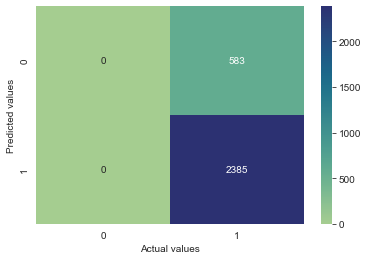

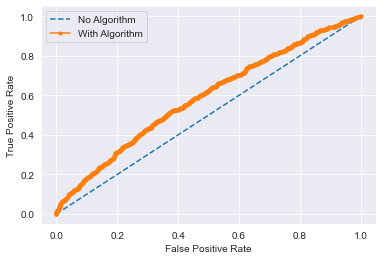

In [571]:
train = lgb.Dataset(X_train, label=y_train)
val = lgb.Dataset(X_val, label=y_val)
lgbm_ec2 = lgb.train(best_params, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

evaluate_lgbm(lgbm_ec2)

## XGBoost

In [572]:
def objective(trial):
    # Define the search space for XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-10, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-10, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.4, 2.5),  
    }

    # Train and evaluate the XGBoost model
    model = xgb.XGBClassifier(**params, random_state=5)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    pos_probs = model.predict_proba(X_val)[:, 1]
    roc_score = roc_auc_score(y_val, pos_probs)
#     acc_score = accuracy_score(y_val, y_hat)

    return roc_score

In [573]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-06 21:21:05,082] A new study created in memory with name: no-name-b102a564-552f-4871-8c53-b13622864975
[I 2023-07-06 21:21:05,745] Trial 0 finished with value: 0.5772747050425939 and parameters: {'max_depth': 4, 'learning_rate': 0.00200247234015107, 'subsample': 0.8368100237241805, 'colsample_bytree': 0.6797783884037543, 'lambda': 0.00016124825185956474, 'alpha': 0.00012999950430699552, 'scale_pos_weight': 2.226828968561239}. Best is trial 0 with value: 0.5772747050425939.
[I 2023-07-06 21:21:06,319] Trial 1 finished with value: 0.5678155711619578 and parameters: {'max_depth': 2, 'learning_rate': 0.0018467875411752304, 'subsample': 0.8790456346441657, 'colsample_bytree': 0.8159097344393107, 'lambda': 2.4580596954816884e-09, 'alpha': 2.295377515350042e-07, 'scale_pos_weight': 1.9161079895393884}. Best is trial 0 with value: 0.5772747050425939.
[I 2023-07-06 21:21:07,600] Trial 2 finished with value: 0.57880298175777 and parameters: {'max_depth': 6, 'learning_rate': 0.00684492

[I 2023-07-06 21:21:31,400] Trial 22 finished with value: 0.5813021636802342 and parameters: {'max_depth': 8, 'learning_rate': 0.007690893853030551, 'subsample': 0.932152914298919, 'colsample_bytree': 0.5526304817506438, 'lambda': 0.04540543652137929, 'alpha': 1.3493501094129187e-05, 'scale_pos_weight': 2.4009219246879114}. Best is trial 20 with value: 0.5846172655713419.
[I 2023-07-06 21:21:32,294] Trial 23 finished with value: 0.5813280544857619 and parameters: {'max_depth': 7, 'learning_rate': 0.006738552847570678, 'subsample': 0.8700899918209866, 'colsample_bytree': 0.5107418620614331, 'lambda': 0.005175111713567794, 'alpha': 5.0247651416331175e-06, 'scale_pos_weight': 2.495199783050571}. Best is trial 20 with value: 0.5846172655713419.
[I 2023-07-06 21:21:33,053] Trial 24 finished with value: 0.5789543710512026 and parameters: {'max_depth': 6, 'learning_rate': 0.005532929654096672, 'subsample': 0.9337221974530607, 'colsample_bytree': 0.5572117519637498, 'lambda': 0.107123180591791

[I 2023-07-06 21:21:53,780] Trial 44 finished with value: 0.582054435418622 and parameters: {'max_depth': 7, 'learning_rate': 0.004402902324579749, 'subsample': 0.9242401229917052, 'colsample_bytree': 0.5333658497491678, 'lambda': 2.19602186716062e-05, 'alpha': 1.1629973523145266e-07, 'scale_pos_weight': 2.1298962380613333}. Best is trial 42 with value: 0.5903995454725253.
[I 2023-07-06 21:21:54,856] Trial 45 finished with value: 0.5807958545943595 and parameters: {'max_depth': 8, 'learning_rate': 0.004149272498274617, 'subsample': 0.9128893770676422, 'colsample_bytree': 0.5550634384822887, 'lambda': 0.00011112341538101204, 'alpha': 6.248681145824814e-07, 'scale_pos_weight': 2.224783089232759}. Best is trial 42 with value: 0.5903995454725253.
[I 2023-07-06 21:21:55,203] Trial 46 finished with value: 0.5672441754677426 and parameters: {'max_depth': 2, 'learning_rate': 0.0029586329736726365, 'subsample': 0.9487864964525244, 'colsample_bytree': 0.5739938486412692, 'lambda': 0.000386949730

[I 2023-07-06 21:22:18,279] Trial 66 finished with value: 0.5763196219942393 and parameters: {'max_depth': 7, 'learning_rate': 0.004624196932687528, 'subsample': 0.8960296121570472, 'colsample_bytree': 0.5192225687323793, 'lambda': 0.0007714772070782657, 'alpha': 2.32256395245024e-05, 'scale_pos_weight': 2.0174958681702186}. Best is trial 42 with value: 0.5903995454725253.
[I 2023-07-06 21:22:19,464] Trial 67 finished with value: 0.5788134099988853 and parameters: {'max_depth': 9, 'learning_rate': 0.0050964687605210765, 'subsample': 0.8224026350158711, 'colsample_bytree': 0.5003988515773421, 'lambda': 0.259081843580935, 'alpha': 4.4812740928359675e-06, 'scale_pos_weight': 2.302758660687758}. Best is trial 42 with value: 0.5903995454725253.
[I 2023-07-06 21:22:20,929] Trial 68 finished with value: 0.577827761416227 and parameters: {'max_depth': 10, 'learning_rate': 0.003816369134240084, 'subsample': 0.8040784097994942, 'colsample_bytree': 0.5899946133140463, 'lambda': 6.61328883678227e-

[I 2023-07-06 21:22:43,388] Trial 88 finished with value: 0.5828512968776407 and parameters: {'max_depth': 8, 'learning_rate': 0.004766133332083465, 'subsample': 0.9562818935529205, 'colsample_bytree': 0.5366441131063436, 'lambda': 0.0007321145070347851, 'alpha': 3.121973995444993e-06, 'scale_pos_weight': 2.256096457082197}. Best is trial 42 with value: 0.5903995454725253.
[I 2023-07-06 21:22:44,651] Trial 89 finished with value: 0.5841397240471644 and parameters: {'max_depth': 9, 'learning_rate': 0.005381522362875731, 'subsample': 0.9171137218135389, 'colsample_bytree': 0.5520722482320654, 'lambda': 0.019858701335928045, 'alpha': 5.741380122902595e-06, 'scale_pos_weight': 2.312046307994006}. Best is trial 42 with value: 0.5903995454725253.
[I 2023-07-06 21:22:45,996] Trial 90 finished with value: 0.5862922568511747 and parameters: {'max_depth': 10, 'learning_rate': 0.003932139792460881, 'subsample': 0.9007193177054498, 'colsample_bytree': 0.5258261637840825, 'lambda': 0.05698435801967

In [574]:
print('the best parameters are: ', best_params)
print(f'The best roc score is: {best_score}')

the best parameters are:  {'max_depth': 8, 'learning_rate': 0.004556927610087875, 'subsample': 0.9092073110588502, 'colsample_bytree': 0.5282999303939397, 'lambda': 0.0002868399911646473, 'alpha': 0.00010371615760022182, 'scale_pos_weight': 2.1316838567004264}
The best roc score is: 0.5903995454725253


Past parameters:
- the best parameters are:  {'max_depth': 9, 'learning_rate': 0.008613782049222791, 'subsample': 0.5344964612515295, 'colsample_bytree': 0.5904450834683979, 'lambda': 3.051643788491718e-08, 'alpha': 0.001485901185103811, 'scale_pos_weight': 1.8648229501755413}|The best score is:  0.6045344869125574

Train Accuracy score is: 0.7995787700084246
Test Accuracy score is: 0.8035714285714286
ROC_AUC score is: 0.5903995454725253
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       583
           1       0.80      1.00      0.89      2385

    accuracy                           0.80      2968
   macro avg       0.40      0.50      0.45      2968
weighted avg       0.65      0.80      0.72      2968



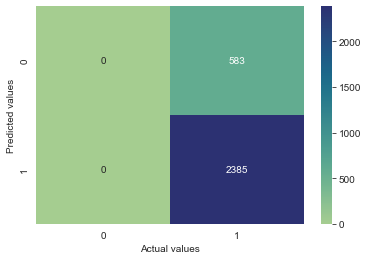

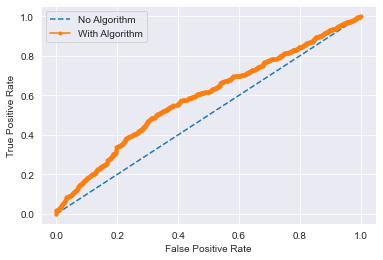

In [575]:
xgb_ec2 = xgb.XGBClassifier(**best_params, random_state=5)
xgb_ec2.fit(X_train, y_train)

evaluate_model(xgb_ec2)

In [577]:
y_hat_rfc = rfc_ec2.predict_proba(X_test)[:,1]
y_hat_lgbm = lgbm_ec2.predict(X_test)
y_hat_xgb = xgb_ec2.predict_proba(X_test)[:,1]

y_hat = pd.DataFrame(zip(y_hat_rfc,y_hat_lgbm, y_hat_xgb))

y_hat

,0,1,2
0,0.692852,0.770692,0.623333
1,0.700434,0.783714,0.647010
2,0.616729,0.704664,0.637029
3,0.673467,0.813847,0.647227
4,0.660243,0.807858,0.645766
...,...,...,...
9888,0.604262,0.755370,0.631846
9889,0.757768,0.817708,0.655166
9890,0.728712,0.855573,0.657946
9891,0.774273,0.874814,0.659670


In [588]:
(y_hat[1]>=0.5).sum()

9893

#### Predicting EC2 best model: XGBoost

In [587]:
(pd.read_csv('submissions/rfc_xgb.csv')['EC2']>=0.5).sum()

9893

In [265]:
pd.read_csv('submissions/use_ec1(2).csv')

,id,EC1,EC2
0,14838,0.436758,0.835999
1,14839,0.811926,0.780156
2,14840,0.781455,0.710728
3,14841,0.712642,0.780374
4,14842,0.771032,0.772533
...,...,...,...
9888,24726,0.623808,0.732661
9889,24727,0.747591,0.819741
9890,24728,0.368690,0.864607
9891,24729,0.430987,0.879144


# Using EC1 to predict EC2

Based on my previous lgbm2 model, the model failed to predict any 0 (false) value class (0%). So, I am going to try using EC1 to also contribute to predicting EC2.

In [176]:
X = transformed_df.drop(['id','EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = transformed_df['EC2']

X_train, X_val, y_train, y_val = split_data(X,y)

X_train

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,0.000000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,12.152040,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0,1
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,0.000000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,0.000000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11798,-0.679346,-0.552008,-0.539291,5.163902,3.722225,3.722225,2.229188,2.229188,1.749075,0.933119,...,0.000000,0.000000,0.000000,7.822697,25.235636,9.088795,35.166667,0,0,0
13896,-0.756094,-0.777881,-0.793221,3.553418,2.189533,2.189533,1.477829,1.477829,0.711731,0.182919,...,0.000000,12.132734,0.000000,5.969305,0.000000,0.000000,23.166667,1,1,1
6637,-0.945332,-1.035367,-1.023724,1.732051,1.341641,1.341641,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.027704,0.000000,8.180556,0,0,1
2575,-0.586183,-0.777975,-0.774255,3.931852,2.786883,2.786883,1.927161,1.927161,0.962617,0.350229,...,18.199101,0.000000,0.000000,0.000000,0.000000,0.000000,23.333333,0,0,1


## LightGBM

In [177]:
def objective(trial):
    parameters = {
        'objective':'binary',
        'num_leaves':trial.suggest_int('num_leaves', 10, 70),
        'learning_rate':trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'max_depth':trial.suggest_int('max_depth', 2, 10),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100, step=5),
        'subsample':trial.suggest_float('subsample', 0.5, 1),
        'feature_fraction':trial.suggest_uniform('feature_fraction', 0.5, 1),
        'lambda_l1 ':trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'n_estimators ':trial.suggest_int('n_estimators ', 100, 1000, step=100),
        'bagging_fraction ':trial.suggest_uniform('bagging_fraction ', 0.5,1),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'class_weight': trial.suggest_uniform('class_weight', 1.0,2.5),
    }
    train = lgb.Dataset(X_train, label=y_train)
    val = lgb.Dataset(X_val, label=y_val)
    
    model = lgb.train(parameters, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

    y_hat = model.predict(X_val)
#     y_hat_bin = (y_hat>=0.5).astype(int)
    score = roc_auc_score(y_val, y_hat)

    return score

In [178]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:39:03,582] A new study created in memory with name: no-name-8b902793-6c22-452e-bb6a-17d0d0891359


[LightGBM] [Warning] Unknown parameter: 5.761762731094583e-06
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5100112215201874
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6360042556414442 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.761762731094583e-06
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5100112215201874
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6360042556414442 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:03,808] Trial 0 finished with value: 0.627133564193016 and parameters: {'num_leaves': 67, 'learning_rate': 0.0036527737868794056, 'max_depth': 5, 'min_data_in_leaf': 26, 'subsample': 0.6360042556414442, 'feature_fraction': 0.645737345256419, 'lambda_l1': 5.761762731094583e-06, 'lambda_l2': 3.5014081902353772e-06, 'n_estimators ': 1000, 'bagging_fraction ': 0.5100112215201874, 'bagging_freq': 9, 'class_weight': 2.3712229905218347}. Best is trial 0 with value: 0.627133564193016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.5098400346305876
[LightGBM] [Warning] Unknown parameter: 0.028587411156779777
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8253181971494234 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.5098400346305876
[LightGBM] [Warning] Unknown parameter: 0.028587411156779777
[LightGBM] [Warning] Unknown parameter: 600
[Ligh

[I 2023-07-05 16:39:04,060] Trial 1 finished with value: 0.6274474902100391 and parameters: {'num_leaves': 43, 'learning_rate': 0.00744488655449367, 'max_depth': 8, 'min_data_in_leaf': 56, 'subsample': 0.8253181971494234, 'feature_fraction': 0.6649956714406746, 'lambda_l1': 0.028587411156779777, 'lambda_l2': 1.0874127383566291e-07, 'n_estimators ': 600, 'bagging_fraction ': 0.5098400346305876, 'bagging_freq': 9, 'class_weight': 1.3077362845439349}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] Unknown parameter: 0.31085311654271747
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.5560906342043437
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6824561331753762 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.31085311654271747
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.5560906342043437
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6824561331753762 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:04,413] Trial 2 finished with value: 0.6272874706480972 and parameters: {'num_leaves': 29, 'learning_rate': 0.0018193350499283634, 'max_depth': 8, 'min_data_in_leaf': 66, 'subsample': 0.6824561331753762, 'feature_fraction': 0.8120008176705604, 'lambda_l1': 0.31085311654271747, 'lambda_l2': 1.881374656054195e-07, 'n_estimators ': 900, 'bagging_fraction ': 0.5560906342043437, 'bagging_freq': 2, 'class_weight': 1.068613244079016}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] Unknown parameter: 2.705161804265538e-06
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.7610108722456137
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8394777553677664 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.705161804265538e-06
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.7610108722456137
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8394777553677664 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:04,724] Trial 3 finished with value: 0.6243848236728265 and parameters: {'num_leaves': 47, 'learning_rate': 0.0011613915854217006, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.8394777553677664, 'feature_fraction': 0.830324307603854, 'lambda_l1': 2.705161804265538e-06, 'lambda_l2': 0.00015209296244552618, 'n_estimators ': 800, 'bagging_fraction ': 0.7610108722456137, 'bagging_freq': 8, 'class_weight': 2.198469801453742}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.00012993022991611745
[LightGBM] [Warning] Unknown parameter: 0.9029551715581596
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5973839173559379 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.00012993022991611745
[LightGBM] [Warning] Unknown parameter: 0.9029551715581596
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5973839173559379 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100,

[I 2023-07-05 16:39:05,008] Trial 4 finished with value: 0.6270695563682391 and parameters: {'num_leaves': 45, 'learning_rate': 0.0027349380742270157, 'max_depth': 8, 'min_data_in_leaf': 56, 'subsample': 0.5973839173559379, 'feature_fraction': 0.6995934582875972, 'lambda_l1': 0.00012993022991611745, 'lambda_l2': 0.010812262599668493, 'n_estimators ': 800, 'bagging_fraction ': 0.9029551715581596, 'bagging_freq': 9, 'class_weight': 1.6901390179919222}. Best is trial 1 with value: 0.6274474902100391.
[I 2023-07-05 16:39:05,168] Trial 5 finished with value: 0.6233434379393796 and parameters: {'num_leaves': 62, 'learning_rate': 0.006885541075851593, 'max_depth': 4, 'min_data_in_leaf': 36, 'subsample': 0.8212135848453175, 'feature_fraction': 0.9811524226611772, 'lambda_l1': 0.013473205105126168, 'lambda_l2': 6.014145456838767e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.888783320321042, 'bagging_freq': 9, 'class_weight': 1.5776297229089722}. Best is trial 1 with value: 0.627447490210039

[LightGBM] [Warning] Unknown parameter: 0.888783320321042
[LightGBM] [Warning] Unknown parameter: 0.013473205105126168
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8212135848453175 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.888783320321042
[LightGBM] [Warning] Unknown parameter: 0.013473205105126168
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8212135848453175 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:05,318] Trial 6 finished with value: 0.6158606355473568 and parameters: {'num_leaves': 26, 'learning_rate': 0.003061909793509351, 'max_depth': 2, 'min_data_in_leaf': 26, 'subsample': 0.959212610839339, 'feature_fraction': 0.612116211905954, 'lambda_l1': 3.4989431823025066, 'lambda_l2': 0.14434769388515306, 'n_estimators ': 600, 'bagging_fraction ': 0.8326382933072528, 'bagging_freq': 2, 'class_weight': 2.387889310065106}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] Unknown parameter: 3.4989431823025066
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.8326382933072528
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.959212610839339 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6243
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 3.4989431823025066
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning

[I 2023-07-05 16:39:05,466] Trial 7 finished with value: 0.6252870463265621 and parameters: {'num_leaves': 12, 'learning_rate': 0.00322027962477268, 'max_depth': 4, 'min_data_in_leaf': 61, 'subsample': 0.8805263951150097, 'feature_fraction': 0.8028144124723013, 'lambda_l1': 6.821124473916414e-07, 'lambda_l2': 0.0018564295469757513, 'n_estimators ': 500, 'bagging_fraction ': 0.9494142741811509, 'bagging_freq': 8, 'class_weight': 1.4378600490137727}. Best is trial 1 with value: 0.6274474902100391.
[I 2023-07-05 16:39:05,644] Trial 8 finished with value: 0.6237846604169139 and parameters: {'num_leaves': 18, 'learning_rate': 0.005005825654591341, 'max_depth': 9, 'min_data_in_leaf': 61, 'subsample': 0.7485001724896883, 'feature_fraction': 0.6297651679613523, 'lambda_l1': 3.06513562245248e-05, 'lambda_l2': 0.0010242484463847549, 'n_estimators ': 100, 'bagging_fraction ': 0.9578853085778231, 'bagging_freq': 1, 'class_weight': 2.3253169385358436}. Best is trial 1 with value: 0.6274474902100391

[LightGBM] [Warning] Unknown parameter: 3.06513562245248e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9578853085778231
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7485001724896883 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.06513562245248e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9578853085778231
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7485001724896883 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:05,787] Trial 9 finished with value: 0.6155168631850725 and parameters: {'num_leaves': 30, 'learning_rate': 0.0018192722498594192, 'max_depth': 3, 'min_data_in_leaf': 11, 'subsample': 0.7447798595872899, 'feature_fraction': 0.6777741815994743, 'lambda_l1': 0.007722005318112481, 'lambda_l2': 1.0807274904189092e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.5809751939921883, 'bagging_freq': 2, 'class_weight': 1.430210527215352}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.5809751939921883
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7447798595872899 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6243
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 0.007722005318112481
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.5809751939921883
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] baggin

[I 2023-07-05 16:39:06,183] Trial 10 finished with value: 0.623070146103254 and parameters: {'num_leaves': 57, 'learning_rate': 0.00900911473037337, 'max_depth': 10, 'min_data_in_leaf': 91, 'subsample': 0.5380990816955453, 'feature_fraction': 0.5061858092735848, 'lambda_l1': 8.830998240287995e-08, 'lambda_l2': 1.722379493613729e-08, 'n_estimators ': 500, 'bagging_fraction ': 0.6332087914853473, 'bagging_freq': 5, 'class_weight': 1.0180291004957274}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.6599356729483437
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5008678758821318
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6917809504383756 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.6599356729483437
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5008678758821318
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6917809504383756 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Inf

[I 2023-07-05 16:39:06,752] Trial 11 finished with value: 0.6254463466994618 and parameters: {'num_leaves': 33, 'learning_rate': 0.009787669401194946, 'max_depth': 7, 'min_data_in_leaf': 76, 'subsample': 0.6917809504383756, 'feature_fraction': 0.7702741092915903, 'lambda_l1': 0.6599356729483437, 'lambda_l2': 2.7819909223083972e-08, 'n_estimators ': 1000, 'bagging_fraction ': 0.5008678758821318, 'bagging_freq': 5, 'class_weight': 1.045657465119113}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0744214458040927
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6327466852745405
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6952962419344687 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0744214458040927
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6327466852745405
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fr

[I 2023-07-05 16:39:07,271] Trial 12 finished with value: 0.6242992401767767 and parameters: {'num_leaves': 39, 'learning_rate': 0.0054672797400449015, 'max_depth': 6, 'min_data_in_leaf': 76, 'subsample': 0.6952962419344687, 'feature_fraction': 0.8477358034962719, 'lambda_l1': 0.0744214458040927, 'lambda_l2': 4.342920846937023e-07, 'n_estimators ': 700, 'bagging_fraction ': 0.6327466852745405, 'bagging_freq': 4, 'class_weight': 1.2052107038774438}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0017849554976649363
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.586913608703466
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7951519861058781 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0017849554976649363
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.586913608703466
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7951519861058781 will be ignored. Current v

[I 2023-07-05 16:39:07,813] Trial 13 finished with value: 0.628269163691022 and parameters: {'num_leaves': 52, 'learning_rate': 0.0018262268415589241, 'max_depth': 10, 'min_data_in_leaf': 46, 'subsample': 0.7951519861058781, 'feature_fraction': 0.8887214635607243, 'lambda_l1': 0.0017849554976649363, 'lambda_l2': 3.707504073165085e-07, 'n_estimators ': 400, 'bagging_fraction ': 0.586913608703466, 'bagging_freq': 7, 'class_weight': 1.2484125625965041}. Best is trial 13 with value: 0.628269163691022.


[LightGBM] [Warning] Unknown parameter: 0.001006992743792125
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6774258603595443
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7882035540020981 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.001006992743792125
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6774258603595443
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7882035540020981 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:08,236] Trial 14 finished with value: 0.6281878953292267 and parameters: {'num_leaves': 52, 'learning_rate': 0.006728642312796103, 'max_depth': 10, 'min_data_in_leaf': 41, 'subsample': 0.7882035540020981, 'feature_fraction': 0.9108871647575871, 'lambda_l1': 0.001006992743792125, 'lambda_l2': 1.5825144329893897e-06, 'n_estimators ': 400, 'bagging_fraction ': 0.6774258603595443, 'bagging_freq': 7, 'class_weight': 1.3489428781197332}. Best is trial 13 with value: 0.628269163691022.


[LightGBM] [Warning] Unknown parameter: 0.0008676771277592927
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6845433134550305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9997822120045396 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0008676771277592927
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6845433134550305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9997822120045396 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:08,608] Trial 15 finished with value: 0.6284910335106135 and parameters: {'num_leaves': 51, 'learning_rate': 0.004472706003066478, 'max_depth': 10, 'min_data_in_leaf': 36, 'subsample': 0.9997822120045396, 'feature_fraction': 0.9368746996857462, 'lambda_l1': 0.0008676771277592927, 'lambda_l2': 2.9106374239086364e-06, 'n_estimators ': 400, 'bagging_fraction ': 0.6845433134550305, 'bagging_freq': 7, 'class_weight': 1.866226427697262}. Best is trial 15 with value: 0.6284910335106135.


[LightGBM] [Warning] Unknown parameter: 0.0007985465042664815
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7031201993387249
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9944575816342115 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0007985465042664815
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7031201993387249
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9944575816342115 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:09,092] Trial 16 finished with value: 0.628048013060473 and parameters: {'num_leaves': 55, 'learning_rate': 0.004033087587283102, 'max_depth': 10, 'min_data_in_leaf': 1, 'subsample': 0.9944575816342115, 'feature_fraction': 0.9971410619678709, 'lambda_l1': 0.0007985465042664815, 'lambda_l2': 2.8149798269827313e-05, 'n_estimators ': 300, 'bagging_fraction ': 0.7031201993387249, 'bagging_freq': 7, 'class_weight': 1.926091377735657}. Best is trial 15 with value: 0.6284910335106135.


[LightGBM] [Warning] Unknown parameter: 0.0014683620499799572
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7759256450772167
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9090434887014119 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0014683620499799572
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7759256450772167
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9090434887014119 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:09,497] Trial 17 finished with value: 0.6266714852332509 and parameters: {'num_leaves': 68, 'learning_rate': 0.0021840147188477133, 'max_depth': 9, 'min_data_in_leaf': 41, 'subsample': 0.9090434887014119, 'feature_fraction': 0.9028335554961032, 'lambda_l1': 0.0014683620499799572, 'lambda_l2': 2.100095426377389e-06, 'n_estimators ': 400, 'bagging_fraction ': 0.7759256450772167, 'bagging_freq': 6, 'class_weight': 1.86874615029524}. Best is trial 15 with value: 0.6284910335106135.


[LightGBM] [Warning] Unknown parameter: 7.369633334146806e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7026371273812856
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.925689669013247 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.369633334146806e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7026371273812856
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.925689669013247 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:09,832] Trial 18 finished with value: 0.6148638395345408 and parameters: {'num_leaves': 50, 'learning_rate': 0.001056214472884355, 'max_depth': 6, 'min_data_in_leaf': 26, 'subsample': 0.925689669013247, 'feature_fraction': 0.9200364832807137, 'lambda_l1': 7.369633334146806e-05, 'lambda_l2': 7.995494734960717, 'n_estimators ': 400, 'bagging_fraction ': 0.7026371273812856, 'bagging_freq': 4, 'class_weight': 1.5744955816055317}. Best is trial 15 with value: 0.6284910335106135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:39:10,166] Trial 19 finished with value: 0.629682010564887 and parameters: {'num_leaves': 38, 'learning_rate': 0.004568685175819091, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.8740678248984955, 'feature_fraction': 0.8767623433235306, 'lambda_l1': 0.0022323125867329974, 'lambda_l2': 1.1859816080116056e-05, 'n_estimators ': 300, 'bagging_fraction ': 0.605151351388924, 'bagging_freq': 10, 'class_weight': 2.0412225610363897}. Best is trial 19 with value: 0.629682010564887.


[LightGBM] [Warning] Unknown parameter: 0.7436435446831803
[LightGBM] [Warning] Unknown parameter: 1.4628220269586929e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9777212934623309 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.7436435446831803
[LightGBM] [Warning] Unknown parameter: 1.4628220269586929e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9777212934623309 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:10,483] Trial 20 finished with value: 0.6307043377887095 and parameters: {'num_leaves': 36, 'learning_rate': 0.004638896047001705, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.9777212934623309, 'feature_fraction': 0.9506784521418206, 'lambda_l1': 1.4628220269586929e-08, 'lambda_l2': 1.526371279673488e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7436435446831803, 'bagging_freq': 10, 'class_weight': 2.0544972333479348}. Best is trial 20 with value: 0.6307043377887095.


[LightGBM] [Warning] Unknown parameter: 2.1263164965103102e-08
[LightGBM] [Warning] Unknown parameter: 0.7401113467076136
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9852772356084678 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.1263164965103102e-08
[LightGBM] [Warning] Unknown parameter: 0.7401113467076136
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9852772356084678 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:10,809] Trial 21 finished with value: 0.631322480770683 and parameters: {'num_leaves': 38, 'learning_rate': 0.004680019053333568, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.9852772356084678, 'feature_fraction': 0.9468415482969073, 'lambda_l1': 2.1263164965103102e-08, 'lambda_l2': 1.1426166690870412e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7401113467076136, 'bagging_freq': 10, 'class_weight': 2.059733785703482}. Best is trial 21 with value: 0.631322480770683.


[LightGBM] [Warning] Unknown parameter: 0.7937775677643354
[LightGBM] [Warning] Unknown parameter: 1.9903373027570353e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9425609727235996 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.7937775677643354
[LightGBM] [Warning] Unknown parameter: 1.9903373027570353e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9425609727235996 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:11,242] Trial 22 finished with value: 0.6316044028753178 and parameters: {'num_leaves': 38, 'learning_rate': 0.00502875810407211, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.9425609727235996, 'feature_fraction': 0.9626269792704852, 'lambda_l1': 1.9903373027570353e-08, 'lambda_l2': 2.044135280105889e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7937775677643354, 'bagging_freq': 10, 'class_weight': 2.0788316979275585}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:11,522] Trial 23 finished with value: 0.6274776961498214 and parameters: {'num_leaves': 22, 'learning_rate': 0.005720517543786006, 'max_depth': 7, 'min_data_in_leaf': 1, 'subsample': 0.9489073479561974, 'feature_fraction': 0.9587375483259909, 'lambda_l1': 2.3337953041056926e-08, 'lambda_l2': 8.381819057538749e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7969594787172876, 'bagging_freq': 10, 'class_weight': 2.1404354377931196}. Best is trial 22 with value: 0.63160440

[LightGBM] [Warning] Unknown parameter: 2.3337953041056926e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7969594787172876
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9489073479561974 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.3337953041056926e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7969594787172876
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9489073479561974 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:11,860] Trial 24 finished with value: 0.6284137206885516 and parameters: {'num_leaves': 35, 'learning_rate': 0.005666113394758949, 'max_depth': 7, 'min_data_in_leaf': 11, 'subsample': 0.9631977931212785, 'feature_fraction': 0.9612336313236467, 'lambda_l1': 1.798362029000704e-08, 'lambda_l2': 2.2592480109552954e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7325069297999014, 'bagging_freq': 10, 'class_weight': 2.0481228370802413}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 0.8062597152149767
[LightGBM] [Warning] Unknown parameter: 1.2059963939022524e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9094930220265558 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.8062597152149767
[LightGBM] [Warning] Unknown parameter: 1.2059963939022524e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9094930220265558 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:12,232] Trial 25 finished with value: 0.6254603708857892 and parameters: {'num_leaves': 42, 'learning_rate': 0.003977124081544909, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.9094930220265558, 'feature_fraction': 0.9912693542183582, 'lambda_l1': 1.2059963939022524e-07, 'lambda_l2': 0.00028371794426972167, 'n_estimators ': 200, 'bagging_fraction ': 0.8062597152149767, 'bagging_freq': 10, 'class_weight': 2.2291807152048704}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.0077970436499032e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7420777815092833
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9980902374453833 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0077970436499032e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7420777815092833
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9980902374453833 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:12,622] Trial 26 finished with value: 0.628168477225081 and parameters: {'num_leaves': 35, 'learning_rate': 0.004949834681289588, 'max_depth': 9, 'min_data_in_leaf': 6, 'subsample': 0.9980902374453833, 'feature_fraction': 0.9430993027188056, 'lambda_l1': 1.0077970436499032e-08, 'lambda_l2': 2.187547612204324e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.7420777815092833, 'bagging_freq': 8, 'class_weight': 2.457689636576777}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:12,901] Trial 27 finished with value: 0.6285388595819354 and parameters: {'num_leaves': 25, 'learning_rate': 0.006018483808506779, 'max_depth': 7, 'min_data_in_leaf': 21, 'subsample': 0.9417612459130413, 'feature_fraction': 0.8767399309582405, 'lambda_l1': 3.573904029587916e-07, 'lambda_l2': 0.0002985419874394132, 'n_estimators ': 100, 'bagging_fraction ': 0.8305466291325487, 'bagging_freq': 10, 'class_weight': 2.0632659967528775}. Best is trial 22 with value: 0.63160440287

[LightGBM] [Warning] Unknown parameter: 3.573904029587916e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8305466291325487
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9417612459130413 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.573904029587916e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8305466291325487
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9417612459130413 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:13,268] Trial 28 finished with value: 0.6272820767302789 and parameters: {'num_leaves': 39, 'learning_rate': 0.0043008324411965854, 'max_depth': 8, 'min_data_in_leaf': 6, 'subsample': 0.8826238971252268, 'feature_fraction': 0.9408501653827324, 'lambda_l1': 6.04957206297886e-08, 'lambda_l2': 6.44393659926873e-06, 'n_estimators ': 300, 'bagging_fraction ': 0.7351131299477753, 'bagging_freq': 9, 'class_weight': 1.9680524845726972}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:13,552] Trial 29 finished with value: 0.6267365718415914 and parameters: {'num_leaves': 31, 'learning_rate': 0.003766570966036787, 'max_depth': 5, 'min_data_in_leaf': 31, 'subsample': 0.9486804413044706, 'feature_fraction': 0.8597659152386157, 'lambda_l1': 2.9135956073886625e-06, 'lambda_l2': 9.556695688615265e-07, 'n_estimators ': 100, 'bagging_fraction ': 0.7783324380489035, 'bagging_freq': 8, 'class_weight': 1.790286723040661}. Best is trial 22 with value: 0.631604402875

[LightGBM] [Warning] Unknown parameter: 2.9135956073886625e-06
[LightGBM] [Warning] Unknown parameter: 0.7783324380489035
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9486804413044706 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 2.9135956073886625e-06
[LightGBM] [Warning] Unknown parameter: 0.7783324380489035
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9486804413044706 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will 

[LightGBM] [Warning] Unknown parameter: 3.3628833279147387e-07
[LightGBM] [Warning] Unknown parameter: 0.8317951051336712
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.979963919642199 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.3628833279147387e-07
[LightGBM] [Warning] Unknown parameter: 0.8317951051336712
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.979963919642199 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:13,862] Trial 30 finished with value: 0.6282346426169849 and parameters: {'num_leaves': 20, 'learning_rate': 0.003500665419246067, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.979963919642199, 'feature_fraction': 0.909440116897546, 'lambda_l1': 3.3628833279147387e-07, 'lambda_l2': 5.099477783030825e-06, 'n_estimators ': 200, 'bagging_fraction ': 0.8317951051336712, 'bagging_freq': 9, 'class_weight': 2.2906848236514064}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 4.43018853950174e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6544168175473958
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.88360799744347 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.43018853950174e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6544168175473958
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.88360799744347 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Au

[I 2023-07-05 16:39:14,218] Trial 31 finished with value: 0.6284248681187093 and parameters: {'num_leaves': 38, 'learning_rate': 0.004783851071634667, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.88360799744347, 'feature_fraction': 0.9682005853011281, 'lambda_l1': 4.43018853950174e-08, 'lambda_l2': 9.198825596956489e-06, 'n_estimators ': 300, 'bagging_fraction ': 0.6544168175473958, 'bagging_freq': 10, 'class_weight': 2.0815043698246427}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.200110393465418e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7278050850261885
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9224176206864478 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.200110393465418e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7278050850261885
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9224176206864478 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:14,622] Trial 32 finished with value: 0.6293616118464819 and parameters: {'num_leaves': 46, 'learning_rate': 0.004468733483606733, 'max_depth': 8, 'min_data_in_leaf': 11, 'subsample': 0.9224176206864478, 'feature_fraction': 0.8784039658247973, 'lambda_l1': 1.200110393465418e-08, 'lambda_l2': 7.231530772462864e-05, 'n_estimators ': 300, 'bagging_fraction ': 0.7278050850261885, 'bagging_freq': 10, 'class_weight': 2.0034978744339935}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.1764260930516392e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5449040682484545
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9619865276702515 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.1764260930516392e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5449040682484545
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9619865276702515 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:14,995] Trial 33 finished with value: 0.6283666138062721 and parameters: {'num_leaves': 36, 'learning_rate': 0.006411741912280574, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.9619865276702515, 'feature_fraction': 0.9249766730874988, 'lambda_l1': 1.1764260930516392e-05, 'lambda_l2': 1.8354620535487458e-06, 'n_estimators ': 100, 'bagging_fraction ': 0.5449040682484545, 'bagging_freq': 9, 'class_weight': 2.1509868828655523}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.013668257842016e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7573728600147197
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8593347512138345 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.013668257842016e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7573728600147197
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8593347512138345 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:15,398] Trial 34 finished with value: 0.6247149314433045 and parameters: {'num_leaves': 41, 'learning_rate': 0.00517838473171918, 'max_depth': 8, 'min_data_in_leaf': 6, 'subsample': 0.8593347512138345, 'feature_fraction': 0.9682069862101063, 'lambda_l1': 1.013668257842016e-06, 'lambda_l2': 1.8441323147643297e-07, 'n_estimators ': 200, 'bagging_fraction ': 0.7573728600147197, 'bagging_freq': 10, 'class_weight': 2.122657613340886}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.26675661436752e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.711358853969851
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9192214833763682 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.26675661436752e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.711358853969851
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9192214833763682 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:15,788] Trial 35 finished with value: 0.6258559248591289 and parameters: {'num_leaves': 44, 'learning_rate': 0.0037252598386813096, 'max_depth': 8, 'min_data_in_leaf': 16, 'subsample': 0.9192214833763682, 'feature_fraction': 0.8487758415245542, 'lambda_l1': 1.26675661436752e-07, 'lambda_l2': 2.5743924836897966e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.711358853969851, 'bagging_freq': 8, 'class_weight': 2.222528513996929}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 0.6598921963933709
[LightGBM] [Warning] Unknown parameter: 3.204436548437455e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9612063406871034 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.6598921963933709
[LightGBM] [Warning] Unknown parameter: 3.204436548437455e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9612063406871034 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:16,184] Trial 36 finished with value: 0.6224074134006494 and parameters: {'num_leaves': 26, 'learning_rate': 0.007039745024906731, 'max_depth': 10, 'min_data_in_leaf': 1, 'subsample': 0.9612063406871034, 'feature_fraction': 0.995894091033978, 'lambda_l1': 3.204436548437455e-08, 'lambda_l2': 8.202292998343858e-08, 'n_estimators ': 300, 'bagging_fraction ': 0.6598921963933709, 'bagging_freq': 9, 'class_weight': 2.0106827158427993}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 5.496528209743497e-06
[LightGBM] [Warning] Unknown parameter: 0.7551630833427057
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9782788892056294 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.496528209743497e-06
[LightGBM] [Warning] Unknown parameter: 0.7551630833427057
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9782788892056294 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:16,510] Trial 37 finished with value: 0.626237454646141 and parameters: {'num_leaves': 33, 'learning_rate': 0.007981217908287791, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.9782788892056294, 'feature_fraction': 0.8868435256923161, 'lambda_l1': 5.496528209743497e-06, 'lambda_l2': 0.00010011269640230489, 'n_estimators ': 200, 'bagging_fraction ': 0.7551630833427057, 'bagging_freq': 9, 'class_weight': 1.9188364750960358}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 2.0165459463504355e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.868256437654318
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8460678884873497 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.0165459463504355e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.868256437654318
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8460678884873497 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:16,879] Trial 38 finished with value: 0.6270271242147355 and parameters: {'num_leaves': 47, 'learning_rate': 0.006035749907023148, 'max_depth': 8, 'min_data_in_leaf': 31, 'subsample': 0.8460678884873497, 'feature_fraction': 0.9413946515208214, 'lambda_l1': 2.0165459463504355e-07, 'lambda_l2': 5.583160813968723e-06, 'n_estimators ': 200, 'bagging_fraction ': 0.868256437654318, 'bagging_freq': 10, 'class_weight': 2.202463009505569}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 7.380601769071549e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8053570795270543
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8915071797072258 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.380601769071549e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8053570795270543
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8915071797072258 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:17,182] Trial 39 finished with value: 0.6298636057981021 and parameters: {'num_leaves': 29, 'learning_rate': 0.004422491295834124, 'max_depth': 7, 'min_data_in_leaf': 11, 'subsample': 0.8915071797072258, 'feature_fraction': 0.8013495992328914, 'lambda_l1': 7.380601769071549e-07, 'lambda_l2': 4.534065290370392e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.8053570795270543, 'bagging_freq': 8, 'class_weight': 2.0851990286179984}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:17,466] Trial 40 finished with value: 0.626552819041249 and parameters: {'num_leaves': 29, 'learning_rate': 0.00330950960173113, 'max_depth': 5, 'min_data_in_leaf': 6, 'subsample': 0.8968889460887737, 'feature_fraction': 0.8068481172070938, 'lambda_l1': 4.880317400001569e-08, 'lambda_l2': 0.0009298082710592983, 'n_estimators ': 100, 'bagging_fraction ': 0.794275798025803, 'bagging_freq': 8, 'class_weight': 2.290717200589955}. Best is trial 22 with value: 0.631604402875317

[LightGBM] [Warning] Unknown parameter: 4.880317400001569e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.794275798025803
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8968889460887737 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.880317400001569e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.794275798025803
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8968889460887737 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:17,859] Trial 41 finished with value: 0.6263280724654878 and parameters: {'num_leaves': 42, 'learning_rate': 0.004652488117995699, 'max_depth': 7, 'min_data_in_leaf': 16, 'subsample': 0.9351061707990977, 'feature_fraction': 0.8282755847773351, 'lambda_l1': 1.000061733159742e-08, 'lambda_l2': 4.186585063809334e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7709070860819377, 'bagging_freq': 9, 'class_weight': 2.0919530496659062}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 9.411385704155503e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.86688300550677
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.862062648394849 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 9.411385704155503e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.86688300550677
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.862062648394849 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Au

[I 2023-07-05 16:39:18,232] Trial 42 finished with value: 0.631177204584111 and parameters: {'num_leaves': 37, 'learning_rate': 0.00519510957808111, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.862062648394849, 'feature_fraction': 0.9095417502396479, 'lambda_l1': 9.411385704155503e-07, 'lambda_l2': 1.7512257489928347e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.86688300550677, 'bagging_freq': 10, 'class_weight': 2.004262255902615}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 5.891138465742594e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8491993477911193
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9052978819444876 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.891138465742594e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8491993477911193
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9052978819444876 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:18,612] Trial 43 finished with value: 0.626793747370465 and parameters: {'num_leaves': 28, 'learning_rate': 0.005048354720332387, 'max_depth': 8, 'min_data_in_leaf': 6, 'subsample': 0.9052978819444876, 'feature_fraction': 0.9639363938486556, 'lambda_l1': 5.891138465742594e-07, 'lambda_l2': 0.00021598751910475165, 'n_estimators ': 200, 'bagging_fraction ': 0.8491993477911193, 'bagging_freq': 9, 'class_weight': 2.1519644181939013}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 0.8898610236854004
[LightGBM] [Warning] Unknown parameter: 1.4133417974341478e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8585108935015472 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.8898610236854004
[LightGBM] [Warning] Unknown parameter: 1.4133417974341478e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8585108935015472 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:18,905] Trial 44 finished with value: 0.626145038854188 and parameters: {'num_leaves': 16, 'learning_rate': 0.005383541802898967, 'max_depth': 6, 'min_data_in_leaf': 11, 'subsample': 0.8585108935015472, 'feature_fraction': 0.7703838708413338, 'lambda_l1': 1.4133417974341478e-06, 'lambda_l2': 0.00012243829684286392, 'n_estimators ': 100, 'bagging_fraction ': 0.8898610236854004, 'bagging_freq': 9, 'class_weight': 1.9726376367578304}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.8409538727796793e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9219842656935437
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9286500760643376 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.8409538727796793e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9219842656935437
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9286500760643376 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:19,294] Trial 45 finished with value: 0.6297906081102949 and parameters: {'num_leaves': 33, 'learning_rate': 0.0041266283581285115, 'max_depth': 10, 'min_data_in_leaf': 26, 'subsample': 0.9286500760643376, 'feature_fraction': 0.9217506120273914, 'lambda_l1': 1.8409538727796793e-07, 'lambda_l2': 1.2350335905460033e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.9219842656935437, 'bagging_freq': 8, 'class_weight': 1.8610305708996708}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:19,478] Trial 46 finished with value: 0.60931853242284 and parameters: {'num_leaves': 32, 'learning_rate': 0.002990889781354213, 'max_depth': 2, 'min_data_in_leaf': 1, 'subsample': 0.9733888949002036, 'feature_fraction': 0.9787237371512598, 'lambda_l1': 6.697879220016067e-08, 'lambda_l2': 3.889378162410436e-06, 'n_estimators ': 200, 'bagging_fraction ': 0.8162495702559093, 'bagging_freq': 6, 'class_weight': 1.9794303505137196}. Best is trial 22 with value: 0.631604402

[LightGBM] [Warning] Unknown parameter: 6.697879220016067e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8162495702559093
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9733888949002036 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.697879220016067e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8162495702559093
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9733888949002036 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:19,728] Trial 47 finished with value: 0.6262014951940191 and parameters: {'num_leaves': 23, 'learning_rate': 0.006068952790785775, 'max_depth': 4, 'min_data_in_leaf': 51, 'subsample': 0.8358093035502773, 'feature_fraction': 0.9049160159922218, 'lambda_l1': 3.104040840303671e-08, 'lambda_l2': 5.301255933743003e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.85904668042466, 'bagging_freq': 10, 'class_weight': 1.7772544633293927}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 3.104040840303671e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8358093035502773 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.85904668042466
[LightGBM] [Warning] Unknown parameter: 3.104040840303671e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8358093035502773 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of t

[LightGBM] [Warning] Unknown parameter: 2.64967694781373e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.7893016532528808
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9422615180893313 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.64967694781373e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.7893016532528808
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9422615180893313 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:20,099] Trial 48 finished with value: 0.6262877978791115 and parameters: {'num_leaves': 36, 'learning_rate': 0.007547316305121856, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.9422615180893313, 'feature_fraction': 0.9998706793508959, 'lambda_l1': 2.64967694781373e-07, 'lambda_l2': 1.0442729031220373e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.7893016532528808, 'bagging_freq': 10, 'class_weight': 2.06005985212132}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 8.340560134749353e-08
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.8157795084921494
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8179683248417998 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.340560134749353e-08
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.8157795084921494
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8179683248417998 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:20,526] Trial 49 finished with value: 0.6277028023201039 and parameters: {'num_leaves': 61, 'learning_rate': 0.005404077044518291, 'max_depth': 10, 'min_data_in_leaf': 21, 'subsample': 0.8179683248417998, 'feature_fraction': 0.9404258728688147, 'lambda_l1': 8.340560134749353e-08, 'lambda_l2': 0.000782439146859968, 'n_estimators ': 500, 'bagging_fraction ': 0.8157795084921494, 'bagging_freq': 3, 'class_weight': 2.373519840551191}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 0.7713874481255982
[LightGBM] [Warning] Unknown parameter: 1.6490211918128936e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9866693479513835 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.7713874481255982
[LightGBM] [Warning] Unknown parameter: 1.6490211918128936e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9866693479513835 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:20,879] Trial 50 finished with value: 0.6287269275165324 and parameters: {'num_leaves': 44, 'learning_rate': 0.0041070303541509015, 'max_depth': 8, 'min_data_in_leaf': 71, 'subsample': 0.9866693479513835, 'feature_fraction': 0.8291768109671525, 'lambda_l1': 1.6490211918128936e-06, 'lambda_l2': 1.5161998901806175e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.7713874481255982, 'bagging_freq': 9, 'class_weight': 2.184411859129171}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 3.488660531610282e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9183091892038502
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9255050678482304 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.488660531610282e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9183091892038502
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9255050678482304 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:21,212] Trial 51 finished with value: 0.6307313073778008 and parameters: {'num_leaves': 29, 'learning_rate': 0.004181290746992364, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.9255050678482304, 'feature_fraction': 0.9221548439925624, 'lambda_l1': 3.488660531610282e-07, 'lambda_l2': 1.3015124940326637e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.9183091892038502, 'bagging_freq': 8, 'class_weight': 1.8544023463809507}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 6.082663903828785e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.92504610799489
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8983285803621672 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.082663903828785e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.92504610799489
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8983285803621672 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:21,584] Trial 52 finished with value: 0.6300656979190264 and parameters: {'num_leaves': 27, 'learning_rate': 0.0049168807928408505, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.8983285803621672, 'feature_fraction': 0.8980152309078843, 'lambda_l1': 6.082663903828785e-07, 'lambda_l2': 4.075923796553782e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.92504610799489, 'bagging_freq': 6, 'class_weight': 1.9179869156465232}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 2.841104003963438e-08
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9849161817432136
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9681682798174622 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.841104003963438e-08
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9849161817432136
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9681682798174622 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:21,937] Trial 53 finished with value: 0.6319283975389351 and parameters: {'num_leaves': 25, 'learning_rate': 0.004885850910778597, 'max_depth': 10, 'min_data_in_leaf': 36, 'subsample': 0.9681682798174622, 'feature_fraction': 0.9008181678552182, 'lambda_l1': 2.841104003963438e-08, 'lambda_l2': 2.848055565211517e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.9849161817432136, 'bagging_freq': 7, 'class_weight': 1.9097797727469497}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.4922314997390815e-08
[LightGBM] [Warning] Unknown parameter: 0.9954572384031204
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9706635724878309 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.4922314997390815e-08
[LightGBM] [Warning] Unknown parameter: 0.9954572384031204
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9706635724878309 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:22,248] Trial 54 finished with value: 0.6300063648230256 and parameters: {'num_leaves': 24, 'learning_rate': 0.0036478927813475732, 'max_depth': 10, 'min_data_in_leaf': 41, 'subsample': 0.9706635724878309, 'feature_fraction': 0.9241027018028846, 'lambda_l1': 2.4922314997390815e-08, 'lambda_l2': 3.472847679468174e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9954572384031204, 'bagging_freq': 7, 'class_weight': 1.7049926671481992}. Best is trial 53 with value: 0.6319283975389351.
[I 2023-07-05 16:39:22,528] Trial 55 finished with value: 0.6305310132294824 and parameters: {'num_leaves': 17, 'learning_rate': 0.005451980517911334, 'max_depth': 10, 'min_data_in_leaf': 36, 'subsample': 0.9464574834113517, 'feature_fraction': 0.9521836993857982, 'lambda_l1': 2.073450592628232e-08, 'lambda_l2': 5.878468625134107e-07, 'n_estimators ': 600, 'bagging_fraction ': 0.9630150029513651, 'bagging_freq': 7, 'class_weight': 1.8342293514954564}. Best is trial 53 with value: 0.631928

[LightGBM] [Warning] Unknown parameter: 2.073450592628232e-08
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.9630150029513651
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9464574834113517 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.073450592628232e-08
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.9630150029513651
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9464574834113517 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:22,907] Trial 56 finished with value: 0.6276423904405393 and parameters: {'num_leaves': 37, 'learning_rate': 0.004774579733217177, 'max_depth': 9, 'min_data_in_leaf': 51, 'subsample': 0.9782039055749329, 'feature_fraction': 0.9752770947123773, 'lambda_l1': 1.186101030926622e-07, 'lambda_l2': 2.9356859657401542e-06, 'n_estimators ': 600, 'bagging_fraction ': 0.8760112349557073, 'bagging_freq': 5, 'class_weight': 1.9345552806578903}. Best is trial 53 with value: 0.6319283975389351.
[I 2023-07-05 16:39:23,158] Trial 57 finished with value: 0.620554782427335 and parameters: {'num_leaves': 10, 'learning_rate': 0.003970703133365932, 'max_depth': 10, 'min_data_in_leaf': 46, 'subsample': 0.9994459522456194, 'feature_fraction': 0.9262706402009426, 'lambda_l1': 4.59389509409079e-08, 'lambda_l2': 1.0027405961080472e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.9060601608995071, 'bagging_freq': 10, 'class_weight': 2.0217931253555887}. Best is trial 53 with value: 0.63192839

[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 4.59389509409079e-08
[LightGBM] [Warning] Unknown parameter: 0.9060601608995071
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9994459522456194 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 4.59389509409079e-08
[LightGBM] [Warning] Unknown parameter: 0.9060601608995071
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9994459522456194 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:23,573] Trial 58 finished with value: 0.6290225142129735 and parameters: {'num_leaves': 40, 'learning_rate': 0.006485900927528769, 'max_depth': 9, 'min_data_in_leaf': 31, 'subsample': 0.9579013665029428, 'feature_fraction': 0.9512244610288342, 'lambda_l1': 1.7154585200573852e-08, 'lambda_l2': 1.7201672316366163e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.8798190167174198, 'bagging_freq': 9, 'class_weight': 1.8150872161471756}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 1.23642833161507e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.844955666096626
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9270711568670292 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 1.23642833161507e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.844955666096626
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9270711568670292 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ign

[I 2023-07-05 16:39:24,006] Trial 59 finished with value: 0.6246048955198118 and parameters: {'num_leaves': 31, 'learning_rate': 0.0042699728602780705, 'max_depth': 10, 'min_data_in_leaf': 86, 'subsample': 0.9270711568670292, 'feature_fraction': 0.8980647024197028, 'lambda_l1': 1.23642833161507e-07, 'lambda_l2': 1.8069466280280018e-05, 'n_estimators ': 900, 'bagging_fraction ': 0.844955666096626, 'bagging_freq': 1, 'class_weight': 1.8604489132152346}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 2.7854449297537744e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9479982437374505
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9090257718221999 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.7854449297537744e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9479982437374505
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9090257718221999 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:24,360] Trial 60 finished with value: 0.625918853900342 and parameters: {'num_leaves': 21, 'learning_rate': 0.0052047938333573815, 'max_depth': 9, 'min_data_in_leaf': 36, 'subsample': 0.9090257718221999, 'feature_fraction': 0.9844311062521532, 'lambda_l1': 2.7854449297537744e-07, 'lambda_l2': 5.615475085733327e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.9479982437374505, 'bagging_freq': 7, 'class_weight': 1.9081996524513665}. Best is trial 53 with value: 0.6319283975389351.
[I 2023-07-05 16:39:24,635] Trial 61 finished with value: 0.6273694581989349 and parameters: {'num_leaves': 16, 'learning_rate': 0.004634533120288894, 'max_depth': 10, 'min_data_in_leaf': 41, 'subsample': 0.9457115586792729, 'feature_fraction': 0.9562832598242509, 'lambda_l1': 1.988303091580068e-08, 'lambda_l2': 7.148753762056075e-07, 'n_estimators ': 600, 'bagging_fraction ': 0.9850781097446568, 'bagging_freq': 7, 'class_weight': 1.8275122799523635}. Best is trial 53 with value: 0.63192839

[LightGBM] [Warning] Unknown parameter: 1.988303091580068e-08
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.9850781097446568
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9457115586792729 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.988303091580068e-08
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.9850781097446568
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9457115586792729 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:25,034] Trial 62 finished with value: 0.6288096342564125 and parameters: {'num_leaves': 49, 'learning_rate': 0.005622615379480439, 'max_depth': 10, 'min_data_in_leaf': 21, 'subsample': 0.9536378353963898, 'feature_fraction': 0.9532033704200809, 'lambda_l1': 4.0305919122981634e-08, 'lambda_l2': 6.268396339960387e-07, 'n_estimators ': 600, 'bagging_fraction ': 0.9600474459948141, 'bagging_freq': 6, 'class_weight': 1.9639372089229716}. Best is trial 53 with value: 0.6319283975389351.
[I 2023-07-05 16:39:25,326] Trial 63 finished with value: 0.6245088837826467 and parameters: {'num_leaves': 15, 'learning_rate': 0.005775910981890288, 'max_depth': 10, 'min_data_in_leaf': 56, 'subsample': 0.9809396980852334, 'feature_fraction': 0.9805122443444958, 'lambda_l1': 1.0717949276422941e-08, 'lambda_l2': 3.866587569462659e-07, 'n_estimators ': 800, 'bagging_fraction ': 0.9721087587683795, 'bagging_freq': 8, 'class_weight': 1.7352509182085285}. Best is trial 53 with value: 0.631928

[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 1.0717949276422941e-08
[LightGBM] [Warning] Unknown parameter: 0.9721087587683795
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9809396980852334 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 1.0717949276422941e-08
[LightGBM] [Warning] Unknown parameter: 0.9721087587683795
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9809396980852334 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:25,592] Trial 64 finished with value: 0.6304558579745478 and parameters: {'num_leaves': 19, 'learning_rate': 0.0051417151724570806, 'max_depth': 9, 'min_data_in_leaf': 36, 'subsample': 0.9290033891343737, 'feature_fraction': 0.9329252628413728, 'lambda_l1': 8.986574269978284e-08, 'lambda_l2': 1.4142683499269867e-06, 'n_estimators ': 500, 'bagging_fraction ': 0.932738413313001, 'bagging_freq': 5, 'class_weight': 1.6497638168685924}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 8.986574269978284e-08
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.932738413313001
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9290033891343737 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.986574269978284e-08
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.932738413313001
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9290033891343737 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:25,940] Trial 65 finished with value: 0.631781323379757 and parameters: {'num_leaves': 34, 'learning_rate': 0.004348760293191523, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.9658279596724264, 'feature_fraction': 0.9172225877340059, 'lambda_l1': 2.648902844203799e-08, 'lambda_l2': 7.822118579006507e-06, 'n_estimators ': 600, 'bagging_fraction ': 0.973335559746615, 'bagging_freq': 7, 'class_weight': 2.026371940504775}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 0.981499859372657
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 3.800337976961895e-08
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.998640514742306 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.981499859372657
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 3.800337976961895e-08
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.998640514742306 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:26,268] Trial 66 finished with value: 0.6310362435317936 and parameters: {'num_leaves': 34, 'learning_rate': 0.003925199666091728, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.998640514742306, 'feature_fraction': 0.8702560838400503, 'lambda_l1': 3.800337976961895e-08, 'lambda_l2': 8.262420610050197e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.981499859372657, 'bagging_freq': 6, 'class_weight': 2.0290098038773707}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 6.182596054599355e-08
[LightGBM] [Warning] Unknown parameter: 0.9761303241533985
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9991304245582504 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 6.182596054599355e-08
[LightGBM] [Warning] Unknown parameter: 0.9761303241533985
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9991304245582504 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:26,582] Trial 67 finished with value: 0.6315047951929404 and parameters: {'num_leaves': 33, 'learning_rate': 0.0038800993159990175, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.9991304245582504, 'feature_fraction': 0.8636175394356076, 'lambda_l1': 6.182596054599355e-08, 'lambda_l2': 2.7212973131195308e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.9761303241533985, 'bagging_freq': 6, 'class_weight': 2.0344905177144126}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 6.37828422848302e-08
[LightGBM] [Warning] Unknown parameter: 0.9781039332699824
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9962038485612221 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 6.37828422848302e-08
[LightGBM] [Warning] Unknown parameter: 0.9781039332699824
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9962038485612221 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:26,920] Trial 68 finished with value: 0.6308582442437907 and parameters: {'num_leaves': 33, 'learning_rate': 0.003841130900323832, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.9962038485612221, 'feature_fraction': 0.866533914905068, 'lambda_l1': 6.37828422848302e-08, 'lambda_l2': 7.954530610413113e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9781039332699824, 'bagging_freq': 5, 'class_weight': 2.0226980499848217}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 4.366456276475494e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9966780920864362
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9669250941796648 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.366456276475494e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9966780920864362
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9669250941796648 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:27,253] Trial 69 finished with value: 0.6301768126260829 and parameters: {'num_leaves': 34, 'learning_rate': 0.0034570363311678554, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.9669250941796648, 'feature_fraction': 0.8643174974594204, 'lambda_l1': 4.366456276475494e-08, 'lambda_l2': 0.00012384408020211558, 'n_estimators ': 1000, 'bagging_fraction ': 0.9966780920864362, 'bagging_freq': 6, 'class_weight': 2.1175952210495246}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 1.5795020548826268e-07
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9510171361442683
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.988743442758271 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.5795020548826268e-07
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9510171361442683
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.988743442758271 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:27,734] Trial 70 finished with value: 0.6295263061371997 and parameters: {'num_leaves': 39, 'learning_rate': 0.0043692011459348, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.988743442758271, 'feature_fraction': 0.8890976049627062, 'lambda_l1': 1.5795020548826268e-07, 'lambda_l2': 2.8525607312192437e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.9510171361442683, 'bagging_freq': 4, 'class_weight': 2.0103048824660403}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 8.641684937288648e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.976089285311081
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9944535495435488 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.641684937288648e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.976089285311081
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9944535495435488 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:28,109] Trial 71 finished with value: 0.6312635072692032 and parameters: {'num_leaves': 34, 'learning_rate': 0.003927667064271418, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.9944535495435488, 'feature_fraction': 0.8657439661191633, 'lambda_l1': 8.641684937288648e-08, 'lambda_l2': 7.494206308199106e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.976089285311081, 'bagging_freq': 5, 'class_weight': 2.047462416556975}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.2400149358841078e-08
[LightGBM] [Warning] Unknown parameter: 0.9396602576115904
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9870969665761603 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.2400149358841078e-08
[LightGBM] [Warning] Unknown parameter: 0.9396602576115904
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9870969665761603 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:28,458] Trial 72 finished with value: 0.6312128044417116 and parameters: {'num_leaves': 37, 'learning_rate': 0.003931443351305951, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.9870969665761603, 'feature_fraction': 0.9115410439840486, 'lambda_l1': 2.2400149358841078e-08, 'lambda_l2': 3.648987235361373e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9396602576115904, 'bagging_freq': 5, 'class_weight': 2.094612430469737}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 2.4271017119446014e-08
[LightGBM] [Warning] Unknown parameter: 0.93967773949379
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9654501581091365 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.4271017119446014e-08
[LightGBM] [Warning] Unknown parameter: 0.93967773949379
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9654501581091365 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:28,807] Trial 73 finished with value: 0.631431437910612 and parameters: {'num_leaves': 37, 'learning_rate': 0.0036025204813351463, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.9654501581091365, 'feature_fraction': 0.9144334048597879, 'lambda_l1': 2.4271017119446014e-08, 'lambda_l2': 2.67708090628373e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.93967773949379, 'bagging_freq': 4, 'class_weight': 2.0956821420222673}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 2.2326946124730182e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9460448439003315
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9642231997519085 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.2326946124730182e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9460448439003315
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9642231997519085 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:29,164] Trial 74 finished with value: 0.6299366034859093 and parameters: {'num_leaves': 41, 'learning_rate': 0.0031464395956862273, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.9642231997519085, 'feature_fraction': 0.8843004344097761, 'lambda_l1': 2.2326946124730182e-08, 'lambda_l2': 2.5883778921070492e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9460448439003315, 'bagging_freq': 4, 'class_weight': 2.0944520358201486}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 1.500821743026597e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9670809623552883
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.983902030110583 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.500821743026597e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9670809623552883
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.983902030110583 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:29,564] Trial 75 finished with value: 0.6305223829609732 and parameters: {'num_leaves': 43, 'learning_rate': 0.003600170465471043, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.983902030110583, 'feature_fraction': 0.9112471966954854, 'lambda_l1': 1.500821743026597e-08, 'lambda_l2': 4.324466919175657e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9670809623552883, 'bagging_freq': 5, 'class_weight': 2.1655703320361024}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 7.484754428224274e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9962154065263523
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9573880427094217 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 7.484754428224274e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9962154065263523
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9573880427094217 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will 

[I 2023-07-05 16:39:29,973] Trial 76 finished with value: 0.6281512166880625 and parameters: {'num_leaves': 31, 'learning_rate': 0.0033797605253699453, 'max_depth': 7, 'min_data_in_leaf': 31, 'subsample': 0.9573880427094217, 'feature_fraction': 0.8874296365613971, 'lambda_l1': 7.484754428224274e-08, 'lambda_l2': 6.337427585357465e-06, 'n_estimators ': 1000, 'bagging_fraction ': 0.9962154065263523, 'bagging_freq': 3, 'class_weight': 2.1232201694867214}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 2.6616197443880527e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9373639803577308
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9723507504406298 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.6616197443880527e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9373639803577308
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9723507504406298 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:30,411] Trial 77 finished with value: 0.6289786436813849 and parameters: {'num_leaves': 39, 'learning_rate': 0.003776373936109449, 'max_depth': 8, 'min_data_in_leaf': 21, 'subsample': 0.9723507504406298, 'feature_fraction': 0.8456260476331691, 'lambda_l1': 2.6616197443880527e-08, 'lambda_l2': 1.2717533999098534e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9373639803577308, 'bagging_freq': 3, 'class_weight': 2.0571869385739032}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 0.9582805020633851
[LightGBM] [Warning] Unknown parameter: 1.8711099293400008e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9383417736832568 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9582805020633851
[LightGBM] [Warning] Unknown parameter: 1.8711099293400008e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9383417736832568 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:30,787] Trial 78 finished with value: 0.6317827617578419 and parameters: {'num_leaves': 35, 'learning_rate': 0.004476853579279726, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9383417736832568, 'feature_fraction': 0.936070395304059, 'lambda_l1': 1.8711099293400008e-07, 'lambda_l2': 2.402798492884111e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9582805020633851, 'bagging_freq': 4, 'class_weight': 2.250022198829456}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 8.194265626784675e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9589882170360278
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9369069121229616 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.194265626784675e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9589882170360278
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9369069121229616 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:31,117] Trial 79 finished with value: 0.6318237555332606 and parameters: {'num_leaves': 26, 'learning_rate': 0.004437799930213437, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9369069121229616, 'feature_fraction': 0.9357917761154968, 'lambda_l1': 8.194265626784675e-08, 'lambda_l2': 1.955023337783153e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9589882170360278, 'bagging_freq': 4, 'class_weight': 2.2394472281754867}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 1.7796365677076344e-07
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.9694667564937
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9410257258520445 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.7796365677076344e-07
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.9694667564937
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9410257258520445 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:31,507] Trial 80 finished with value: 0.6275111384402947 and parameters: {'num_leaves': 25, 'learning_rate': 0.004505446984775108, 'max_depth': 7, 'min_data_in_leaf': 46, 'subsample': 0.9410257258520445, 'feature_fraction': 0.9389511611967203, 'lambda_l1': 1.7796365677076344e-07, 'lambda_l2': 1.6378684972701825e-06, 'n_estimators ': 1000, 'bagging_fraction ': 0.9694667564937, 'bagging_freq': 4, 'class_weight': 2.2401559463952077}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 7.616254315309348e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9565353079614802
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9550563683379939 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.616254315309348e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9565353079614802
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9550563683379939 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:31,980] Trial 81 finished with value: 0.6299308499735697 and parameters: {'num_leaves': 34, 'learning_rate': 0.004920189011352356, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.9550563683379939, 'feature_fraction': 0.9300117040930288, 'lambda_l1': 7.616254315309348e-08, 'lambda_l2': 2.469768321349658e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9565353079614802, 'bagging_freq': 4, 'class_weight': 2.2000289732086777}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 4.25224503520193e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9840889005325753
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9362332893715343 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.25224503520193e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9840889005325753
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9362332893715343 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:32,319] Trial 82 finished with value: 0.6322024085641031 and parameters: {'num_leaves': 30, 'learning_rate': 0.004219758189782658, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9362332893715343, 'feature_fraction': 0.8937933398194204, 'lambda_l1': 4.25224503520193e-07, 'lambda_l2': 3.0176736592635215e-05, 'n_estimators ': 900, 'bagging_fraction ': 0.9840889005325753, 'bagging_freq': 3, 'class_weight': 2.1604336555878745}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 1.192618538252155e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9863643265317371
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9182617123685405 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.192618538252155e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9863643265317371
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9182617123685405 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:32,634] Trial 83 finished with value: 0.6298531775569868 and parameters: {'num_leaves': 27, 'learning_rate': 0.004322427680959831, 'max_depth': 7, 'min_data_in_leaf': 36, 'subsample': 0.9182617123685405, 'feature_fraction': 0.9675899631769782, 'lambda_l1': 1.192618538252155e-08, 'lambda_l2': 2.9362170895042246e-05, 'n_estimators ': 900, 'bagging_fraction ': 0.9863643265317371, 'bagging_freq': 3, 'class_weight': 2.2479688955993224}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 3.7199878560259113e-07
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9526243027729121
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9369228607995367 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 3.7199878560259113e-07
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9526243027729121
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9369228607995367 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= wil

[I 2023-07-05 16:39:33,053] Trial 84 finished with value: 0.6273176765878795 and parameters: {'num_leaves': 31, 'learning_rate': 0.004770950478297562, 'max_depth': 6, 'min_data_in_leaf': 36, 'subsample': 0.9369228607995367, 'feature_fraction': 0.900082579432007, 'lambda_l1': 3.7199878560259113e-07, 'lambda_l2': 6.852174667460991e-05, 'n_estimators ': 1000, 'bagging_fraction ': 0.9526243027729121, 'bagging_freq': 2, 'class_weight': 2.1683129446632994}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 5.041845266071376e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9993952909419417
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9170776578298819 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.041845266071376e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9993952909419417
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9170776578298819 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:33,446] Trial 85 finished with value: 0.6313372241460529 and parameters: {'num_leaves': 28, 'learning_rate': 0.003605043969849012, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.9170776578298819, 'feature_fraction': 0.9156490609084897, 'lambda_l1': 5.041845266071376e-08, 'lambda_l2': 9.908987522022605e-07, 'n_estimators ': 900, 'bagging_fraction ': 0.9993952909419417, 'bagging_freq': 3, 'class_weight': 2.3229461723972595}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.4400406007439226e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9674017201592137
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9123258377901606 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.4400406007439226e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9674017201592137
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9123258377901606 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:33,801] Trial 86 finished with value: 0.6298075090527921 and parameters: {'num_leaves': 22, 'learning_rate': 0.004133751733955712, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.9123258377901606, 'feature_fraction': 0.9178232592067469, 'lambda_l1': 1.4400406007439226e-07, 'lambda_l2': 9.139693607888611e-07, 'n_estimators ': 900, 'bagging_fraction ': 0.9674017201592137, 'bagging_freq': 2, 'class_weight': 2.3306668084700464}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 4.914278445860161e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9994338364656181
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8907720550195103 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.914278445860161e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9994338364656181
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8907720550195103 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:34,221] Trial 87 finished with value: 0.6313329090117983 and parameters: {'num_leaves': 30, 'learning_rate': 0.003598918948450769, 'max_depth': 8, 'min_data_in_leaf': 46, 'subsample': 0.8907720550195103, 'feature_fraction': 0.8961683003774585, 'lambda_l1': 4.914278445860161e-08, 'lambda_l2': 3.0093084592150967e-07, 'n_estimators ': 1000, 'bagging_fraction ': 0.9994338364656181, 'bagging_freq': 3, 'class_weight': 2.243585929350659}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 4.846436962671796e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9828632467913964
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9338382639451178 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.846436962671796e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9828632467913964
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9338382639451178 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:34,599] Trial 88 finished with value: 0.6267139173867546 and parameters: {'num_leaves': 27, 'learning_rate': 0.003258694382788176, 'max_depth': 7, 'min_data_in_leaf': 31, 'subsample': 0.9338382639451178, 'feature_fraction': 0.9363346039489495, 'lambda_l1': 4.846436962671796e-07, 'lambda_l2': 2.3692411677295106e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9828632467913964, 'bagging_freq': 3, 'class_weight': 2.2829364343050935}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.1536980969018327e-07
[LightGBM] [Warning] Unknown parameter: 0.962829158888462
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9676490825641553 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.1536980969018327e-07
[LightGBM] [Warning] Unknown parameter: 0.962829158888462
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9676490825641553 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:35,003] Trial 89 finished with value: 0.6331524572891607 and parameters: {'num_leaves': 25, 'learning_rate': 0.00296161351483226, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9676490825641553, 'feature_fraction': 0.8803742086096629, 'lambda_l1': 2.1536980969018327e-07, 'lambda_l2': 1.960534853398418e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.962829158888462, 'bagging_freq': 4, 'class_weight': 2.4244840682793427}. Best is trial 89 with value: 0.6331524572891607.
[I 2023-07-05 16:39:35,226] Trial 90 finished with value: 0.6179897947074879 and parameters: {'num_leaves': 23, 'learning_rate': 0.002698820236775463, 'max_depth': 3, 'min_data_in_leaf': 31, 'subsample': 0.9654233057735854, 'feature_fraction': 0.8789718195230879, 'lambda_l1': 2.2715553697452648e-07, 'lambda_l2': 2.456150160700913e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.9086331425107969, 'bagging_freq': 4, 'class_weight': 2.1483804301572578}. Best is trial 89 with value: 0.6331524572

[LightGBM] [Warning] Unknown parameter: 2.2715553697452648e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9086331425107969
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9654233057735854 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.2715553697452648e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9086331425107969
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9654233057735854 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:35,746] Trial 91 finished with value: 0.6323282666465294 and parameters: {'num_leaves': 26, 'learning_rate': 0.004553790795000927, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9488364501291346, 'feature_fraction': 0.9088295108648875, 'lambda_l1': 3.6340651885013824e-08, 'lambda_l2': 4.0953920694127834e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9358112227608949, 'bagging_freq': 3, 'class_weight': 2.43559945328534}. Best is trial 89 with value: 0.6331524572891607.


[LightGBM] [Warning] Unknown parameter: 3.193660725496504e-08
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9305817842363305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9522028951850573 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.193660725496504e-08
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9305817842363305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9522028951850573 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:36,071] Trial 92 finished with value: 0.6332337256509559 and parameters: {'num_leaves': 25, 'learning_rate': 0.004260493067538696, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9522028951850573, 'feature_fraction': 0.9058339838867653, 'lambda_l1': 3.193660725496504e-08, 'lambda_l2': 4.126176076140308e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9305817842363305, 'bagging_freq': 4, 'class_weight': 2.4245455888249845}. Best is trial 92 with value: 0.6332337256509559.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 1.0954868664711697e-07
[LightGBM] [Warning] Unknown parameter: 0.9596149097826369
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9476241102142599 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 1.0954868664711697e-07
[LightGBM] [Warning] Unknown parameter: 0.9596149097826369
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9476241102142599 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:36,470] Trial 93 finished with value: 0.6321337260105505 and parameters: {'num_leaves': 25, 'learning_rate': 0.004395290013799156, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9476241102142599, 'feature_fraction': 0.8908401217897581, 'lambda_l1': 1.0954868664711697e-07, 'lambda_l2': 4.850310798474885e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9596149097826369, 'bagging_freq': 2, 'class_weight': 2.4309720447583643}. Best is trial 92 with value: 0.6332337256509559.


[LightGBM] [Warning] Unknown parameter: 1.119296358809233e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9287769070237204
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9488187861744762 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.119296358809233e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9287769070237204
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9488187861744762 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:36,818] Trial 94 finished with value: 0.6327939415515065 and parameters: {'num_leaves': 24, 'learning_rate': 0.004503485220103209, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9488187861744762, 'feature_fraction': 0.9013657088899424, 'lambda_l1': 1.119296358809233e-07, 'lambda_l2': 1.2108021971478608e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.9287769070237204, 'bagging_freq': 2, 'class_weight': 2.456131609531087}. Best is trial 92 with value: 0.6332337256509559.


[LightGBM] [Warning] Unknown parameter: 0.9287067054716948
[LightGBM] [Warning] Unknown parameter: 2.3640985949545355e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.949956479313269 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9287067054716948
[LightGBM] [Warning] Unknown parameter: 2.3640985949545355e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.949956479313269 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:37,183] Trial 95 finished with value: 0.6314828599271461 and parameters: {'num_leaves': 25, 'learning_rate': 0.00445376971710899, 'max_depth': 7, 'min_data_in_leaf': 36, 'subsample': 0.949956479313269, 'feature_fraction': 0.8887569479423759, 'lambda_l1': 2.3640985949545355e-07, 'lambda_l2': 5.757085723256039e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.9287067054716948, 'bagging_freq': 1, 'class_weight': 2.4345594635911714}. Best is trial 92 with value: 0.6332337256509559.
[I 2023-07-05 16:39:37,452] Trial 96 finished with value: 0.6298862602529388 and parameters: {'num_leaves': 20, 'learning_rate': 0.0046310208006802136, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.9039850952523526, 'feature_fraction': 0.9049623284329199, 'lambda_l1': 4.1308120685912114e-07, 'lambda_l2': 1.0896847192563292e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.9185755673817978, 'bagging_freq': 2, 'class_weight': 2.478272494550883}. Best is trial 92 with value: 0.633233725

[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 4.1308120685912114e-07
[LightGBM] [Warning] Unknown parameter: 0.9185755673817978
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9039850952523526 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 4.1308120685912114e-07
[LightGBM] [Warning] Unknown parameter: 0.9185755673817978
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9039850952523526 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:37,746] Trial 97 finished with value: 0.6320977665584286 and parameters: {'num_leaves': 24, 'learning_rate': 0.004153523606718871, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9391381415062267, 'feature_fraction': 0.8781794866891427, 'lambda_l1': 1.1881535658078354e-07, 'lambda_l2': 4.936770573014319e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9577064837636792, 'bagging_freq': 2, 'class_weight': 2.4085381959493026}. Best is trial 92 with value: 0.6332337256509559.


[LightGBM] [Warning] Unknown parameter: 0.9577064837636792
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.1881535658078354e-07
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9391381415062267 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9577064837636792
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.1881535658078354e-07
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9391381415062267 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:38,117] Trial 98 finished with value: 0.6290883200103563 and parameters: {'num_leaves': 24, 'learning_rate': 0.004136844777845171, 'max_depth': 7, 'min_data_in_leaf': 46, 'subsample': 0.9338743888605222, 'feature_fraction': 0.875953399766414, 'lambda_l1': 9.651685623255915e-08, 'lambda_l2': 4.743884384208893e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9579933311182859, 'bagging_freq': 2, 'class_weight': 2.3992945346944943}. Best is trial 92 with value: 0.6332337256509559.
[I 2023-07-05 16:39:38,404] Trial 99 finished with value: 0.6323908360932213 and parameters: {'num_leaves': 26, 'learning_rate': 0.00458306008851503, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9179091916407337, 'feature_fraction': 0.8973587303246061, 'lambda_l1': 7.191009569514902e-07, 'lambda_l2': 1.75467488391904e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.9483962696093252, 'bagging_freq': 2, 'class_weight': 2.434250876449221}. Best is trial 92 with value: 0.63323372565095

[LightGBM] [Warning] Unknown parameter: 0.9483962696093252
[LightGBM] [Warning] Unknown parameter: 7.191009569514902e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9179091916407337 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9483962696093252
[LightGBM] [Warning] Unknown parameter: 7.191009569514902e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9179091916407337 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

In [179]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'num_leaves': 25, 'learning_rate': 0.004260493067538696, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9522028951850573, 'feature_fraction': 0.9058339838867653, 'lambda_l1': 3.193660725496504e-08, 'lambda_l2': 4.126176076140308e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9305817842363305, 'bagging_freq': 4, 'class_weight': 2.4245455888249845}
The best score is:  0.6332337256509559


Past parameters:
- the best parameters are:  {'num_leaves': 45, 'learning_rate': 0.029704349076036314, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.6672871413439366, 'feature_fraction': 0.8731116044469396, 'lambda_l1': 0.7885863792026873, 'lambda_l2': 7.034545307172499, 'n_estimators ': 300, 'bagging_fraction ': 0.6497112995391534, 'bagging_freq': 3, 'class_weight': 1.0985561072882906}  |The best score is:  **0.6296647500278685**

- the best parameters are:  {'num_leaves': 30, 'learning_rate': 0.048345246765815086, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.6901903386991659, 'feature_fraction': 0.9200133987323398, 'lambda_l1': 1.0189868698753211e-06, 'lambda_l2': 1.4853721407129861e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.6719118111644993, 'bagging_freq': 3, 'class_weight': 1.9528305943641768}|The best score is:  **0.6297352305540272**

[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9305817842363305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9522028951850573 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9305817842363305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9522028951850573 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6243
[LightGBM] 

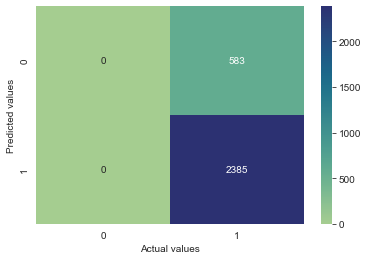

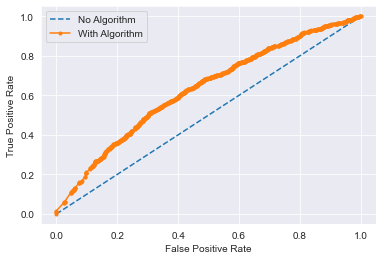

In [180]:
train = lgb.Dataset(X_train, label=y_train)
val = lgb.Dataset(X_val, label=y_val)
lgbm2 = lgb.train(best_params, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

evaluate_lgbm(lgbm2)

## XGBoost

In [181]:
def objective(trial):
    # Define the search space for XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 2.5),  
    }

    # Train and evaluate the XGBoost model
    model = xgb.XGBClassifier(**params, random_state=5)
    model.fit(X_train, y_train)
    pos_probs = model.predict_proba(X_val)[:, 1]
    score = hamming_loss(y_val, pos_probs)

    return score

In [182]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=75)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:41:03,933] A new study created in memory with name: no-name-2c61a860-a482-4ff7-a006-3c20c7beb2c0
[I 2023-07-05 16:41:04,742] Trial 0 finished with value: 0.6166941756475398 and parameters: {'max_depth': 4, 'learning_rate': 0.003254356356784512, 'subsample': 0.7527081152941175, 'colsample_bytree': 0.9407097009467185, 'lambda': 0.00010615385374293511, 'alpha': 0.005772185107222336, 'scale_pos_weight': 1.422071073337925}. Best is trial 0 with value: 0.6166941756475398.
[I 2023-07-05 16:41:05,109] Trial 1 finished with value: 0.6132381127041148 and parameters: {'max_depth': 2, 'learning_rate': 0.0010045945351528842, 'subsample': 0.5434955172021464, 'colsample_bytree': 0.5041944311611444, 'lambda': 0.03697629805015268, 'alpha': 0.1975468255408901, 'scale_pos_weight': 2.239022679241227}. Best is trial 0 with value: 0.6166941756475398.
[I 2023-07-05 16:41:05,548] Trial 2 finished with value: 0.6128842716952365 and parameters: {'max_depth': 3, 'learning_rate': 0.00794905202781

[I 2023-07-05 16:41:28,255] Trial 22 finished with value: 0.6256283015271978 and parameters: {'max_depth': 6, 'learning_rate': 0.008045981922568755, 'subsample': 0.6318698973282046, 'colsample_bytree': 0.6296501662896861, 'lambda': 1.2051288809310523e-07, 'alpha': 5.792058249259608e-06, 'scale_pos_weight': 1.1489601372708562}. Best is trial 14 with value: 0.6273352967194192.
[I 2023-07-05 16:41:29,235] Trial 23 finished with value: 0.6207557957646956 and parameters: {'max_depth': 7, 'learning_rate': 0.008276464878691518, 'subsample': 0.6397275561874975, 'colsample_bytree': 0.5694029399170818, 'lambda': 1.0489935658771904e-07, 'alpha': 1.1876275444637273e-07, 'scale_pos_weight': 1.326216342933935}. Best is trial 14 with value: 0.6273352967194192.
[I 2023-07-05 16:41:30,131] Trial 24 finished with value: 0.6243912963742084 and parameters: {'max_depth': 6, 'learning_rate': 0.007980958824136136, 'subsample': 0.6136985878133129, 'colsample_bytree': 0.622740645168122, 'lambda': 5.46214671261

[I 2023-07-05 16:41:52,432] Trial 44 finished with value: 0.6210265704391728 and parameters: {'max_depth': 6, 'learning_rate': 0.007835696292853212, 'subsample': 0.6731489281661845, 'colsample_bytree': 0.6577966757336335, 'lambda': 2.6134451150169335e-08, 'alpha': 4.7634882542343725e-06, 'scale_pos_weight': 1.3024157835814265}. Best is trial 14 with value: 0.6273352967194192.
[I 2023-07-05 16:41:53,493] Trial 45 finished with value: 0.620998881661039 and parameters: {'max_depth': 7, 'learning_rate': 0.008966044773148931, 'subsample': 0.6353251719038915, 'colsample_bytree': 0.528355873836991, 'lambda': 2.5723202480749966e-07, 'alpha': 1.0496931933049068e-07, 'scale_pos_weight': 1.1724226670093336}. Best is trial 14 with value: 0.6273352967194192.
[I 2023-07-05 16:41:54,381] Trial 46 finished with value: 0.618125361841987 and parameters: {'max_depth': 5, 'learning_rate': 0.006117696108631957, 'subsample': 0.655125044951816, 'colsample_bytree': 0.6344561057062329, 'lambda': 5.400372724375

[I 2023-07-05 16:42:24,561] Trial 66 finished with value: 0.6193932921238012 and parameters: {'max_depth': 9, 'learning_rate': 0.0081031345760025, 'subsample': 0.6918941495777425, 'colsample_bytree': 0.6517551219486659, 'lambda': 1.9044411915032658e-07, 'alpha': 9.547094951615759e-08, 'scale_pos_weight': 1.143055069929624}. Best is trial 52 with value: 0.6276441884131454.
[I 2023-07-05 16:42:26,425] Trial 67 finished with value: 0.6174331423886426 and parameters: {'max_depth': 10, 'learning_rate': 0.006710014115487663, 'subsample': 0.6763465402719526, 'colsample_bytree': 0.6282981473964055, 'lambda': 4.687921174156081e-07, 'alpha': 1.8973788763272876e-07, 'scale_pos_weight': 1.2277246495517988}. Best is trial 52 with value: 0.6276441884131454.
[I 2023-07-05 16:42:27,465] Trial 68 finished with value: 0.6190869175917235 and parameters: {'max_depth': 7, 'learning_rate': 0.004730604541793358, 'subsample': 0.662737886284712, 'colsample_bytree': 0.5526765021010928, 'lambda': 1.8393566053242

[I 2023-07-05 16:42:55,026] Trial 88 finished with value: 0.6258771409358808 and parameters: {'max_depth': 8, 'learning_rate': 0.0044803370796311125, 'subsample': 0.6127885985869358, 'colsample_bytree': 0.5754793545977726, 'lambda': 1.0191992752977592e-08, 'alpha': 4.112816329890419e-08, 'scale_pos_weight': 1.0799816438727838}. Best is trial 71 with value: 0.6297470971732274.
[I 2023-07-05 16:42:56,026] Trial 89 finished with value: 0.6212840401163647 and parameters: {'max_depth': 7, 'learning_rate': 0.005582557920802096, 'subsample': 0.5740570284577253, 'colsample_bytree': 0.5420257659525688, 'lambda': 6.926283061161393e-08, 'alpha': 1.4278491324847202e-08, 'scale_pos_weight': 1.0295728992041686}. Best is trial 71 with value: 0.6297470971732274.
[I 2023-07-05 16:42:57,187] Trial 90 finished with value: 0.6237069880003309 and parameters: {'max_depth': 7, 'learning_rate': 0.004832258012768027, 'subsample': 0.5908399478299476, 'colsample_bytree': 0.6200977155012153, 'lambda': 3.541431559

Train Accuracy score is: 0.8009267059814659
Test Accuracy score is: 0.8032345013477089
ROCAUC score is: 0.6297470971732274
              precision    recall  f1-score   support

           0       0.40      0.00      0.01       583
           1       0.80      1.00      0.89      2385

    accuracy                           0.80      2968
   macro avg       0.60      0.50      0.45      2968
weighted avg       0.72      0.80      0.72      2968



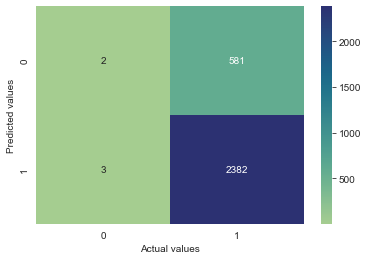

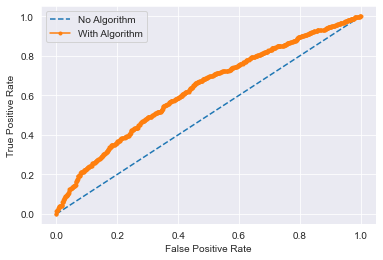

In [183]:
xgb_clf = xgb.XGBClassifier(**best_params, random_state=5)
xgb_clf.fit(X_train, y_train)

evaluate_model(xgb_clf)

#### Predicting EC2 using EC1 best model: LightGBM

# Deep Learning (Neural Network) - MLP

## EC1

In [555]:
X = train_data.drop(['id','EC1','EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data['EC1']

X_train, X_val, y_train, y_val = split_data(X,y)

scaler = StandardScaler()

# X_train['VSA_EState9'] = scaler.fit_transform(X_train[['VSA_EState9']])
# X_val['VSA_EState9'] = scaler.fit_transform(X_val[['VSA_EState9']])

X_train.head()

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1


In [556]:
import torch
import torch.nn as nn
import torch.optim as optim

In [557]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_val = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

In [558]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_sizes[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        self.output = nn.Linear(hidden_sizes[-1], num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        for hidden_layer in self.hidden_layers:
            x = torch.relu(hidden_layer(x))
        x = self.sigmoid(self.output(x))
        return x

In [559]:
def evaluate_MLP(model):
    # Evaluation on the validation set
    with torch.no_grad():
        model.eval()
        val_outputs = model(X_val)
        train_outputs = model(X_train)
        
        probs = torch.sigmoid(val_outputs)
        pos_probs = probs[:, 0]
    
        val_pred_labels = (val_outputs >= 0.5).float()
        val_score = (val_pred_labels == y_val).sum().item() / len(y_val)
        train_pred_labels = (train_outputs >= 0.5).float()
        train_score = (train_pred_labels == y_train).sum().item() / len(y_train)
        
        roc_score = roc_auc_score(y_val, pos_probs)
        print("ROC score is ",roc_score)
        print("Train score is ",train_score)
        print("Val accuracy score is ",val_score)

In [560]:
def train(model, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

In [563]:
def tune_NN(n_trials, num_hidden_layers, lb, ub):
    def objective(trial):
        # Define the hyperparameters to optimize
        input_size = 31
        hidden_sizes = []
        for i in range(num_hidden_layers):
            hidden_sizes.append(trial.suggest_int(f"hidden_size_{i}", lb, ub))
        learning_rate = trial.suggest_loguniform("learning_rate",0.0001, 0.01)
        num_classes = 1
    #     hidden_sizes.append(9)
    #     hidden_sizes.append(6)

        # Create an instance of the MLP
        model = MLP(input_size, hidden_sizes, num_classes)

        # Define the loss function and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Training loop
        num_epochs = 100
        train(model, criterion, optimizer, 100)

        # Evaluation on the validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
#             predicted_probs = val_outputs.numpy()
            pos_probs = torch.sigmoid(val_outputs)
            score = hamming_loss(y_val, pos_probs>=0.5)
        return score
    
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
    study.optimize(objective, n_trials=n_trials)
    best_params = study.best_params
    best_score = study.best_value
    print('the best parameters are: ', best_params)
    print('The best score is: ', best_score)
    return best_params

In [564]:
best_params = tune_NN(100, 3, 6, 10)

[I 2023-07-05 23:20:34,376] A new study created in memory with name: no-name-f7208605-a046-43f4-be0b-034c13033f18
[I 2023-07-05 23:20:34,745] Trial 0 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 9, 'hidden_size_1': 6, 'hidden_size_2': 9, 'learning_rate': 0.002351442855329967}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:20:35,097] Trial 1 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 7, 'hidden_size_1': 8, 'hidden_size_2': 10, 'learning_rate': 0.0006603491756395841}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:20:35,417] Trial 2 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 8, 'hidden_size_1': 9, 'hidden_size_2': 8, 'learning_rate': 0.007623356813180075}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:20:35,824] Trial 3 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 10, 'hidden_size_1': 7, 'hidden_size_2': 8, 'learni

[I 2023-07-05 23:20:47,816] Trial 34 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 9, 'hidden_size_1': 8, 'hidden_size_2': 7, 'learning_rate': 0.0009207118163632954}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:20:48,181] Trial 35 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 10, 'hidden_size_1': 7, 'hidden_size_2': 9, 'learning_rate': 0.0011206608009971914}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:20:48,626] Trial 36 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 9, 'hidden_size_1': 6, 'hidden_size_2': 9, 'learning_rate': 0.009459750218590038}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:20:48,957] Trial 37 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 8, 'hidden_size_1': 7, 'hidden_size_2': 8, 'learning_rate': 0.000982233854146883}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:20:49,294] T

[I 2023-07-05 23:21:02,270] Trial 68 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 6, 'hidden_size_1': 7, 'hidden_size_2': 7, 'learning_rate': 0.008171875720320083}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:21:02,643] Trial 69 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 9, 'hidden_size_1': 6, 'hidden_size_2': 9, 'learning_rate': 0.0022249983783917894}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:21:02,999] Trial 70 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 8, 'hidden_size_1': 8, 'hidden_size_2': 6, 'learning_rate': 0.0065674458208668865}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:21:03,443] Trial 71 finished with value: 0.3278301886792453 and parameters: {'hidden_size_0': 8, 'hidden_size_1': 7, 'hidden_size_2': 10, 'learning_rate': 0.00016536527763173444}. Best is trial 0 with value: 0.3278301886792453.
[I 2023-07-05 23:21:03,826]

the best parameters are:  {'hidden_size_0': 9, 'hidden_size_1': 6, 'hidden_size_2': 9, 'learning_rate': 0.002351442855329967}
The best score is:  0.3278301886792453


Past parameters:
- the best parameters are:  {'hidden_size_0': 11, 'hidden_size_1': 9, 'hidden_size_2': 6, 'learning_rate': 0.009705484202909563}|The best score is:  0.7008737156354401
- the best parameters are:  {'hidden_size_0': 10, 'hidden_size_1': 7, 'hidden_size_2': 6, 'learning_rate': 0.005500430897896138}|The best score is:  0.698981523696188

In [272]:
model1 = model_train(31, best_params, 1)

Scores for 0 epochs:
ROC score is  0.5617223943723646
Train score is  0.604128053917439
Val accuracy score is  0.6162398921832885

Scores for 1 epochs:
ROC score is  0.5058715648319154
Train score is  0.6543386689132267
Val accuracy score is  0.6586927223719676

Scores for 2 epochs:
ROC score is  0.47219848181605095
Train score is  0.6666385846672284
Val accuracy score is  0.6721698113207547

Scores for 3 epochs:
ROC score is  0.4623841206304559
Train score is  0.6665543386689132
Val accuracy score is  0.6721698113207547

Scores for 4 epochs:
ROC score is  0.46655539156215303
Train score is  0.6665543386689132
Val accuracy score is  0.6721698113207547

Scores for 5 epochs:
ROC score is  0.4769153098573773
Train score is  0.6665543386689132
Val accuracy score is  0.6721698113207547

Scores for 6 epochs:
ROC score is  0.4905004031146726
Train score is  0.6665543386689132
Val accuracy score is  0.6721698113207547

Scores for 7 epochs:
ROC score is  0.5065469428968103
Train score is  0.666

ROC score is  0.6864262403181643
Train score is  0.6879528222409436
Val accuracy score is  0.6900269541778976

Scores for 71 epochs:
ROC score is  0.6875915379404317
Train score is  0.6886267902274642
Val accuracy score is  0.6907008086253369

Scores for 72 epochs:
ROC score is  0.6886221205634847
Train score is  0.6898062342038753
Val accuracy score is  0.692722371967655

Scores for 73 epochs:
ROC score is  0.6899316636916031
Train score is  0.68955349620893
Val accuracy score is  0.6930592991913747

Scores for 74 epochs:
ROC score is  0.6912602678329947
Train score is  0.6896377422072452
Val accuracy score is  0.6923854447439353

Scores for 75 epochs:
ROC score is  0.6919477522171308
Train score is  0.6897219882055602
Val accuracy score is  0.6940700808625337

Scores for 76 epochs:
ROC score is  0.6925262797280972
Train score is  0.68955349620893
Val accuracy score is  0.6940700808625337

Scores for 77 epochs:
ROC score is  0.6932006274679504
Train score is  0.689469250210615
Val acc

## EC2

In [273]:
X = train_data.drop(['id','EC1','EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data['EC2']

X_train, X_val, y_train, y_val = split_data(X,y)

X_train.head()

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1


In [274]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_val = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

In [275]:
best_params = tune_NN(100, 2, 16, 32)

[I 2023-07-05 18:04:35,491] A new study created in memory with name: no-name-954174ba-e393-4b1f-bf63-afc9cea42519
[I 2023-07-05 18:04:36,132] Trial 0 finished with value: 0.5539934769553851 and parameters: {'hidden_size_0': 19, 'hidden_size_1': 30, 'learning_rate': 0.0017946956956113988}. Best is trial 0 with value: 0.5539934769553851.
[I 2023-07-05 18:04:36,840] Trial 1 finished with value: 0.5689170091804482 and parameters: {'hidden_size_0': 31, 'hidden_size_1': 21, 'learning_rate': 0.0016408094405546381}. Best is trial 1 with value: 0.5689170091804482.
[I 2023-07-05 18:04:37,506] Trial 2 finished with value: 0.5713021996396863 and parameters: {'hidden_size_0': 19, 'hidden_size_1': 27, 'learning_rate': 0.007643727134855894}. Best is trial 2 with value: 0.5713021996396863.
[I 2023-07-05 18:04:38,129] Trial 3 finished with value: 0.4841203059430187 and parameters: {'hidden_size_0': 20, 'hidden_size_1': 22, 'learning_rate': 0.0010767304467648442}. Best is trial 2 with value: 0.571302199

[I 2023-07-05 18:04:59,680] Trial 36 finished with value: 0.5424724280900857 and parameters: {'hidden_size_0': 24, 'hidden_size_1': 19, 'learning_rate': 0.0019814751941072887}. Best is trial 27 with value: 0.5801863418808951.
[I 2023-07-05 18:05:00,414] Trial 37 finished with value: 0.5710670248228098 and parameters: {'hidden_size_0': 29, 'hidden_size_1': 21, 'learning_rate': 0.0015451926457621444}. Best is trial 27 with value: 0.5801863418808951.
[I 2023-07-05 18:05:01,119] Trial 38 finished with value: 0.5686501900457044 and parameters: {'hidden_size_0': 27, 'hidden_size_1': 22, 'learning_rate': 0.005305990306798866}. Best is trial 27 with value: 0.5801863418808951.
[I 2023-07-05 18:05:01,571] Trial 39 finished with value: 0.5694459727211596 and parameters: {'hidden_size_0': 18, 'hidden_size_1': 17, 'learning_rate': 0.007106988928119919}. Best is trial 27 with value: 0.5801863418808951.
[I 2023-07-05 18:05:02,164] Trial 40 finished with value: 0.5718027552132215 and parameters: {'hid

[I 2023-07-05 18:05:23,761] Trial 73 finished with value: 0.5687109615197903 and parameters: {'hidden_size_0': 32, 'hidden_size_1': 16, 'learning_rate': 0.005509312097806325}. Best is trial 69 with value: 0.5858028487077971.
[I 2023-07-05 18:05:24,626] Trial 74 finished with value: 0.5564944568504554 and parameters: {'hidden_size_0': 31, 'hidden_size_1': 18, 'learning_rate': 0.0067539809819046155}. Best is trial 69 with value: 0.5858028487077971.
[I 2023-07-05 18:05:25,485] Trial 75 finished with value: 0.5760456109690713 and parameters: {'hidden_size_0': 30, 'hidden_size_1': 17, 'learning_rate': 0.004340426358362687}. Best is trial 69 with value: 0.5858028487077971.
[I 2023-07-05 18:05:26,163] Trial 76 finished with value: 0.5791920630297276 and parameters: {'hidden_size_0': 28, 'hidden_size_1': 16, 'learning_rate': 0.008900771811448415}. Best is trial 69 with value: 0.5858028487077971.
[I 2023-07-05 18:05:26,956] Trial 77 finished with value: 0.5806124613885383 and parameters: {'hidd

the best parameters are:  {'hidden_size_0': 31, 'hidden_size_1': 18, 'learning_rate': 0.005628122439062548}
The best score is:  0.5858028487077971


In [276]:
model2 = model_train(31, best_params, 1)

Scores for 0 epochs:
ROC score is  0.48347195702126283
Train score is  0.7955349620893007
Val accuracy score is  0.7995283018867925

Scores for 1 epochs:
ROC score is  0.4772682323412121
Train score is  0.7970513900589722
Val accuracy score is  0.8022237196765498

Scores for 2 epochs:
ROC score is  0.47913848344606624
Train score is  0.7975568660488627
Val accuracy score is  0.8032345013477089

Scores for 3 epochs:
ROC score is  0.4800036678641165
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 4 epochs:
ROC score is  0.48017303688361007
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 5 epochs:
ROC score is  0.4802676102426904
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 6 epochs:
ROC score is  0.4804179207525594
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 7 epochs:
ROC score is  0.48072968920245535
Train score is  0.7978

ROC score is  0.5196633476092357
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 75 epochs:
ROC score is  0.5197586401573585
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 76 epochs:
ROC score is  0.5201743314238865
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 77 epochs:
ROC score is  0.5210538996227854
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 78 epochs:
ROC score is  0.5219467728189693
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 79 epochs:
ROC score is  0.5227670079218674
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 80 epochs:
ROC score is  0.5234380112984598
Train score is  0.797809604043808
Val accuracy score is  0.8035714285714286

Scores for 81 epochs:
ROC score is  0.5239231043075828
Train score is  0.797809604043808
Val accur

# Multi-Label Classification

In [480]:
X = train_data.drop(['id','EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data[['EC1', 'EC2']].values

X_train, X_val, y_train, y_val = split_data(X,y)

X_train.head()

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1


In [481]:
scaler = StandardScaler()
# cols_not = [i for i in X_train.columns if i not in high_value_cols]

# train_sc=pd.DataFrame(scaler.fit_transform(X_train[high_value_cols]),index=X_train.index,columns=high_value_cols)
# val_sc=pd.DataFrame(scaler.fit_transform(X_val[high_value_cols]),index=X_val.index,columns=high_value_cols)

# scaler = MinMaxScaler()

# X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
# X_val=pd.DataFrame(scaler.fit_transform(X_val),index=X_val.index,columns=X_val.columns)

# X_train = pd.concat([train_sc, X_train[cols_not]], axis=1)
# X_val = pd.concat([val_sc, X_val[cols_not]], axis=1)

X_train['VSA_EState9'] = scaler.fit_transform(X_train[['VSA_EState9']])
X_val['VSA_EState9'] = scaler.fit_transform(X_val[['VSA_EState9']])

X_train.head()

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,-0.658890,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,-0.080696,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,-0.449153,0,0
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,-0.335781,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,-0.670227,1,1


In [482]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [499]:
def evaluate_MLP_mlb(model):
    # Evaluation on the validation set
    with torch.no_grad():
        model.eval()
        val_outputs = model(X_val)
        train_outputs = model(X_train)
        
        val_predicted_probs = val_outputs.numpy()
        train_predicted_probs = train_outputs.numpy()
        
        y_hat = (val_predicted_probs >= 0.5).astype(int)
        train_hat = (train_predicted_probs >= 0.5).astype(int)
    
        val_score = accuracy_score(y_val, y_hat)
        train_score = accuracy_score(y_train, train_hat)
        roc_score = roc_auc_score(y_val, val_predicted_probs)
        
        print("ROC score is ",roc_score)
        print("Train score is ",train_score)
        print("Val accuracy score is ",val_score)

In [505]:
def train(model, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

In [542]:
from sklearn.metrics import hamming_loss
def tune_NN_mlb(n_trials, num_hidden_layers, lb, ub):
    def objective(trial):
        # Define the hyperparameters to optimize
        input_size = 31
        hidden_sizes = []
        for i in range(num_hidden_layers):
            hidden_sizes.append(trial.suggest_int(f"hidden_size_{i}", lb, ub))
        learning_rate = trial.suggest_loguniform("learning_rate",0.0001, 0.01)
        num_classes = 2
    #     hidden_sizes.append(9)
    #     hidden_sizes.append(6)

        # Create an instance of the MLP
        model = MLP(input_size, hidden_sizes, num_classes)

        # Define the loss function and optimizer
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Training loop
        num_epochs = 100
        train(model, criterion, optimizer, 100)

        # Evaluation on the validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            predicted_probs = val_outputs.numpy()
            score = hamming_loss(y_val, val_outputs)
        return score
    
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    best_params = study.best_params
    best_score = study.best_value
    print('the best parameters are: ', best_params)
    print('The best score is: ', best_score)
    return best_params

In [543]:
best_params = tune_NN_mlb(50, 3, 1, 15)

[I 2023-07-05 23:08:05,513] A new study created in memory with name: no-name-f5f9c0dc-4f65-499b-bc2c-a5337cdaac2d
[W 2023-07-05 23:08:05,860] Trial 0 failed with parameters: {'hidden_size_0': 3, 'hidden_size_1': 3, 'hidden_size_2': 8, 'learning_rate': 0.002304101419060184} because of the following error: ValueError("Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets").
Traceback (most recent call last):
  File "C:\Users\Brian\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Brian\AppData\Local\Temp/ipykernel_27652/2011056977.py", line 30, in objective
    score = hamming_loss(y_val, val_outputs)
  File "C:\Users\Brian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 2491, in hamming_loss
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Brian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", li

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [511]:
hidden_sizes = []
learning_rate = 0
for k,v in best_params.items():
    if 'hidden' in k:
        hidden_sizes.append(v)
    else:
        learning_rate = v
        
print(hidden_sizes)
learning_rate

[6, 8, 13]


0.0056274411121108765

In [515]:
MLP_model = MLP(31, hidden_sizes, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(MLP_model.parameters(), lr=learning_rate)
train(MLP_model, criterion, optimizer, num_epochs=100)

# Submission

In [65]:
test_data = pd.read_csv('test.csv')
test_data

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,...,11.938611,0.000000,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,...,0.000000,18.199101,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,...,7.822697,0.000000,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,...,0.000000,0.000000,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0


In [66]:
test_data.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2'],
      dtype='object')

In [67]:
train_data.columns[:-6]

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2'],
      dtype='object')

In [508]:
X_test = test_data.drop('id', axis=1)

In [509]:
X_test['num_zero'] = (X_test==0).astype(int).sum(axis=1)

In [510]:
X_test

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,num_zero
0,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,0.000000,...,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1,4
1,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0,7
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,6.420822,...,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1,3
3,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0,8
4,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,47.360206,...,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,6.420822,...,0.000000,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2,3
9889,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,28.228515,...,18.199101,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0,6
9890,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,0.000000,...,0.000000,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0,6
9891,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,0.000000,...,0.000000,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0,7


In [417]:
ec1 = rfc.predict_proba(X_test)[0][:,1]
ec2 = rfc.predict_proba(X_test)[1][:,1]

In [418]:
rfc_base2 = pd.DataFrame(zip(test_data['id'], ec1, ec2) ,columns=['id', 'EC1', 'EC2'])
rfc_base2

,id,EC1,EC2
0,14838,0.448381,0.652074
1,14839,0.763267,0.677852
2,14840,0.779522,0.628290
3,14841,0.733585,0.670853
4,14842,0.754189,0.734538
...,...,...,...
9888,24726,0.635211,0.632571
9889,24727,0.766702,0.759790
9890,24728,0.388901,0.751363
9891,24729,0.386137,0.796432


In [419]:
rfc_base2.to_csv('submissions/rfc_base2.csv', index=False)

In [104]:
rfc_base = pd.DataFrame(zip(ec1, ec2) ,columns=['EC1', 'EC2'])
rfc_base['id']=test_data['id']
rfc_base = rfc_base[rfc_base.columns[::-1]]
rfc_base

,id,EC2,EC1
0,14838,0.747632,0.424838
1,14839,0.707694,0.750496
2,14840,0.658456,0.753520
3,14841,0.712387,0.696345
4,14842,0.658913,0.768397
...,...,...,...
9888,24726,0.651815,0.615984
9889,24727,0.768612,0.738692
9890,24728,0.775342,0.387256
9891,24729,0.797754,0.383882


In [105]:
rfc_base.to_csv('rfc_base.csv', index=False)

In [345]:
ec1 = rfc_ec1.predict(X_test)
ec2 = xgb_clf.predict(X_test)

In [420]:
lgbm_binary = pd.DataFrame(zip(ec1, ec2), columns=['EC1', 'EC2'])
lgbm_binary['id'] = test_data['id']
lgbm_binary = lgbm_binary[lgbm_binary.columns[-1:].to_list()+lgbm_binary.columns[:2].to_list()]
lgbm_binary

,id,EC1,EC2
0,14838,0.436758,0.768616
1,14839,0.811926,0.806311
2,14840,0.781455,0.745568
3,14841,0.712642,0.817455
4,14842,0.771032,0.795308
...,...,...,...
9888,24726,0.623808,0.745568
9889,24727,0.747591,0.821561
9890,24728,0.368690,0.840144
9891,24729,0.430987,0.845336


In [421]:
lgbm_binary.to_csv('lgbm_binary2.csv', index=False)

In [154]:
ec1 = rfc_ec1.predict_proba(X_test)[:,1]
ec2 = pd.read_csv('submissions/rfc_xgb.csv')
ec2 = ec2['EC2']
ec2
# ec2 = model2.predict(X_test)

0       0.779646
1       0.798292
2       0.724718
3       0.804617
4       0.784914
          ...   
9888    0.738371
9889    0.811444
9890    0.822606
9891    0.827851
9892    0.818291
Name: EC2, Length: 9893, dtype: float64

In [155]:
rfc_xgb = pd.DataFrame(zip(test_data['id'], ec1, ec2), columns=['id', 'EC1', 'EC2'])
rfc_xgb

,id,EC1,EC2
0,14838,0.418515,0.779646
1,14839,0.547787,0.798292
2,14840,0.507240,0.724718
3,14841,0.541734,0.804617
4,14842,0.679085,0.784914
...,...,...,...
9888,24726,0.476434,0.738371
9889,24727,0.722235,0.811444
9890,24728,0.516405,0.822606
9891,24729,0.486887,0.827851


In [156]:
rfc_xgb.to_csv('submissions/rfc_xgb(3).csv', index=False)

In [724]:
ec1 = xgb_ec1.predict_proba(X_test)[:,1]
ec2 = xgb_ec2.predict_proba(X_test)[:,1]

In [725]:
xgb = pd.DataFrame(zip(test_data['id'], ec1, ec2), columns=['id', 'EC1', 'EC2'])
xgb

,id,EC1,EC2
0,14838,0.511448,0.685810
1,14839,0.507422,0.627529
2,14840,0.546674,0.674243
3,14841,0.520827,0.629053
4,14842,0.637681,0.626815
...,...,...,...
9888,24726,0.533074,0.679332
9889,24727,0.578367,0.634510
9890,24728,0.499888,0.632268
9891,24729,0.494273,0.627498


In [726]:
xgb.to_csv('submissions/xgb.csv', index=False)

In [589]:
ec1 = rfc_ec1.predict_proba(X_test)[:,1]
ec2 = rfc_ec2.predict_proba(X_test)[:,1]

In [590]:
rfc = pd.DataFrame(zip(test_data['id'], ec1, ec2), columns=['id', 'EC1', 'EC2'])
rfc

,id,EC1,EC2
0,14838,0.463847,0.692852
1,14839,0.784642,0.700434
2,14840,0.793919,0.616729
3,14841,0.714356,0.673467
4,14842,0.796059,0.660243
...,...,...,...
9888,24726,0.646736,0.604262
9889,24727,0.751578,0.757768
9890,24728,0.422986,0.728712
9891,24729,0.462800,0.774273


In [591]:
rfc.to_csv('submissions/rfc.csv', index=False)

### Using EC1 as predictor

In [422]:
y_hatEC1 = (model1.predict(X_test)>=0.5).astype(int)

In [423]:
test = test_data.copy()

In [424]:
test['EC1'] = y_hatEC1
test

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1,0
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0,1
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0,1
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,...,0.000000,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2,1
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,...,18.199101,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0,1
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,...,0.000000,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0,0
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,...,0.000000,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0,0


In [425]:
X_test = test.drop('id', axis=1)

In [426]:
y_hatEC2 = lgbm2.predict(X_test)

In [428]:
test['EC2'] = y_hatEC2
test['EC1'] = model1.predict(X_test.drop('EC1',axis=1))
test

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1,0.436758,0.835999
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0,0.811926,0.780156
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1,0.781455,0.710728
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0,0.712642,0.780374
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0,0.771032,0.772533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,...,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2,0.623808,0.732661
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,...,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0,0.747591,0.819741
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,...,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0,0.368690,0.864607
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,...,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0,0.430987,0.879144


In [429]:
use_ec1 = test[test.columns[:1].to_list()+test.columns[-2:].to_list()]
use_ec1

,id,EC1,EC2
0,14838,0.436758,0.835999
1,14839,0.811926,0.780156
2,14840,0.781455,0.710728
3,14841,0.712642,0.780374
4,14842,0.771032,0.772533
...,...,...,...
9888,24726,0.623808,0.732661
9889,24727,0.747591,0.819741
9890,24728,0.368690,0.864607
9891,24729,0.430987,0.879144


In [430]:
use_ec1.to_csv('use_ec1(2).csv', index=False)

In [268]:
ec1 = rfc_ec1.predict_proba(X_test)[:,1]
ec2 = lgbm_ec2.predict(X_test)

In [269]:
rfc_lgbm = pd.DataFrame(zip(test_data['id'], ec1, ec2), columns=['id', 'EC1', 'EC2'])
rfc_lgbm

,id,EC1,EC2
0,14838,0.418515,0.849273
1,14839,0.547787,0.694339
2,14840,0.507240,0.760435
3,14841,0.541734,0.758008
4,14842,0.679085,0.640104
...,...,...,...
9888,24726,0.476434,0.777140
9889,24727,0.722235,0.590786
9890,24728,0.516405,0.784635
9891,24729,0.486887,0.722940


In [270]:
rfc_lgbm.to_csv('submissions/rfc_lgbm.csv', index=False)

### Deep Learning

In [523]:
X_test = torch.tensor(X_test.values, dtype=torch.float32)

In [548]:
MLP_model.eval()
with torch.no_grad():
    outputs = MLP_model(X_test)
    probs = torch.sigmoid(outputs)
    print(probs)

tensor([[0.7311, 0.7311],
        [0.7311, 0.7311],
        [0.7114, 0.7311],
        ...,
        [0.7311, 0.7311],
        [0.7311, 0.7311],
        [0.7311, 0.7311]])


In [529]:
y_hat = torch.sigmoid(MLP_model.forward(X_test)).detach().numpy()
y_hat

array([[0.7310585 , 0.7310586 ],
       [0.7310586 , 0.7310586 ],
       [0.7114314 , 0.73105854],
       ...,
       [0.7310584 , 0.7310586 ],
       [0.7310586 , 0.7310586 ],
       [0.7310586 , 0.7310586 ]], dtype=float32)

In [537]:
y_hat[:,0]

array([0.7310585, 0.7310586, 0.7114314, ..., 0.7310584, 0.7310586,
       0.7310586], dtype=float32)

In [538]:
deep_df = pd.DataFrame(zip(test_data['id'], y_hat[:,0], y_hat[:,1]), columns=['id','ec1','ec2'])
deep_df

,id,ec1,ec2
0,14838,0.731058,0.731059
1,14839,0.731059,0.731059
2,14840,0.711431,0.731059
3,14841,0.720842,0.731059
4,14842,0.731059,0.731059
...,...,...,...
9888,24726,0.731041,0.731059
9889,24727,0.731059,0.731059
9890,24728,0.731058,0.731059
9891,24729,0.731059,0.731059


In [539]:
deep_df.to_csv('submissions/deep_df.csv', index=False)